# Esercizio 11

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

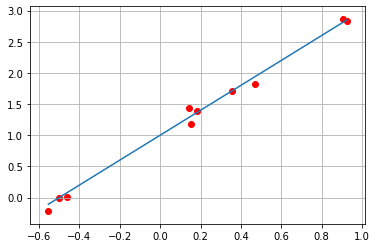

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 31ms/step - loss: 0.9935 - mse: 0.9935 - val_loss: 0.9360 - val_mse: 0.9360
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.8517 - mse: 0.8517 - val_loss: 0.8046 - val_mse: 0.8046
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.7299 - mse: 0.7299 - val_loss: 0.6990 - val_mse: 0.6990
Epoch 4/30
4/4 [==============================] - 0s 7ms/step - loss: 0.6320 - mse: 0.6320 - val_loss: 0.6010 - val_mse: 0.6010
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.5435 - mse: 0.5435 - val_loss: 0.5229 - val_mse: 0.5229
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4715 - mse: 0.4715 - val_loss: 0.4485 - val_mse: 0.4485
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4048 - mse: 0.4048 - val_loss: 0.3864 - val_mse: 0.3864
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 0.3496 - mse: 0.3496 - val_loss: 

In [7]:
# return weights
model.get_weights()

[array([[1.8426535]], dtype=float32), array([0.90793914], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 907us/step - loss: 0.0263 - mse: 0.0263

Test loss: 0.026286324486136436
Test accuracy: 0.026286324486136436


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.0203 - mse: 0.0203

Test loss: 0.020277710631489754
Test accuracy: 0.020277710631489754


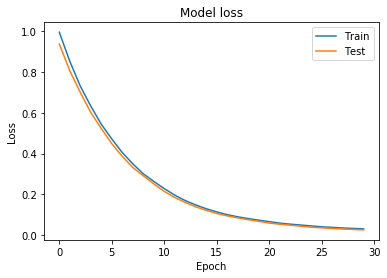

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

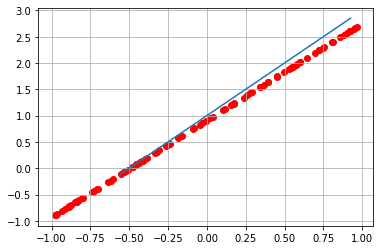

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

<span style="color:blue">

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.
</span>

Il primo parametro che viene fatto variare è il numero di dati totali. Il rapporto tra dataset di train e di validation è mantenuto pari a 10:1

In [12]:
np.random.seed(0)
loss = np.zeros(20)
size = np.zeros(20)

for i in range(20):
    x_train = np.random.uniform(-1, 1, i*50 + 50)
    x_valid = np.random.uniform(-1, 1, i*10 + 10)
    x_valid.sort()

    sigma = 0.2
    y_train = np.random.normal(m * x_train + b, sigma) 
    y_valid = np.random.normal(m * x_valid + b, sigma)


    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))


    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])



    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))



    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    
    loss[i] = score[0]
    size[i] = i*50 + 50

Epoch 1/30
2/2 [==============================] - 0s 45ms/step - loss: 3.0348 - mse: 3.0348 - val_loss: 2.1696 - val_mse: 2.1696
Epoch 2/30
2/2 [==============================] - 0s 11ms/step - loss: 2.8756 - mse: 2.8756 - val_loss: 2.0818 - val_mse: 2.0818
Epoch 3/30
2/2 [==============================] - 0s 13ms/step - loss: 2.7290 - mse: 2.7290 - val_loss: 2.0011 - val_mse: 2.0011
Epoch 4/30
2/2 [==============================] - 0s 10ms/step - loss: 2.5930 - mse: 2.5930 - val_loss: 1.9258 - val_mse: 1.9258
Epoch 5/30
2/2 [==============================] - 0s 13ms/step - loss: 2.4654 - mse: 2.4654 - val_loss: 1.8557 - val_mse: 1.8557
Epoch 6/30
2/2 [==============================] - 0s 12ms/step - loss: 2.3462 - mse: 2.3462 - val_loss: 1.7900 - val_mse: 1.7900
Epoch 7/30
2/2 [==============================] - 0s 10ms/step - loss: 2.2343 - mse: 2.2343 - val_loss: 1.7281 - val_mse: 1.7281
Epoch 8/30
2/2 [==============================] - 0s 10ms/step - loss: 2.1302 - mse: 2.1302 - val

5/5 [==============================] - 0s 5ms/step - loss: 2.7113 - mse: 2.7113 - val_loss: 4.0983 - val_mse: 4.0983
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 2.4818 - mse: 2.4818 - val_loss: 3.7638 - val_mse: 3.7638
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 2.2747 - mse: 2.2747 - val_loss: 3.4599 - val_mse: 3.4599
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 2.0886 - mse: 2.0886 - val_loss: 3.1848 - val_mse: 3.1848
Epoch 7/30
5/5 [==============================] - 0s 6ms/step - loss: 1.9200 - mse: 1.9200 - val_loss: 2.9342 - val_mse: 2.9342
Epoch 8/30
5/5 [==============================] - 0s 6ms/step - loss: 1.7680 - mse: 1.7680 - val_loss: 2.7125 - val_mse: 2.7125
Epoch 9/30
5/5 [==============================] - 0s 5ms/step - loss: 1.6347 - mse: 1.6347 - val_loss: 2.5139 - val_mse: 2.5139
Epoch 10/30
5/5 [==============================] - 0s 4ms/step - loss: 1.5141 - mse: 1.5141 - val_loss: 2.3283 - va

8/8 [==============================] - 0s 3ms/step - loss: 0.8196 - mse: 0.8196 - val_loss: 0.6120 - val_mse: 0.6120
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6798 - mse: 0.6798 - val_loss: 0.5099 - val_mse: 0.5099
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.4300 - val_mse: 0.4300
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4844 - mse: 0.4844 - val_loss: 0.3675 - val_mse: 0.3675
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4159 - mse: 0.4159 - val_loss: 0.3172 - val_mse: 0.3172
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3604 - mse: 0.3604 - val_loss: 0.2761 - val_mse: 0.2761
Epoch 11/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3145 - mse: 0.3145 - val_loss: 0.2433 - val_mse: 0.2433
Epoch 12/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2774 - mse: 0.2774 - val_loss: 0.2156 - 

Epoch 7/30
11/11 [==============================] - 0s 3ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 8/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 10/30
11/11 [==============================] - 0s 3ms/step - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 11/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0550 - mse: 0.0550 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 12/30
11/11 [==============================] - 0s 2ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 13/30
11/11 [==============================] - 0s 3ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 14/30
11/11 [==============================] - 0s 3ms/step - loss: 0.0447 - mse:

15/15 [==============================] - 0s 2ms/step - loss: 0.2429 - mse: 0.2429 - val_loss: 0.2088 - val_mse: 0.2088
Epoch 9/30
15/15 [==============================] - 0s 2ms/step - loss: 0.2045 - mse: 0.2045 - val_loss: 0.1793 - val_mse: 0.1793
Epoch 10/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1752 - mse: 0.1752 - val_loss: 0.1539 - val_mse: 0.1539
Epoch 11/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 12/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1310 - mse: 0.1310 - val_loss: 0.1169 - val_mse: 0.1169
Epoch 13/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 14/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1018 - mse: 0.1018 - val_loss: 0.0922 - val_mse: 0.0922
Epoch 15/30
15/15 [==============================] - 0s 2ms/step - loss: 0.0910 - mse: 0.0910 - 

18/18 [==============================] - 0s 2ms/step - loss: 0.1563 - mse: 0.1563 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 10/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1304 - mse: 0.1304 - val_loss: 0.0973 - val_mse: 0.0973
Epoch 11/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102 - val_loss: 0.0832 - val_mse: 0.0832
Epoch 12/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 13/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 14/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0730 - mse: 0.0730 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 15/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0658 - mse: 0.0658 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 16/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0602 - mse: 0.0602 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0889 - mse: 0.0889 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 11/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0780 - val_mse: 0.0780
Epoch 12/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 13/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 14/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 15/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 16/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 17/30
21/21 [==============================] - 0s 2ms/step - loss: 0.0481 - mse: 0.0481 -

24/24 [==============================] - 0s 2ms/step - loss: 0.0841 - mse: 0.0841 - val_loss: 0.0758 - val_mse: 0.0758
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0722 - mse: 0.0722 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0450 - mse: 0.0450 -

27/27 [==============================] - 0s 2ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 13/30
27/27 [==============================] - 0s 1ms/step - loss: 0.0551 - mse: 0.0551 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 14/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 15/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 16/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 17/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0415 - mse: 0.0415 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 18/30
27/27 [==============================] - 0s 1ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 19/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395 -

30/30 [==============================] - 0s 1ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 14/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 15/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0511 - val_mse: 0.0511
Epoch 16/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 17/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 18/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 19/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 20/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0419 - mse: 0.0419 -

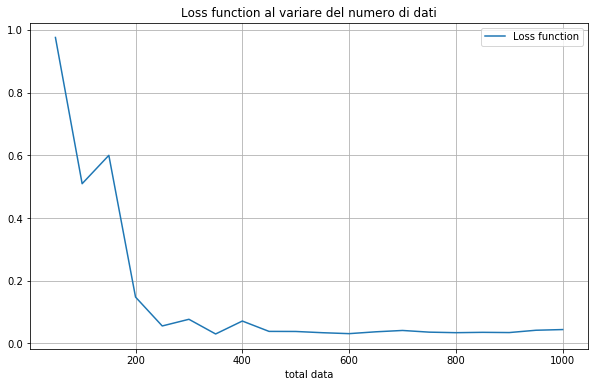

Loss Function con  500.0  dati:  0.03832982853055


In [13]:
plt.figure(figsize=(10,6))

plt.plot(size,loss, label='Loss function')
plt.title('Loss function al variare del numero di dati')
plt.xlabel('total data')
plt.legend()
plt.grid(True)

plt.show()
print('Loss Function con ',size[9],' dati: ',loss[9])

Dal grafico si nota come dopo circa 500 punti la loss function raggiunga un valore costante minimo di circa 0.03. Viene quindi fissato a 500 il numero di dati totali

Il secondo parametro che viene fatto variare è la dispersione dei dati $\sigma$

In [14]:
np.random.seed(0)
sigma = np.linspace(0.02,0.5,25)
loss = np.zeros(25)
index = 0

for i in sigma:
    x_train = np.random.uniform(-1, 1, 500)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()

    y_train = np.random.normal(m * x_train + b, i) 
    y_valid = np.random.normal(m * x_valid + b, i)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    
    loss[index] = score[0]
    index += 1

Epoch 1/30
16/16 [==============================] - 0s 6ms/step - loss: 2.8656 - mse: 2.8656 - val_loss: 2.1424 - val_mse: 2.1424
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.1085 - mse: 2.1085 - val_loss: 1.6030 - val_mse: 1.6030
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5878 - mse: 1.5878 - val_loss: 1.2319 - val_mse: 1.2319
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.2232 - mse: 1.2232 - val_loss: 0.9607 - val_mse: 0.9607
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9541 - mse: 0.9541 - val_loss: 0.7596 - val_mse: 0.7596
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7531 - mse: 0.7531 - val_loss: 0.6042 - val_mse: 0.6042
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5979 - mse: 0.5979 - val_loss: 0.4819 - val_mse: 0.4819
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4761 - mse: 0.47

16/16 [==============================] - 0s 2ms/step - loss: 1.9299 - mse: 1.9299 - val_loss: 1.4899 - val_mse: 1.4899
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.4433 - mse: 1.4433 - val_loss: 1.1083 - val_mse: 1.1083
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0998 - mse: 1.0998 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8572 - mse: 0.8572 - val_loss: 0.6613 - val_mse: 0.6613
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6764 - mse: 0.6764 - val_loss: 0.5213 - val_mse: 0.5213
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5388 - mse: 0.5388 - val_loss: 0.4139 - val_mse: 0.4139
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4310 - mse: 0.4310 - val_loss: 0.3310 - val_mse: 0.3310
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3461 - mse: 0.3461 - val_lo

16/16 [==============================] - 0s 2ms/step - loss: 2.6458 - mse: 2.6458 - val_loss: 2.5961 - val_mse: 2.5961
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 2.0979 - mse: 2.0979 - val_loss: 2.0669 - val_mse: 2.0669
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.6755 - mse: 1.6755 - val_loss: 1.6632 - val_mse: 1.6632
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 1.3486 - mse: 1.3486 - val_loss: 1.3410 - val_mse: 1.3410
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0863 - mse: 1.0863 - val_loss: 1.0885 - val_mse: 1.0885
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8794 - mse: 0.8794 - val_loss: 0.8865 - val_mse: 0.8865
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7131 - mse: 0.7131 - val_loss: 0.7236 - val_mse: 0.7236
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_l

16/16 [==============================] - 0s 2ms/step - loss: 0.2192 - mse: 0.2192 - val_loss: 0.1756 - val_mse: 0.1756
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0425 - mse: 0.0425 - val_

16/16 [==============================] - 0s 2ms/step - loss: 0.1474 - mse: 0.1474 - val_loss: 0.1220 - val_mse: 0.1220
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0723 - mse: 0.0723 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0463 - mse: 0.0463 - val

16/16 [==============================] - 0s 2ms/step - loss: 1.3852 - mse: 1.3852 - val_loss: 1.3179 - val_mse: 1.3179
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.1219 - mse: 1.1219 - val_loss: 1.0840 - val_mse: 1.0840
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9129 - mse: 0.9129 - val_loss: 0.8943 - val_mse: 0.8943
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7469 - mse: 0.7469 - val_loss: 0.7394 - val_mse: 0.7394
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 0.6126 - val_mse: 0.6126
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5046 - mse: 0.5046 - val_loss: 0.5081 - val_mse: 0.5081
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4171 - mse: 0.4171 - val_loss: 0.4238 - val_mse: 0.4238
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3469 - mse: 0.3469 - va

16/16 [==============================] - 0s 2ms/step - loss: 0.4802 - mse: 0.4802 - val_loss: 0.4658 - val_mse: 0.4658
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3944 - mse: 0.3944 - val_loss: 0.3840 - val_mse: 0.3840
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3269 - mse: 0.3269 - val_loss: 0.3197 - val_mse: 0.3197
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2738 - mse: 0.2738 - val_loss: 0.2690 - val_mse: 0.2690
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2317 - mse: 0.2317 - val_loss: 0.2285 - val_mse: 0.2285
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1983 - mse: 0.1983 - val_loss: 0.1961 - val_mse: 0.1961
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1719 - mse: 0.1719 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - v

16/16 [==============================] - 0s 2ms/step - loss: 0.1910 - mse: 0.1910 - val_loss: 0.2501 - val_mse: 0.2501
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1656 - mse: 0.1656 - val_loss: 0.2202 - val_mse: 0.2202
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1468 - mse: 0.1468 - val_loss: 0.1963 - val_mse: 0.1963
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1322 - mse: 0.1322 - val_loss: 0.1772 - val_mse: 0.1772
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207 - val_loss: 0.1617 - val_mse: 0.1617
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117 - val_loss: 0.1492 - val_mse: 0.1492
Epoch 14/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988 - 

16/16 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156 - val_loss: 0.1334 - val_mse: 0.1334
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133 - val_loss: 0.1344 - val_mse: 0.1344
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 0.1349 - val_mse: 0.1349
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100 - val_loss: 0.1358 - val_mse: 0.1358
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 0.1358 - val_mse: 0.1358
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1090 - mse: 0.1090 -

16/16 [==============================] - 0s 2ms/step - loss: 0.4210 - mse: 0.4210 - val_loss: 0.4076 - val_mse: 0.4076
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3656 - mse: 0.3656 - val_loss: 0.3580 - val_mse: 0.3580
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3220 - mse: 0.3220 - val_loss: 0.3183 - val_mse: 0.3183
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2862 - mse: 0.2862 - val_loss: 0.2864 - val_mse: 0.2864
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2574 - mse: 0.2574 - val_loss: 0.2602 - val_mse: 0.2602
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2340 - mse: 0.2340 - val_loss: 0.2396 - val_mse: 0.2396
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2149 - mse: 0.2149 - val_loss: 0.2231 - val_mse: 0.2231
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1996 - mse: 0.1996 -

16/16 [==============================] - 0s 2ms/step - loss: 0.2586 - mse: 0.2586 - val_loss: 0.2891 - val_mse: 0.2891
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2421 - mse: 0.2421 - val_loss: 0.2727 - val_mse: 0.2727
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2287 - mse: 0.2287 - val_loss: 0.2595 - val_mse: 0.2595
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2178 - mse: 0.2178 - val_loss: 0.2488 - val_mse: 0.2488
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2092 - mse: 0.2092 - val_loss: 0.2400 - val_mse: 0.2400
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2021 - mse: 0.2021 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1964 - mse: 0.1964 - val_loss: 0.2272 - val_mse: 0.2272
Epoch 18/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1918 - mse: 0.1918 -

16/16 [==============================] - 0s 2ms/step - loss: 0.2537 - mse: 0.2537 - val_loss: 0.2906 - val_mse: 0.2906
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2479 - mse: 0.2479 - val_loss: 0.2836 - val_mse: 0.2836
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2434 - mse: 0.2434 - val_loss: 0.2781 - val_mse: 0.2781
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2400 - mse: 0.2400 - val_loss: 0.2737 - val_mse: 0.2737
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2371 - mse: 0.2371 - val_loss: 0.2699 - val_mse: 0.2699
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2348 - mse: 0.2348 - val_loss: 0.2669 - val_mse: 0.2669
Epoch 18/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2329 - mse: 0.2329 - val_loss: 0.2644 - val_mse: 0.2644
Epoch 19/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2314 - mse: 0.2314 -

16/16 [==============================] - 0s 2ms/step - loss: 0.2902 - mse: 0.2902 - val_loss: 0.2424 - val_mse: 0.2424
Epoch 14/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2774 - mse: 0.2774 - val_loss: 0.2347 - val_mse: 0.2347
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.2293 - val_mse: 0.2293
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2590 - mse: 0.2590 - val_loss: 0.2246 - val_mse: 0.2246
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2522 - mse: 0.2522 - val_loss: 0.2204 - val_mse: 0.2204
Epoch 18/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.2164 - val_mse: 0.2164
Epoch 19/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2426 - mse: 0.2426 - val_loss: 0.2141 - val_mse: 0.2141
Epoch 20/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2392 - mse: 0.2392 -

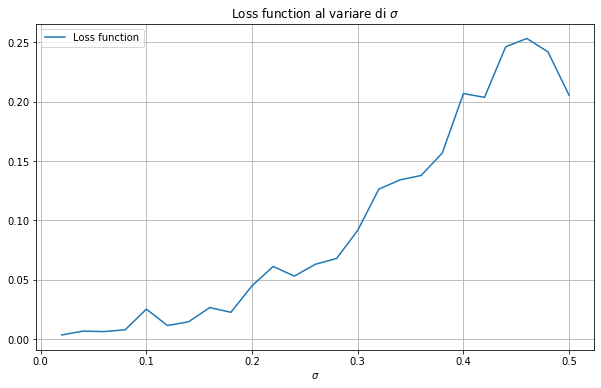

In [15]:
plt.figure(figsize=(10,6))

plt.plot(sigma,loss, label='Loss function')
plt.title('Loss function al variare di $\sigma$')
plt.xlabel('$\sigma$')
plt.legend()
plt.grid(True)

plt.show()

Come ci si poteva aspettare, diminuendo il valore di $\sigma$ migliora la disposizione dei dati attorno alla retta $y=2x +1$ e di conseguenza diminuisce la loss function

Gli ultimi 2 parametri che sono stati fatti variare sono il numero di epoche ed il batch-size

In [16]:
import seaborn as sns

In [17]:
np.random.seed(0)

batch_vals=np.linspace(10,100,10, dtype=int)
epoch_vals=np.linspace(10,100,10, dtype=int)

epoch_batch = np.zeros((len(batch_vals), len(epoch_vals)))

for i, batch in enumerate(batch_vals):
    for j, epoch in enumerate(epoch_vals):

        x_train = np.random.uniform(-1, 1, 500)
        x_valid = np.random.uniform(-1, 1, 50)
        x_valid.sort()

        sigma = 0.1
        y_train = np.random.normal(m * x_train + b, sigma) 
        y_valid = np.random.normal(m * x_valid + b, sigma)


        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))


        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


        history = model.fit(x=x_train, y=y_train, batch_size=i, epochs=j, shuffle=True, validation_data=(x_valid, y_valid))


        score = model.evaluate(x_valid, y_valid, batch_size=i)
        
        sns.set()
        epoch_batch[i][j] = score[0]
        print(epoch_batch[i][j])

2/2 [==============================] - 0s 1ms/step - loss: 2.9877 - mse: 2.9877
2.987741708755493
2/2 [==============================] - 0s 2ms/step - loss: 1.4038 - mse: 1.4038
1.4037688970565796
Epoch 1/2
16/16 [==============================] - 0s 6ms/step - loss: 3.7484 - mse: 3.7484 - val_loss: 2.8733 - val_mse: 2.8733
Epoch 2/2
2/2 [==============================] - 0s 911us/step - loss: 2.1363 - mse: 2.1363
2.13625168800354
Epoch 1/3
16/16 [==============================] - 0s 7ms/step - loss: 0.9854 - mse: 0.9854 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 2/3
16/16 [==============================] - 0s 2ms/step - loss: 0.6067 - mse: 0.6067 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 3/3
2/2 [==============================] - 0s 2ms/step - loss: 0.3293 - mse: 0.3293
0.3293488025665283
Epoch 1/4
16/16 [==============================] - 0s 6ms/step - loss: 2.5442 - mse: 2.5442 - val_loss: 2.4368 - val_mse: 2.4368
Epoch 2/4
16/16 [==============================] - 0s 2ms/step - loss

500/500 [==============================] - 0s 668us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 3/4
500/500 [==============================] - 0s 627us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4/4
50/50 [==============================] - 0s 708us/step - loss: 0.0096 - mse: 0.0096
0.009646361693739891
Epoch 1/5
500/500 [==============================] - 0s 881us/step - loss: 0.0711 - mse: 0.0711 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2/5
500/500 [==============================] - 0s 631us/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3/5
500/500 [==============================] - 0s 633us/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 4/5
500/500 [==============================] - 0s 689us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 5/5
50/50 [==============================] - 0s 580us/step - loss: 0.0110 - mse: 0.0110
0.0

25/25 [==============================] - 0s 543us/step - loss: 0.0105 - mse: 0.0105
0.010500486008822918
Epoch 1/6
250/250 [==============================] - 0s 914us/step - loss: 0.2117 - mse: 0.2117 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 2/6
250/250 [==============================] - 0s 705us/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 3/6
250/250 [==============================] - 0s 740us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 4/6
250/250 [==============================] - 0s 679us/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 5/6
250/250 [==============================] - 0s 720us/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 6/6
25/25 [==============================] - 0s 599us/step - loss: 0.0110 - mse: 0.0110  
0.01102848257869482
Epoch 1/7
250/250 [==============================] - 0s 926us/step - loss: 1.2234 - mse: 1.2234 - val_loss: 0.1787

167/167 [==============================] - 0s 798us/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3/7
167/167 [==============================] - 0s 795us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 4/7
167/167 [==============================] - 0s 839us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 5/7
167/167 [==============================] - 0s 779us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 6/7
167/167 [==============================] - 0s 796us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 7/7
17/17 [==============================] - 0s 595us/step - loss: 0.0092 - mse: 0.0092
0.009249079041182995
Epoch 1/8
167/167 [==============================] - 0s 1ms/step - loss: 0.2949 - mse: 0.2949 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 2/8
167/167 [==============================] - 0s 1ms/step - loss: 0.0268 - mse: 0.0268 - val

125/125 [==============================] - 0s 766us/step - loss: 0.0511 - mse: 0.0511 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 4/8
125/125 [==============================] - 0s 776us/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 5/8
125/125 [==============================] - 0s 782us/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 6/8
125/125 [==============================] - 0s 755us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 7/8
125/125 [==============================] - 0s 717us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 8/8
13/13 [==============================] - 0s 704us/step - loss: 0.0101 - mse: 0.0101
0.01008519995957613
Epoch 1/9
125/125 [==============================] - 0s 1ms/step - loss: 1.0837 - mse: 1.0837 - val_loss: 0.3931 - val_mse: 0.3931
Epoch 2/9
125/125 [==============================] - 0s 762us/step - loss: 0.1821 - mse: 0.1821 - va

100/100 [==============================] - 0s 904us/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 4/9
100/100 [==============================] - 0s 866us/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 5/9
100/100 [==============================] - 0s 856us/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 6/9
100/100 [==============================] - 0s 809us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 7/9
100/100 [==============================] - 0s 867us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 8/9
100/100 [==============================] - 0s 873us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 9/9
10/10 [==============================] - 0s 885us/step - loss: 0.0072 - mse: 0.0072
0.007238925900310278
9/9 [==============================] - 0s 2ms/step - loss: 5.0050 - mse: 5.0050
5.005006790161133

72/72 [==============================] - 0s 2ms/step - loss: 0.7465 - mse: 0.7465 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 2/2
8/8 [==============================] - 0s 640us/step - loss: 0.0964 - mse: 0.0964
0.09642848372459412
Epoch 1/3
72/72 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.1559 - val_mse: 0.1559
Epoch 2/3
72/72 [==============================] - 0s 892us/step - loss: 0.1216 - mse: 0.1216 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 3/3
8/8 [==============================] - 0s 823us/step - loss: 0.0263 - mse: 0.0263
0.026337720453739166
Epoch 1/4
72/72 [==============================] - 0s 2ms/step - loss: 1.0332 - mse: 1.0332 - val_loss: 0.4548 - val_mse: 0.4548
Epoch 2/4
72/72 [==============================] - 0s 1ms/step - loss: 0.2879 - mse: 0.2879 - val_loss: 0.1743 - val_mse: 0.1743
Epoch 3/4
72/72 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 4/4

7/7 [==============================] - 0s 757us/step - loss: 0.0851 - mse: 0.0851
0.08513927459716797
Epoch 1/5
63/63 [==============================] - 0s 2ms/step - loss: 2.7037 - mse: 2.7037 - val_loss: 1.5275 - val_mse: 1.5275
Epoch 2/5
63/63 [==============================] - 0s 982us/step - loss: 1.0246 - mse: 1.0246 - val_loss: 0.6138 - val_mse: 0.6138
Epoch 3/5
63/63 [==============================] - 0s 908us/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.2569 - val_mse: 0.2569
Epoch 4/5
63/63 [==============================] - 0s 959us/step - loss: 0.1867 - mse: 0.1867 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 5/5
7/7 [==============================] - 0s 728us/step - loss: 0.0508 - mse: 0.0508
0.05080891028046608
Epoch 1/6
63/63 [==============================] - 0s 2ms/step - loss: 2.7613 - mse: 2.7613 - val_loss: 2.1466 - val_mse: 2.1466
Epoch 2/6
63/63 [==============================] - 0s 1ms/step - loss: 1.0933 - mse: 1.0933 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 

Epoch 5/6
56/56 [==============================] - 0s 992us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 6/6
6/6 [==============================] - 0s 1ms/step - loss: 0.0114 - mse: 0.0114
0.011358772404491901
Epoch 1/7
56/56 [==============================] - 0s 2ms/step - loss: 0.8155 - mse: 0.8155 - val_loss: 0.4235 - val_mse: 0.4235
Epoch 2/7
56/56 [==============================] - 0s 1ms/step - loss: 0.2397 - mse: 0.2397 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 3/7
56/56 [==============================] - 0s 984us/step - loss: 0.1070 - mse: 0.1070 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 4/7
56/56 [==============================] - 0s 1ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 5/7
56/56 [==============================] - 0s 1ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 6/7
56/56 [==============================] - 0s 1ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0154 

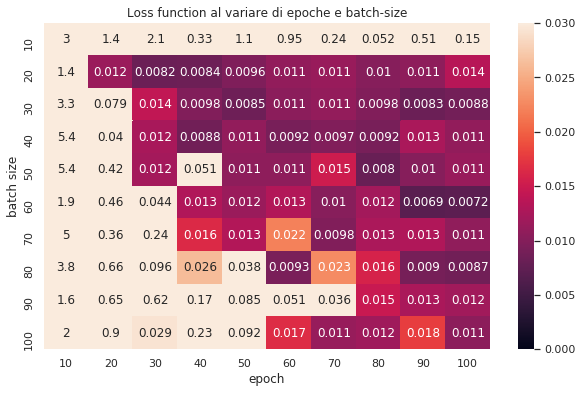

In [18]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(epoch_batch, annot=True,xticklabels=epoch_vals, yticklabels=batch_vals,vmin=0, vmax=0.03)
ax.set_title("Loss function al variare di epoche e batch-size")
ax.set_xlabel("epoch")
ax.set_ylabel("batch size")
plt.show()

Dalla heatmap si evince come la rete neurale performi meglio con un numero elevato di epoche e con batch-size ristretti.

I parametri scelti al fine di ottimizzare la rete neurale sono:
- $N_{train}$: 500
- $\sigma$: 0.1
- $N_{epoch}$: 90
- batch-size: 30

Di seguit sono riportati i risultati ottenuti con la rete FFNN ottimizzata:

In [19]:
np.random.seed(0)

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

sigma = 0.1
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)
y_target = m * x_valid + b

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
    

Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 4.2424 - mse: 4.2424 - val_loss: 3.2578 - val_mse: 3.2578
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 3.1748 - mse: 3.1748 - val_loss: 2.4738 - val_mse: 2.4738
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4190 - mse: 2.4190 - val_loss: 1.9140 - val_mse: 1.9140
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8747 - mse: 1.8747 - val_loss: 1.4922 - val_mse: 1.4922
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4621 - mse: 1.4621 - val_loss: 1.1713 - val_mse: 1.1713
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1467 - mse: 1.1467 - val_loss: 0.9239 - val_mse: 0.9239
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.9044 - mse: 0.9044 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7159 - mse: 0.71

17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 -

In [20]:
model.get_weights()

[array([[2.0106528]], dtype=float32), array([0.98918164], dtype=float32)]

In [21]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 970us/step - loss: 0.0112 - mse: 0.0112

Test loss: 0.011163031682372093
Test accuracy: 0.011163031682372093


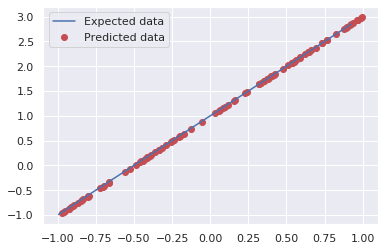

In [22]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label='Predicted data')
plt.plot(x_valid, y_target, label='Expected data')
plt.grid(True)
plt.legend()
plt.show()

### Exercise 11.2

<span style="color:blue">
Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
</span>

In [23]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = 4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid

sigma = 0.1 
y_train = np.random.normal(4 -3* x_train -2*x_train*x_train + 3*x_train*x_train*x_train, sigma) 
y_valid = np.random.normal(4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid, sigma)

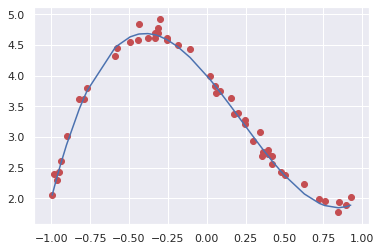

In [24]:
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

I primi due parametri che vengono fatti variare sono il numero di layers $N_{HL}$ ed il numero di perceptrons per layer $N_{p}$:

In [25]:
layers=np.linspace(1,12,12, dtype=int)
neurons=np.linspace(1,17,17, dtype=int)

layers_neurons = np.zeros((12, 17))

for i in layers:
    for j in neurons:

        model = tf.keras.Sequential()
        for k in range(i):
            model.add(Dense(j))


        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


        history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))


        score = model.evaluate(x_valid, y_valid, batch_size=30)
        
        sns.set()
        layers_neurons[i-1][j-1] = score[0]

Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 9.1658 - mse: 9.1658 - val_loss: 6.4854 - val_mse: 6.4854
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 4.9815 - mse: 4.9815 - val_loss: 3.6405 - val_mse: 3.6405
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 2.8571 - mse: 2.8571 - val_loss: 2.2158 - val_mse: 2.2158
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7767 - mse: 1.7767 - val_loss: 1.4920 - val_mse: 1.4920
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2204 - mse: 1.2204 - val_loss: 1.1305 - val_mse: 1.1305
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.9309 - mse: 0.9309 - val_loss: 0.9455 - val_mse: 0.9455
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7767 - mse: 0.7767 - val_loss: 0.8569 - val_mse: 0.8569
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6963 - mse: 0.69

17/17 [==============================] - 0s 2ms/step - loss: 0.5697 - mse: 0.5697 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5701 - mse: 0.5701 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5701 - mse: 0.5701 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5701 - mse: 0.5701 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 -

17/17 [==============================] - 0s 2ms/step - loss: 3.5783 - mse: 3.5783 - val_loss: 3.2666 - val_mse: 3.2666
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 3.0176 - mse: 3.0176 - val_loss: 2.7764 - val_mse: 2.7764
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5682 - mse: 2.5682 - val_loss: 2.3853 - val_mse: 2.3853
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2083 - mse: 2.2083 - val_loss: 2.0725 - val_mse: 2.0725
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9179 - mse: 1.9179 - val_loss: 1.8220 - val_mse: 1.8220
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6839 - mse: 1.6839 - val_loss: 1.6207 - val_mse: 1.6207
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4946 - mse: 1.4946 - val_loss: 1.4593 - val_mse: 1.4593
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3407 - mse: 1.3407 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8086 - val_mse: 0.8086
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8092 - val_mse: 0.8092
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8098 - val_mse: 0.8098
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6605 - mse: 0.6605 - val_loss: 0.7922 - val_mse: 0.7922
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6542 - mse: 0.6542 - val_loss: 0.7899 - val_mse: 0.7899
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6486 - mse: 0.6486 - val_loss: 0.7881 - val_mse: 0.7881
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6434 - mse: 0.6434 - val_loss: 0.7866 - val_mse: 0.7866
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6387 - mse: 0.6387 - val_loss: 0.7853 - val_mse: 0.7853
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6342 - mse: 0.6342 - val_loss: 0.7842 - val_mse: 0.7842
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6299 - mse: 0.6299 - val_loss: 0.7835 - val_mse: 0.7835
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6262 - mse: 0.6262 -

17/17 [==============================] - 0s 2ms/step - loss: 2.9927 - mse: 2.9927 - val_loss: 2.8363 - val_mse: 2.8363
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7133 - mse: 2.7133 - val_loss: 2.5783 - val_mse: 2.5783
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4675 - mse: 2.4675 - val_loss: 2.3538 - val_mse: 2.3538
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2529 - mse: 2.2529 - val_loss: 2.1563 - val_mse: 2.1563
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0635 - mse: 2.0635 - val_loss: 1.9846 - val_mse: 1.9846
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8981 - mse: 1.8981 - val_loss: 1.8329 - val_mse: 1.8329
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7514 - mse: 1.7514 - val_loss: 1.7007 - val_mse: 1.7007
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6230 - mse: 1.6230 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.7845 - val_mse: 0.7845
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.7851 - val_mse: 0.7851
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.7856 - val_mse: 0.7856
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5876 - mse: 0.5876 - val_loss: 0.7861 - val_mse: 0.7861
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.7867 - val_mse: 0.7867
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.7872 - val_mse: 0.7872
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.7878 - val_mse: 0.7878
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6908 - mse: 0.6908 - val_loss: 0.8325 - val_mse: 0.8325
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6823 - mse: 0.6823 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6746 - mse: 0.6746 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6677 - mse: 0.6677 - val_loss: 0.8173 - val_mse: 0.8173
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6610 - mse: 0.6610 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.8097 - val_mse: 0.8097
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6495 - mse: 0.6495 - val_loss: 0.8066 - val_mse: 0.8066
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6444 - mse: 0.6444 -

17/17 [==============================] - 0s 2ms/step - loss: 2.6744 - mse: 2.6744 - val_loss: 2.6090 - val_mse: 2.6090
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4947 - mse: 2.4947 - val_loss: 2.4403 - val_mse: 2.4403
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3306 - mse: 2.3306 - val_loss: 2.2872 - val_mse: 2.2872
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1816 - mse: 2.1816 - val_loss: 2.1475 - val_mse: 2.1475
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0451 - mse: 2.0451 - val_loss: 2.0213 - val_mse: 2.0213
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9213 - mse: 1.9213 - val_loss: 1.9060 - val_mse: 1.9060
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8083 - mse: 1.8083 - val_loss: 1.8020 - val_mse: 1.8020
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7058 - mse: 1.7058 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.7842 - val_mse: 0.7842
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6046 - mse: 0.6046 - val_loss: 0.7841 - val_mse: 0.7841
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6031 - mse: 0.6031 - val_loss: 0.7841 - val_mse: 0.7841
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6018 - mse: 0.6018 - val_loss: 0.7841 - val_mse: 0.7841
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6006 - mse: 0.6006 - val_loss: 0.7842 - val_mse: 0.7842
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5993 - mse: 0.5993 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.7845 - val_mse: 0.7845
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7695 - mse: 0.7695 - val_loss: 0.8937 - val_mse: 0.8937
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7569 - mse: 0.7569 - val_loss: 0.8838 - val_mse: 0.8838
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7453 - mse: 0.7453 - val_loss: 0.8745 - val_mse: 0.8745
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7344 - mse: 0.7344 - val_loss: 0.8661 - val_mse: 0.8661
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7244 - mse: 0.7244 - val_loss: 0.8585 - val_mse: 0.8585
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7151 - mse: 0.7151 - val_loss: 0.8515 - val_mse: 0.8515
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7065 - mse: 0.7065 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6983 - mse: 0.6983 -

Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7250 - mse: 2.7250 - val_loss: 2.6384 - val_mse: 2.6384
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5867 - mse: 2.5867 - val_loss: 2.5062 - val_mse: 2.5062
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4573 - mse: 2.4573 - val_loss: 2.3838 - val_mse: 2.3838
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3371 - mse: 2.3371 - val_loss: 2.2700 - val_mse: 2.2700
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2253 - mse: 2.2253 - val_loss: 2.1642 - val_mse: 2.1642
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1211 - mse: 2.1211 - val_loss: 2.0668 - val_mse: 2.0668
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0249 - mse: 2.0249 - val_loss: 1.9750 - val_mse: 1.9750
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 1.9341 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.6651 - mse: 0.6651 - val_loss: 0.7906 - val_mse: 0.7906
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6620 - mse: 0.6620 - val_loss: 0.7893 - val_mse: 0.7893
Epoch 89/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6590 - mse: 0.6590 - val_loss: 0.7880 - val_mse: 0.7880
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.7868 - mse: 0.7868
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.9188 - mse: 11.9188 - val_loss: 11.5481 - val_mse: 11.5481
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 11.1943 - mse: 11.1943 - val_loss: 10.8449 - val_mse: 10.8449
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.5154 - mse: 10.5154 - val_loss: 10.1892 - val_mse: 10.1892
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 9.8821 - mse: 9.8821 - val_loss: 9.5740 - val_mse: 9.

Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9053 - mse: 0.9053 - val_loss: 0.9863 - val_mse: 0.9863
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8884 - mse: 0.8884 - val_loss: 0.9721 - val_mse: 0.9721
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8727 - mse: 0.8727 - val_loss: 0.9589 - val_mse: 0.9589
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8579 - mse: 0.8579 - val_loss: 0.9466 - val_mse: 0.9466
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8441 - mse: 0.8441 - val_loss: 0.9350 - val_mse: 0.9350
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8309 - mse: 0.8309 - val_loss: 0.9241 - val_mse: 0.9241
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8185 - mse: 0.8185 - val_loss: 0.9140 - val_mse: 0.9140
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8067 - m

Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5856 - mse: 2.5856 - val_loss: 2.5398 - val_mse: 2.5398
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4764 - mse: 2.4764 - val_loss: 2.4367 - val_mse: 2.4367
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3745 - mse: 2.3745 - val_loss: 2.3391 - val_mse: 2.3391
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2780 - mse: 2.2780 - val_loss: 2.2472 - val_mse: 2.2472
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1870 - mse: 2.1870 - val_loss: 2.1609 - val_mse: 2.1609
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1013 - mse: 2.1013 - val_loss: 2.0794 - val_mse: 2.0794
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0205 - mse: 2.0205 - val_loss: 2.0026 - val_mse: 2.0026
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9439 - m

Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.8076 - mse: 10.8076 - val_loss: 10.5287 - val_mse: 10.5287
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 10.2594 - mse: 10.2594 - val_loss: 9.9965 - val_mse: 9.9965
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 9.7428 - mse: 9.7428 - val_loss: 9.4928 - val_mse: 9.4928
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 9.2538 - mse: 9.2538 - val_loss: 9.0165 - val_mse: 9.0165
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 8.7913 - mse: 8.7913 - val_loss: 8.5662 - val_mse: 8.5662
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 8.3539 - mse: 8.3539 - val_loss: 8.1405 - val_mse: 8.1405
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 7.9403 - mse: 7.9403 - val_loss: 7.7384 - val_mse: 7.7384
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 7.5494 - ms

17/17 [==============================] - 0s 2ms/step - loss: 1.0051 - mse: 1.0051 - val_loss: 1.0719 - val_mse: 1.0719
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9863 - mse: 0.9863 - val_loss: 1.0553 - val_mse: 1.0553
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9684 - mse: 0.9684 - val_loss: 1.0397 - val_mse: 1.0397
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9514 - mse: 0.9514 - val_loss: 1.0250 - val_mse: 1.0250
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9354 - mse: 0.9354 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9201 - mse: 0.9201 - val_loss: 0.9977 - val_mse: 0.9977
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9055 - mse: 0.9055 - val_loss: 0.9854 - val_mse: 0.9854
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8918 - mse: 0.8918 -

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4718 - mse: 2.4718 - val_loss: 2.4572 - val_mse: 2.4572
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3827 - mse: 2.3827 - val_loss: 2.3718 - val_mse: 2.3718
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2979 - mse: 2.2979 - val_loss: 2.2906 - val_mse: 2.2906
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2172 - mse: 2.2172 - val_loss: 2.2136 - val_mse: 2.2136
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1406 - mse: 2.1406 - val_loss: 2.1406 - val_mse: 2.1406
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0678 - mse: 2.0678 - val_loss: 2.0716 - val_mse: 2.0716
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9989 - mse: 1.9989 - val_loss: 2.0060 - val_mse: 2.0060
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9333 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 8.4606 - mse: 8.4606 - val_loss: 8.2758 - val_mse: 8.2758
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 8.1000 - mse: 8.1000 - val_loss: 7.9245 - val_mse: 7.9245
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 7.7573 - mse: 7.7573 - val_loss: 7.5903 - val_mse: 7.5903
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 7.4312 - mse: 7.4312 - val_loss: 7.2707 - val_mse: 7.2707
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1194 - mse: 7.1194 - val_loss: 6.9657 - val_mse: 6.9657
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8215 - mse: 6.8215 - val_loss: 6.6748 - val_mse: 6.6748
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5373 - mse: 6.5373 - val_loss: 6.3980 - val_mse: 6.3980
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.2669 - ms

17/17 [==============================] - 0s 2ms/step - loss: 1.0983 - mse: 1.0983 - val_loss: 1.1569 - val_mse: 1.1569
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0784 - mse: 1.0784 - val_loss: 1.1392 - val_mse: 1.1392
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0595 - mse: 1.0595 - val_loss: 1.1219 - val_mse: 1.1219
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0411 - mse: 1.0411 - val_loss: 1.1055 - val_mse: 1.1055
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0236 - mse: 1.0236 - val_loss: 1.0899 - val_mse: 1.0899
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0068 - mse: 1.0068 - val_loss: 1.0750 - val_mse: 1.0750
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9907 - mse: 0.9907 - val_loss: 1.0608 - val_mse: 1.0608
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9754 - mse: 0.9754 -

Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5222 - mse: 2.5222 - val_loss: 2.4881 - val_mse: 2.4881
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4445 - mse: 2.4445 - val_loss: 2.4136 - val_mse: 2.4136
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3704 - mse: 2.3704 - val_loss: 2.3422 - val_mse: 2.3422
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2993 - mse: 2.2993 - val_loss: 2.2738 - val_mse: 2.2738
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2312 - mse: 2.2312 - val_loss: 2.2087 - val_mse: 2.2087
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1662 - mse: 2.1662 - val_loss: 2.1464 - val_mse: 2.1464
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1040 - mse: 2.1040 - val_loss: 2.0868 - val_mse: 2.0868
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0444 - m

Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 7.0257 - mse: 7.0257 - val_loss: 6.8971 - val_mse: 6.8971
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.7675 - mse: 6.7675 - val_loss: 6.6444 - val_mse: 6.6444
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5199 - mse: 6.5199 - val_loss: 6.4020 - val_mse: 6.4020
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 6.2823 - mse: 6.2823 - val_loss: 6.1689 - val_mse: 6.1689
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 6.0538 - mse: 6.0538 - val_loss: 5.9459 - val_mse: 5.9459
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 5.8352 - mse: 5.8352 - val_loss: 5.7330 - val_mse: 5.7330
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 5.6262 - mse: 5.6262 - val_loss: 5.5281 - val_mse: 5.5281
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 5.4252 - m

17/17 [==============================] - 0s 2ms/step - loss: 1.1652 - mse: 1.1652 - val_loss: 1.2226 - val_mse: 1.2226
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1447 - mse: 1.1447 - val_loss: 1.2041 - val_mse: 1.2041
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1253 - mse: 1.1253 - val_loss: 1.1862 - val_mse: 1.1862
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1064 - mse: 1.1064 - val_loss: 1.1692 - val_mse: 1.1692
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0884 - mse: 1.0884 - val_loss: 1.1526 - val_mse: 1.1526
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0709 - mse: 1.0709 - val_loss: 1.1367 - val_mse: 1.1367
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0540 - mse: 1.0540 - val_loss: 1.1215 - val_mse: 1.1215
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0377 - mse: 1.0377 -

Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3752 - mse: 2.3752 - val_loss: 2.3865 - val_mse: 2.3865
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3094 - mse: 2.3094 - val_loss: 2.3232 - val_mse: 2.3232
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2461 - mse: 2.2461 - val_loss: 2.2625 - val_mse: 2.2625
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1854 - mse: 2.1854 - val_loss: 2.2041 - val_mse: 2.2041
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1269 - mse: 2.1269 - val_loss: 2.1480 - val_mse: 2.1480
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0706 - mse: 2.0706 - val_loss: 2.0937 - val_mse: 2.0937
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0162 - mse: 2.0162 - val_loss: 2.0420 - val_mse: 2.0420
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9642 - m

Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5711 - mse: 0.5711 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8240 - mse: 0.8240
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5711 - mse: 0.5711 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 90/90
2/2 [==============================] - 0s 814us/step - loss: 0.8237 - mse: 0.8237
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.1578 - mse: 11.1578 - val_loss: 9.7415 - val_mse: 9.7415
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 8.4839 - mse: 8.4839 - val_loss: 7.0509 - val_mse: 7.0509
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 5.7389 - mse: 5.7389 - val_loss: 4.3425 - val_mse: 4.3425
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 3.2284 - mse: 3.2284 - val_loss: 2.2794 - val_mse: 2.2794
Epoch 5/90
17/17 [==============================] - 0s 3ms/step - loss: 1.6118 - mse: 1.6118 - val_loss: 1.2862 - val_mse: 1.2862
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9315 - mse: 0.9315 - val_loss: 0.9592 - val_mse: 0.9592
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5711 - mse: 0.5711 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 -

17/17 [==============================] - 0s 2ms/step - loss: 2.6886 - mse: 2.6886 - val_loss: 1.9537 - val_mse: 1.9537
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3985 - mse: 1.3985 - val_loss: 1.1581 - val_mse: 1.1581
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8468 - mse: 0.8468 - val_loss: 0.9020 - val_mse: 0.9020
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6659 - mse: 0.6659 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6109 - mse: 0.6109 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5705 - mse: 0.5705 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6902 - mse: 0.6902 - val_loss: 0.7889 - val_mse: 0.7889
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6595 - mse: 0.6595 - val_loss: 0.7841 - val_mse: 0.7841
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6378 - mse: 0.6378 - val_loss: 0.7830 - val_mse: 0.7830
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6214 - mse: 0.6214 - val_loss: 0.7842 - val_mse: 0.7842
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6103 - mse: 0.6103 - val_loss: 0.7861 - val_mse: 0.7861
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.7897 - val_mse: 0.7897
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.7923 - val_mse: 0.7923
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - mse: 0.5718 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - mse: 0.5718 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8313 - val_mse: 0.8313
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 - val_loss: 0.8128 - val_mse: 0.8128
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.8146 - val_mse: 0.8146
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5928 - mse: 0.5928 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5856 - mse: 0.5856 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5983 - mse: 0.5983 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5965 - mse: 0.5965 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5907 - mse: 0.5907 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5896 - mse: 0.5896 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 90/90
2/2 [==============================] - 0s 914us/step - loss: 0.8285 - mse: 0.8285
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.7615 - mse: 11.7615 - val_loss: 11.2348 - val_mse: 11.2348
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.7210 - mse: 10.7210 - val_loss: 10.1490 - val_mse: 10.

17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8173 - val_mse: 0.8173
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8231 - val_mse: 0.8231
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5816 - mse: 0.5816 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 -

17/17 [==============================] - 0s 6ms/step - loss: 11.9680 - mse: 11.9680 - val_loss: 11.4873 - val_mse: 11.4873
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 11.0297 - mse: 11.0297 - val_loss: 10.5293 - val_mse: 10.5293
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.0320 - mse: 10.0320 - val_loss: 9.4559 - val_mse: 9.4559
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8834 - mse: 8.8834 - val_loss: 8.1990 - val_mse: 8.1990
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 7.5413 - mse: 7.5413 - val_loss: 6.7432 - val_mse: 6.7432
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 6.0339 - mse: 6.0339 - val_loss: 5.1811 - val_mse: 5.1811
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 4.4992 - mse: 4.4992 - val_loss: 3.7035 - val_mse: 3.7035
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 3.1445 - mse: 3.144

17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8314 - val_mse: 0.8314
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 -

Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 3.9965 - mse: 3.9965 - val_loss: 3.2985 - val_mse: 3.2985
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7934 - mse: 2.7934 - val_loss: 2.2899 - val_mse: 2.2899
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9353 - mse: 1.9353 - val_loss: 1.6215 - val_mse: 1.6215
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3873 - mse: 1.3873 - val_loss: 1.2281 - val_mse: 1.2281
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0660 - mse: 1.0660 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8877 - mse: 0.8877 - val_loss: 0.9066 - val_mse: 0.9066
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7875 - mse: 0.7875 - val_loss: 0.8522 - val_mse: 0.8522
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7298 - mse:

17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8485 - val_mse: 0.8485
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8362 - val_mse: 0.8362
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 -

Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7611 - mse: 0.7611 - val_loss: 0.8399 - val_mse: 0.8399
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7299 - mse: 0.7299 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7019 - mse: 0.7019 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6804 - mse: 0.6804 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6604 - mse: 0.6604 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6474 - mse: 0.6474 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6368 - mse: 0.6368 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6250 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - mse: 0.5718 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8364 - val_mse: 0.8364
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.8439 - val_mse: 0.8439
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8369 - val_mse: 0.8369
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 25/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8441 - val_mse: 0.8441
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8352 - val_mse: 0.8352
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8342 - val_mse: 0.8342
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8347 - val_mse: 0.8347
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 -

Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 26/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8369 - val_mse: 0.8369
Epoch 27/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5773 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 90/90
2/2 [==============================] - 0s 866us/step - loss: 0.8262 - mse: 0.8262
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 10.1026 - mse: 10.1026 - val_loss: 7.2586 - val_mse: 7.2586
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 4.8554 - mse: 4.8554 - val_loss: 2.4316 - val_mse: 2.4316
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5861 - mse: 1.5861 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8568 - mse: 0.8568 - val_loss: 0.8258 - val_mse: 0.8258
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 -

17/17 [==============================] - 0s 2ms/step - loss: 4.7603 - mse: 4.7603 - val_loss: 2.7697 - val_mse: 2.7697
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6771 - mse: 1.6771 - val_loss: 1.0541 - val_mse: 1.0541
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7848 - mse: 0.7848 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6443 - mse: 0.6443 - val_loss: 0.7983 - val_mse: 0.7983
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6082 - mse: 0.6082 - val_loss: 0.7947 - val_mse: 0.7947
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.8034 - val_mse: 0.8034
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8111 - val_mse: 0.8111
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8365 - val_mse: 0.8365
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8240 - val_mse: 0.8240
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8322 - val_mse: 0.8322
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5990 - mse: 0.5990 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5928 - mse: 0.5928 - val_loss: 0.8383 - val_mse: 0.8383
Epoch 11/90
17/17 [==============================] - ETA: 0s - loss: 0.4973 - mse: 0.497 - 0s 2ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8395 - val_mse: 0.8395
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 - val_loss: 0.8418 - val_mse: 0.8418
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 16/90
17/17 [==============================] - 0s 2

17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8347 - val_mse: 0.8347
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8313 - val_mse: 0.8313
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8338 - val_mse: 0.8338
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8335 - val_mse: 0.8335
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 -

Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8351 - val_mse: 0.8351
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - m

Epoch 21/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8225 - val_mse: 0.8225
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.8326 - mse: 0.8326
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8328 - val_mse: 0.8328
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8333 - val_mse: 0.8333
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8333 - val_mse: 0.8333
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 90/90
2/2 [==============================] - 0s 943us/step - loss: 0.8257 - mse: 0.8257
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 9.1852 - mse: 9.1852 - val_loss: 6.0846 - val_mse: 6.0846
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 4.2499 - mse: 4.2499 - val_loss: 2.3783 - val_mse: 2.3783
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9827 - mse: 1.9827 - val_loss: 1.4213 - val_mse: 1.4213
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5347 - mse: 1.5347 - val_loss: 1.2473 - val_mse: 1.2473
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3752 - mse: 1.3752 - val_loss: 1.1596 - val_mse: 1.1596
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2806 - mse: 1.2806 - val_loss: 1.0968 - val_mse: 1.0968
Epoch 7

17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8322 - val_mse: 0.8322
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8156 - val_mse: 0.8156
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8225 - val_mse: 0.8225
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8140 - val_mse: 0.8140
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8236 - val_mse: 0.8236
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 -

Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5928 - mse: 0.5928 - val_loss: 0.8427 - val_mse: 0.8427
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.8642 - val_mse: 0.8642
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8313 - val_mse: 0.8313
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8568 - val_mse: 0.8568
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8560 - val_mse: 0.8560
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8136 - val_mse: 0.8136
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8464 - val_mse: 0.8464
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8147 - val_mse: 0.8147
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8358 - val_mse: 0.8358
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8381 - val_mse: 0.8381
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8354 - val_mse: 0.8354
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8510 - val_mse: 0.8510
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 15/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 16/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8560 - val_mse: 0.8560
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8380 - val_mse: 0.8380
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8403 - val_mse: 0.8403
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8395 - val_mse: 0.8395
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8152 - val_mse: 0.8152
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8533 - val_mse: 0.8533
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8399 - val_mse: 0.8399
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8175 - val_mse: 0.8175
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8346 - val_mse: 0.8346
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8169 - val_mse: 0.8169
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8581 - val_mse: 0.8581
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 0.8332 - val_mse: 0.8332
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8233 - val_mse: 0.8233
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8326 - val_mse: 0.8326
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8336 - val_mse: 0.8336
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 90/90
2/2 [==============================] - 0s 845us/step - loss: 0.8197 - mse: 0.8197
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.3925 - mse: 11.3925 - val_loss: 10.3407 - val_mse: 10.3407
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 9.0368 - mse: 9.0368 - val_loss: 7.1351 - val_mse: 7.1351

17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8194 - val_mse: 0.8194
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 -

17/17 [==============================] - 0s 6ms/step - loss: 11.7532 - mse: 11.7532 - val_loss: 10.7637 - val_mse: 10.7637
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 9.7244 - mse: 9.7244 - val_loss: 8.2519 - val_mse: 8.2519
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 6.4229 - mse: 6.4229 - val_loss: 3.9458 - val_mse: 3.9458
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3927 - mse: 2.3927 - val_loss: 1.2463 - val_mse: 1.2463
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9168 - mse: 0.9168 - val_loss: 0.8567 - val_mse: 0.8567
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6604 - mse: 0.6604 - val_loss: 0.8240 - val_mse: 0.8240
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6080 - mse: 0.6080 - val_loss: 0.8115 - val_mse: 0.8115
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8175 - val_mse: 0.8175
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8381 - val_mse: 0.8381
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8420 - val_mse: 0.8420
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8424 - val_mse: 0.8424
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5686 - mse: 0.5686 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8363 - val_mse: 0.8363
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8187 - val_mse: 0.8187
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8166 - val_mse: 0.8166
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8362 - val_mse: 0.8362
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8338 - val_mse: 0.8338
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8179 - val_mse: 0.8179
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8402 - val_mse: 0.8402
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8362 - val_mse: 0.8362
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 19/90
17/17 [==============================] - ETA: 0s - loss: 0.8958 - mse: 0.895 - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8416 - val_mse: 0.8416
Epoch 20/90
17/17 [==============================] - 0s 2

17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8357 - val_mse: 0.8357
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8165 - val_mse: 0.8165
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8332 - val_mse: 0.8332
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5653 - mse: 0.5653 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8643 - val_mse: 0.8643
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8359 - val_mse: 0.8359
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5661 - mse: 0.5661 - val_loss: 0.8797 - val_mse: 0.8797
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8176 - val_mse: 0.8176
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8358 - val_mse: 0.8358
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8344 - val_mse: 0.8344
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8394 - val_mse: 0.8394
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5876 - mse: 0.5876 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8521 - val_mse: 0.8521
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8695 - val_mse: 0.8695
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.8778 - val_mse: 0.8778
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8431 - val_mse: 0.8431
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 0.8231 - val_mse: 0.8231
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8521 - val_mse: 0.8521
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 89/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.8187 - val_mse: 0.8187
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8271 - mse: 0.8271
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 6.9988 - mse: 6.9988 - val_loss: 3.0364 - val_mse: 3.0364
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6583 - mse: 1.6583 - val_loss: 1.1380 - val_mse: 1.1380
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7064 - mse: 0.7064 - val_loss: 0.8451 - val_mse: 0.8451
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5998 - mse: 0.5998 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 5

17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8616 - val_mse: 0.8616
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.8142 - val_mse: 0.8142
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8383 - val_mse: 0.8383
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8379 - val_mse: 0.8379
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8338 - val_mse: 0.8338
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.9135 - val_mse: 0.9135
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7339 - mse: 0.7339 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6104 - mse: 0.6104 - val_loss: 0.8427 - val_mse: 0.8427
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8525 - val_mse: 0.8525
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 - val_loss: 0.8495 - val_mse: 0.8495
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8396 - val_mse: 0.8396
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5932 - mse: 0.5932 - val_loss: 0.8128 - val_mse: 0.8128
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5941 - mse: 0.5941 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8443 - val_mse: 0.8443
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5855 - mse: 0.5855 - val_loss: 0.8661 - val_mse: 0.8661
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5890 - mse: 0.5890 - val_loss: 0.8616 - val_mse: 0.8616
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5847 - mse: 0.5847 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8701 - val_mse: 0.8701
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8448 - val_mse: 0.8448
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8613 - val_mse: 0.8613
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8439 - val_mse: 0.8439
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8521 - val_mse: 0.8521
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5844 - mse: 0.5844 - val_loss: 0.8437 - val_mse: 0.8437
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8174 - val_mse: 0.8174
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8757 - val_mse: 0.8757
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5883 - mse: 0.5883 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8187 - val_mse: 0.8187
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8502 - val_mse: 0.8502
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8335 - val_mse: 0.8335
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5781 - mse: 0.5781 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8433 - val_mse: 0.8433
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8327 - val_mse: 0.8327
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8445 - val_mse: 0.8445
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8591 - val_mse: 0.8591
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8466 - val_mse: 0.8466
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 0.8365 - val_mse: 0.8365
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5816 - mse: 0.5816 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8352 - val_mse: 0.8352
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8660 - val_mse: 0.8660
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8136 - val_mse: 0.8136
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8492 - val_mse: 0.8492
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8353 - val_mse: 0.8353
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8156 - val_mse: 0.8156
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5826 - mse: 0.5826 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.8755 - val_mse: 0.8755
Epoch 25/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8386 - val_mse: 0.8386
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8476 - val_mse: 0.8476
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5705 - mse: 0.5705 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8351 - mse: 0.8351
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8630 - val_mse: 0.8630
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8580 - val_mse: 0.8580
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8194 - val_mse: 0.8194
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.8221 - mse: 0.8221
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 10.9050 - mse: 10.9050 - val_loss: 9.0102 - val_mse: 9.0102
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 6.0008 - mse: 6.0008 - val_loss: 2.4984 - val_mse: 2.4984
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3391 - mse: 1.3391 - val_loss: 1.0142 - val_mse: 1.0142
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6614 - mse: 0.6614 - val_loss: 0.8663 - val_mse: 0.8663
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8168 - val_mse: 0.8168
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8388 - val_mse: 0.8388
Epoch 7

17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8445 - val_mse: 0.8445
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8421 - val_mse: 0.8421
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5841 - mse: 0.5841 - val_loss: 0.8511 - val_mse: 0.8511
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.8444 - val_mse: 0.8444
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8783 - val_mse: 0.8783
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 -

Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8456 - val_mse: 0.8456
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8511 - val_mse: 0.8511
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8240 - val_mse: 0.8240
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.8187 - val_mse: 0.8187
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5856 - mse: 0.5856 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8422 - val_mse: 0.8422
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8327 - val_mse: 0.8327
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8231 - val_mse: 0.8231
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8387 - val_mse: 0.8387
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.9074 - val_mse: 0.9074
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8118 - val_mse: 0.8118
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8176 - val_mse: 0.8176
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8452 - val_mse: 0.8452
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8395 - val_mse: 0.8395
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8980 - val_mse: 0.8980
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 0.8506 - val_mse: 0.8506
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5840 - mse: 0.5840 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 0.8159 - val_mse: 0.8159
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 -

Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8383 - val_mse: 0.8383
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8158 - val_mse: 0.8158
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - m

Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5655 - mse: 0.5655 - val_loss: 0.8780 - val_mse: 0.8780
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8187 - val_mse: 0.8187
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8151 - val_mse: 0.8151
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8820 - val_mse: 0.8820
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8552 - val_mse: 0.8552
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8817 - val_mse: 0.8817
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8888 - val_mse: 0.8888
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8818 - val_mse: 0.8818
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8531 - val_mse: 0.8531
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - mse: 0.5862 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8515 - val_mse: 0.8515
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.9489 - val_mse: 0.9489
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8335 - val_mse: 0.8335
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.9160 - val_mse: 0.9160
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6006 - mse: 0.6006 - val_loss: 0.8789 - val_mse: 0.8789
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8885 - val_mse: 0.8885
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8130 - val_mse: 0.8130
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 90/90
2/2 [==============================] - 0s 3ms/step - loss: 0.8354 - mse: 0.8354
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 10.6688 - mse: 10.6688 - val_loss: 7.5967 - val_mse: 7.5967
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 3.1785 - mse: 3.1785 - val_loss: 0.9632 - val_mse: 0.9632
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.5855 - mse: 0.5855 - val_loss: 0.8985 - val_mse: 0.8985
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8165 - val_mse: 0.8165
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8472 - val_mse: 0.8472
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8569 - val_mse: 0.8569
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8340 - val_mse: 0.8340
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8444 - val_mse: 0.8444
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5874 - mse: 0.5874 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8445 - val_mse: 0.8445
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8462 - val_mse: 0.8462
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5855 - mse: 0.5855 -

17/17 [==============================] - 0s 7ms/step - loss: 10.5596 - mse: 10.5596 - val_loss: 7.7149 - val_mse: 7.7149
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 3.6665 - mse: 3.6665 - val_loss: 1.0742 - val_mse: 1.0742
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7023 - mse: 0.7023 - val_loss: 0.9145 - val_mse: 0.9145
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - mse: 0.6062 - val_loss: 0.8500 - val_mse: 0.8500
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.8353 - val_mse: 0.8353
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5913 - mse: 0.5913 - val_loss: 0.8240 - val_mse: 0.8240
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5803 - mse: 0.5803 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8326 - val_mse: 0.8326
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5902 - mse: 0.5902 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.9061 - val_mse: 0.9061
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8613 - val_mse: 0.8613
Epoch 39/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.9068 - val_mse: 0.9068
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8563 - val_mse: 0.8563
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8970 - val_mse: 0.8970
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5922 - mse: 0.5922 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.8544 - val_mse: 0.8544
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8352 - val_mse: 0.8352
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8467 - val_mse: 0.8467
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.8660 - val_mse: 0.8660
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.8519 - val_mse: 0.8519
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.8870 - val_mse: 0.8870
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.9110 - val_mse: 0.9110
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8427 - val_mse: 0.8427
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8976 - val_mse: 0.8976
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8470 - val_mse: 0.8470
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5680 - mse: 0.5680 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8463 - val_mse: 0.8463
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8669 - val_mse: 0.8669
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8964 - val_mse: 0.8964
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8131 - val_mse: 0.8131
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5878 - mse: 0.5878 - val_loss: 0.8675 - val_mse: 0.8675
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8479 - val_mse: 0.8479
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8520 - val_mse: 0.8520
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5847 - mse: 0.5847 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5844 - mse: 0.5844 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5844 - mse: 0.5844 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8619 - val_mse: 0.8619
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - mse: 0.5895 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5847 - mse: 0.5847 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8806 - val_mse: 0.8806
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.9250 - val_mse: 0.9250
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8548 - val_mse: 0.8548
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - mse: 0.5862 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8344 - val_mse: 0.8344
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5803 - mse: 0.5803 - val_loss: 0.8179 - val_mse: 0.8179
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8807 - val_mse: 0.8807
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5858 - mse: 0.5858 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8698 - val_mse: 0.8698
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8380 - val_mse: 0.8380
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.8296 - mse: 0.8296
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 3.7250 - mse: 3.7250 - val_loss: 1.0365 - val_mse: 1.0365
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7317 - mse: 0.7317 - val_loss: 0.8446 - val_mse: 0.8446
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6565 - mse: 0.6565 - val_loss: 0.9681 - val_mse: 0.9681
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6269 - mse: 0.6269 - val_loss: 0.8925 - val_mse: 0.8925
Epoch 5

17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.9835 - val_mse: 0.9835
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5952 - mse: 0.5952 - val_loss: 0.8561 - val_mse: 0.8561
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8409 - val_mse: 0.8409
Epoch 64/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6023 - mse: 0.6023 - val_loss: 0.8497 - val_mse: 0.8497
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.9698 - val_mse: 0.9698
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6042 - mse: 0.6042 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8022 - val_mse: 0.8022
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.8403 - val_mse: 0.8403
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8345 - val_mse: 0.8345
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8523 - val_mse: 0.8523
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5898 - mse: 0.5898 - val_loss: 0.9383 - val_mse: 0.9383
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8496 - val_mse: 0.8496
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8381 - val_mse: 0.8381
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5917 - mse: 0.5917 - val_loss: 0.8419 - val_mse: 0.8419
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.8067 - val_mse: 0.8067
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.8336 - val_mse: 0.8336
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6040 - mse: 0.6040 - val_loss: 0.8176 - val_mse: 0.8176
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6039 - mse: 0.6039 - val_loss: 0.8735 - val_mse: 0.8735
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6077 - mse: 0.6077 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.8424 - val_mse: 0.8424
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5883 - mse: 0.5883 - val_loss: 0.8379 - val_mse: 0.8379
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8159 - val_mse: 0.8159
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8551 - val_mse: 0.8551
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8492 - val_mse: 0.8492
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 1.0018 - val_mse: 1.0018
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8427 - val_mse: 0.8427
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5890 - mse: 0.5890 - val_loss: 0.8023 - val_mse: 0.8023
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8855 - val_mse: 0.8855
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8121 - val_mse: 0.8121
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8939 - val_mse: 0.8939
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6079 - mse: 0.6079 - val_loss: 0.8729 - val_mse: 0.8729
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6070 - mse: 0.6070 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.8428 - val_mse: 0.8428
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.8740 - val_mse: 0.8740
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.9086 - val_mse: 0.9086
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5995 - mse: 0.5995 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8053 - val_mse: 0.8053
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5965 - mse: 0.5965 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8390 - val_mse: 0.8390
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8960 - val_mse: 0.8960
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8435 - val_mse: 0.8435
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8805 - val_mse: 0.8805
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8379 - val_mse: 0.8379
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6099 - mse: 0.6099 - val_loss: 0.9310 - val_mse: 0.9310
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8787 - val_mse: 0.8787
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8162 - val_mse: 0.8162
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.8602 - val_mse: 0.8602
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8092 - val_mse: 0.8092
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6012 - mse: 0.6012 - val_loss: 0.8363 - val_mse: 0.8363
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5922 - mse: 0.5922 - val_loss: 0.8079 - val_mse: 0.8079
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8081 - val_mse: 0.8081
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.9163 - val_mse: 0.9163
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5905 - mse: 0.5905 - val_loss: 0.8726 - val_mse: 0.8726
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5898 - mse: 0.5898 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5913 - mse: 0.5913 - val_loss: 0.8374 - val_mse: 0.8374
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8927 - val_mse: 0.8927
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 1.0371 - val_mse: 1.0371
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.8127 - val_mse: 0.8127
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6029 - mse: 0.6029 - val_loss: 0.8640 - val_mse: 0.8640
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6070 - mse: 0.6070 - val_loss: 0.9116 - val_mse: 0.9116
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6178 - mse: 0.6178 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.9008 - val_mse: 0.9008
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.8027 - val_mse: 0.8027
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8165 - val_mse: 0.8165
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5897 - mse: 0.5897 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6081 - mse: 0.6081 - val_loss: 0.8364 - val_mse: 0.8364
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5922 - mse: 0.5922 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8127 - val_mse: 0.8127
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 86/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5845 - mse: 0.5845 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8086 - val_mse: 0.8086
Epoch 90/90
2/2 [==============================] - 0s 838us/step - loss: 0.8299 - mse: 0.8299
E

17/17 [==============================] - 0s 2ms/step - loss: 0.5705 - mse: 0.5705 - val_loss: 0.8156 - val_mse: 0.8156
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.9081 - val_mse: 0.9081
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8721 - val_mse: 0.8721
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8965 - val_mse: 0.8965
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.9298 - val_mse: 0.9298
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 - val_loss: 0.8525 - val_mse: 0.8525
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6196 - mse: 0.6196 - val_loss: 0.8340 - val_mse: 0.8340
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6049 - mse: 0.6049 - val_loss: 0.7979 - val_mse: 0.7979
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8588 - val_mse: 0.8588
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8595 - val_mse: 0.8595
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.8667 - val_mse: 0.8667
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8983 - mse: 0.8983
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 8.7781 - mse: 8.7781 - val_loss: 3.3195 - val_mse: 3.3195
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3245 - mse: 1.3245 - val_loss: 0.8735 - val_mse: 0.8735
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.8194 - val_mse: 0.8194
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5961 - mse: 0.5961 - val_loss: 0.8359 - val_mse: 0.8359
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5883 - mse: 0.5883 - val_loss: 0.8430 - val_mse: 0.8430
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6005 - mse: 0.6005 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 7/9

17/17 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 0.8615 - val_mse: 0.8615
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8362 - val_mse: 0.8362
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5976 - mse: 0.5976 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8762 - val_mse: 0.8762
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5866 - mse: 0.5866 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5924 - mse: 0.5924 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.8473 - val_mse: 0.8473
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8472 - val_mse: 0.8472
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8615 - val_mse: 0.8615
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8620 - val_mse: 0.8620
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.8851 - val_mse: 0.8851
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6001 - mse: 0.6001 - val_loss: 0.9074 - val_mse: 0.9074
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.8164 - val_mse: 0.8164
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.8415 - val_mse: 0.8415
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5855 - mse: 0.5855 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.5905 - mse: 0.5905 - val_loss: 0.8930 - val_mse: 0.8930
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5964 - mse: 0.5964 - val_loss: 0.8800 - val_mse: 0.8800
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.8478 - val_mse: 0.8478
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5816 - mse: 0.5816 - val_loss: 0.8606 - val_mse: 0.8606
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - mse: 0.6026 - val_loss: 0.8509 - val_mse: 0.8509
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - mse: 0.5863 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8922 - val_mse: 0.8922
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 15/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 0.8567 - val_mse: 0.8567
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5979 - mse: 0.5979 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.8345 - val_mse: 0.8345
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.8526 - val_mse: 0.8526
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.7979 - val_mse: 0.7979
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5890 - mse: 0.5890 - val_loss: 0.8933 - val_mse: 0.8933
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.8378 - val_mse: 0.8378
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 - val_loss: 0.8351 - val_mse: 0.8351
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5856 - mse: 0.5856 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8461 - val_mse: 0.8461
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5898 - mse: 0.5898 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6204 - mse: 0.6204 - val_loss: 0.8100 - val_mse: 0.8100
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5994 - mse: 0.5994 - val_loss: 0.7933 - val_mse: 0.7933
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.8560 - val_mse: 0.8560
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.8845 - val_mse: 0.8845
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.9049 - val_mse: 0.9049
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6079 - mse: 0.6079 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8132 - val_mse: 0.8132
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8049 - val_mse: 0.8049
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8577 - val_mse: 0.8577
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8606 - val_mse: 0.8606
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 83/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5979 - mse: 0.5979 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5922 - mse: 0.5922 - val_loss: 0.8996 - val_mse: 0.8996
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8429 - val_mse: 0.8429
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5878 - mse: 0.5878 - val_loss: 1.0956 - val_mse: 1.0956
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5841 - mse: 0.5841 - val_loss: 0.8550 - val_mse: 0.8550
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5945 - mse: 0.5945 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6090 - mse: 0.6090 - val_loss: 0.8131 - val_mse: 0.8131
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 0.8433 - val_mse: 0.8433
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5978 - mse: 0.5978 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.8158 - val_mse: 0.8158
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.8958 - val_mse: 0.8958
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8045 - val_mse: 0.8045
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6104 - mse: 0.6104 - val_loss: 0.8416 - val_mse: 0.8416
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8547 - val_mse: 0.8547
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5969 - mse: 0.5969 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.8501 - mse: 0.8501
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 3.7828 - mse: 3.7828 - val_loss: 0.9616 - val_mse: 0.9616
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6310 - mse: 0.6310 - val_loss: 0.8883 - val_mse: 0.8883
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.9242 - val_mse: 0.9242
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6152 - mse: 0.6152 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 0.8132 - val_mse: 0.8132
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6018 - mse: 0.6018 - val_loss: 0.8095 - val_mse: 0.8095
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 63/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8148 - val_mse: 0.8148
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5993 - mse: 0.5993 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6159 - mse: 0.6159 - val_loss: 0.8501 - val_mse: 0.8501
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5964 - mse: 0.5964 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5932 - mse: 0.5932 - val_loss: 0.8342 - val_mse: 0.8342
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6040 - mse: 0.6040 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8495 - val_mse: 0.8495
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 -

17/17 [==============================] - 0s 8ms/step - loss: 9.2829 - mse: 9.2829 - val_loss: 2.6818 - val_mse: 2.6818
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8927 - mse: 0.8927 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5960 - mse: 0.5960 - val_loss: 0.8359 - val_mse: 0.8359
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6456 - mse: 0.6456 - val_loss: 0.8442 - val_mse: 0.8442
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6438 - mse: 0.6438 - val_loss: 1.0023 - val_mse: 1.0023
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6107 - mse: 0.6107 - val_loss: 0.8956 - val_mse: 0.8956
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6397 - mse: 0.6397 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_lo

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8156 - val_mse: 0.8156
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8641 - val_mse: 0.8641
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8570 - val_mse: 0.8570
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5977 - mse: 0.5977 - val_loss: 0.8656 - val_mse: 0.8656
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6006 - mse: 0.6006 - val_loss: 1.0836 - val_mse: 1.0836
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6214 - mse: 0.6214 - val_loss: 0.8905 - val_mse: 0.8905
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8598 - val_mse: 0.8598
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6037 - mse: 0.6037 - val_loss: 0.8763 - val_mse: 0.8763
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8082 - val_mse: 0.8082
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8412 - val_mse: 0.8412
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6200 - mse: 0.6200 - val_loss: 0.9112 - val_mse: 0.9112
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.9865 - val_mse: 0.9865
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6546 - mse: 0.6546 - val_loss: 0.9030 - val_mse: 0.9030
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5657 - m

Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5905 - mse: 0.5905 - val_loss: 0.8871 - val_mse: 0.8871
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6040 - mse: 0.6040 - val_loss: 0.9169 - val_mse: 0.9169
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8763 - val_mse: 0.8763
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8384 - val_mse: 0.8384
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5978 - mse: 0.5978 - val_loss: 0.9431 - val_mse: 0.9431
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5913 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.5840 - mse: 0.5840 - val_loss: 0.8897 - val_mse: 0.8897
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8769 - val_mse: 0.8769
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8433 - val_mse: 0.8433
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8084 - val_mse: 0.8084
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6027 - mse: 0.6027 - val_loss: 0.8965 - val_mse: 0.8965
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.8141 - val_mse: 0.8141
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8753 - val_mse: 0.8753
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6012 - mse: 0.6012 - val_loss: 0.8358 - val_mse: 0.8358
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6448 - mse: 0.6448 - val_loss: 0.8607 - val_mse: 0.8607
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6446 - mse: 0.6446 - val_loss: 0.9067 - val_mse: 0.9067
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6053 - mse: 0.6053 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6593 - mse: 0.6593 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8406 - val_mse: 0.8406
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.8354 - val_mse: 0.8354
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.9439 - val_mse: 0.9439
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5979 - mse: 0.5979 - val_loss: 0.8342 - val_mse: 0.8342
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 1.0468 - val_mse: 1.0468
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5897 - mse: 0.5897 - val_loss: 0.8130 - val_mse: 0.8130
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6025 - mse: 0.6025 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6129 - mse: 0.6129 - val_loss: 0.8784 - val_mse: 0.8784
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 - val_loss: 0.8127 - val_mse: 0.8127
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8435 - val_mse: 0.8435
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8364 - val_mse: 0.8364
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6074 - mse: 0.6074 - val_loss: 0.8174 - val_mse: 0.8174
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5956 - mse: 0.5956 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6142 - mse: 0.6142 - val_loss: 0.8358 - val_mse: 0.8358
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8174 - val_mse: 0.8174
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5874 - mse: 0.5874 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6180 - mse: 0.6180 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6276 - mse: 0.6276 - val_loss: 1.0654 - val_mse: 1.0654
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8808 - val_mse: 0.8808
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.9257 - val_mse: 0.9257
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6333 - mse: 0.6333 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.8363 - val_mse: 0.8363
Epoch 83/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5987 - mse: 0.5987 - val_loss: 0.9117 - val_mse: 0.9117
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8845 - val_mse: 0.8845
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6058 - mse: 0.6058 - val_loss: 1.0051 - val_mse: 1.0051
Epoch 87/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 89/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5888 - mse: 0.5888 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6185 - mse: 0.6185 - val_loss: 0.8454 - val_mse: 0.8454
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5896 - mse: 0.5896 - val_loss: 0.9506 - val_mse: 0.9506
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6089 - mse: 0.6089 - val_loss: 0.9373 - val_mse: 0.9373
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.8865 - val_mse: 0.8865
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6154 - mse: 0.6154 - val_loss: 0.8838 - val_mse: 0.8838
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6429 - mse: 0.6429 - val_loss: 0.8384 - val_mse: 0.8384
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8947 - val_mse: 0.8947
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6063 - mse: 0.6063 - val_loss: 0.8151 - val_mse: 0.8151
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6391 - mse: 0.6391 - val_loss: 0.8119 - val_mse: 0.8119
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.8162 - val_mse: 0.8162
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5906 - mse: 0.5906 - val_loss: 0.8388 - val_mse: 0.8388
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.9214 - val_mse: 0.9214
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6056 - mse: 0.6056 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.8582 - val_mse: 0.8582
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.9665 - mse: 0.9665
Epoch 1/90
17/17 [==============================] - 0s 24ms/step - loss: 11.1644 - mse: 11.1644 - val_loss: 8.9307 - val_mse: 8.9307
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 3.7201 - mse: 3.7201 - val_loss: 0.9651 - val_mse: 0.9651
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6374 - mse: 0.6374 - val_loss: 0.8708 - val_mse: 0.8708
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6063 - mse: 0.6063 - val_loss: 0.9002 - val_mse: 0.9002
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.9014 - val_mse: 0.9014
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.9332 - val_mse: 0.9332
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5874 - mse: 0.5874 - val_loss: 0.8505 - val_mse: 0.8505
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.9453 - val_mse: 0.9453
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6022 - mse: 0.6022 -

17/17 [==============================] - 0s 4ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8517 - val_mse: 0.8517
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8830 - val_mse: 0.8830
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8386 - val_mse: 0.8386
Epoch 36/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5847 - mse: 0.5847 - val_loss: 0.9004 - val_mse: 0.9004
Epoch 37/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6174 - mse: 0.6174 - val_loss: 0.8510 - val_mse: 0.8510
Epoch 38/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 39/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5916 - mse: 0.5916 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8875 - val_mse: 0.8875
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6029 - mse: 0.6029 - val_loss: 0.8368 - val_mse: 0.8368
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6104 - mse: 0.6104 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - mse: 0.5895 - val_loss: 0.8756 - val_mse: 0.8756
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6140 - mse: 0.6140 - val_loss: 0.8524 - val_mse: 0.8524
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5841 - mse: 0.5841 - val_loss: 0.8866 - val_mse: 0.8866
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6185 - mse: 0.6185 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.6231 - mse: 0.6231 - val_loss: 0.9883 - val_mse: 0.9883
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8314 - val_mse: 0.8314
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6065 - mse: 0.6065 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8159 - val_mse: 0.8159
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.8802 - val_mse: 0.8802
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6217 - mse: 0.6217 - val_loss: 0.9009 - val_mse: 0.9009
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5916 - mse: 0.5916 - val_loss: 0.9287 - val_mse: 0.9287
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.9014 - val_mse: 0.9014
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6125 - mse: 0.6125 - val_loss: 0.8926 - val_mse: 0.8926
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6595 - mse: 0.6595 - val_loss: 0.9254 - val_mse: 0.9254
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6281 - mse: 0.6281 - val_loss: 0.9261 - val_mse: 0.9261
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - mse: 0.6026 - val_loss: 0.8166 - val_mse: 0.8166
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7123 - mse: 0.7123 - val_loss: 0.9005 - val_mse: 0.9005
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5984 - mse: 0.5984 - val_loss: 0.9130 - val_mse: 0.9130
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6372 - mse: 0.6372 - val_loss: 0.8894 - val_mse: 0.8894
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6235 - mse: 0.6235 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.9661 - val_mse: 0.9661
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6559 - mse: 0.6559 - val_loss: 0.9888 - val_mse: 0.9888
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6752 - mse: 0.6752 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6155 - mse: 0.6155 - val_loss: 0.8345 - val_mse: 0.8345
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8148 - val_mse: 0.8148
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.8715 - val_mse: 0.8715
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - mse: 0.6062 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.8413 - val_mse: 0.8413
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.8084 - val_mse: 0.8084
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8418 - val_mse: 0.8418
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6141 - mse: 0.6141 - val_loss: 0.8868 - val_mse: 0.8868
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5999 - mse: 0.5999 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5994 - mse: 0.5994 - val_loss: 0.9505 - val_mse: 0.9505
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5772 - mse: 0.5772 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8538 - val_mse: 0.8538
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8575 - val_mse: 0.8575
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8421 - val_mse: 0.8421
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8402 - val_mse: 0.8402
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.8030 - val_mse: 0.8030
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8744 - val_mse: 0.8744
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8327 - val_mse: 0.8327
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5902 - mse: 0.5902 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8730 - val_mse: 0.8730
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8014 - val_mse: 0.8014
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5847 - mse: 0.5847 - val_loss: 0.8093 - val_mse: 0.8093
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - mse: 0.5895 - val_loss: 0.8535 - val_mse: 0.8535
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5906 - mse: 0.5906 - val_loss: 0.8427 - val_mse: 0.8427
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8085 - val_mse: 0.8085
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - mse: 0.5807 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8080 - val_mse: 0.8080
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.9069 - val_mse: 0.9069
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7978 - val_mse: 0.7978
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.8673 - val_mse: 0.8673
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.8434 - val_mse: 0.8434
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5938 - mse: 0.5938 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8123 - val_mse: 0.8123
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5961 - mse: 0.5961 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.9007 - val_mse: 0.9007
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.9455 - val_mse: 0.9455
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8354 - mse: 0.8354
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 6.2597 - mse: 6.2597 - val_loss: 1.0325 - val_mse: 1.0325
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.6017 - mse: 0.6017 - val_loss: 0.8352 - val_mse: 0.8352
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6097 - mse: 0.6097 - val_loss: 0.8152 - val_mse: 0.8152
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6354 - mse: 0.6354 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.8408 - val_mse: 0.8408
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5977 - mse: 0.5977 - val_loss: 0.9066 - val_mse: 0.9066
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.9298 - val_mse: 0.9298
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6209 - mse: 0.6209 - val_loss: 0.8637 - val_mse: 0.8637
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.8105 - val_mse: 0.8105
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6000 - mse: 0.6000 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6152 - mse: 0.6152 - val_loss: 0.9379 - val_mse: 0.9379
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.8051 - val_mse: 0.8051
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6420 - mse: 0.6420 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 -

2/2 [==============================] - 0s 1ms/step - loss: 0.8520 - mse: 0.8520
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 9.6153 - mse: 9.6153 - val_loss: 3.1916 - val_mse: 3.1916
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1106 - mse: 1.1106 - val_loss: 0.8345 - val_mse: 0.8345
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6410 - mse: 0.6410 - val_loss: 0.8380 - val_mse: 0.8380
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6198 - mse: 0.6198 - val_loss: 0.8480 - val_mse: 0.8480
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6182 - mse: 0.6182 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6112 - mse: 0.6112 - val_loss: 0.8479 - val_mse: 0.8479
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 8/90

17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8598 - val_mse: 0.8598
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - mse: 0.5863 - val_loss: 0.8644 - val_mse: 0.8644
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8467 - val_mse: 0.8467
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6419 - mse: 0.6419 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6141 - mse: 0.6141 - val_loss: 0.9374 - val_mse: 0.9374
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5990 - mse: 0.5990 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.8166 - val_mse: 0.8166
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8610 - val_mse: 0.8610
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6159 - mse: 0.6159 - val_loss: 0.8605 - val_mse: 0.8605
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8718 - val_mse: 0.8718
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6575 - mse: 0.6575 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.9484 - val_mse: 0.9484
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6084 - mse: 0.6084 - val_loss: 0.8148 - val_mse: 0.8148
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6042 - mse: 0.6042 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8142 - val_mse: 0.8142
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6252 - mse: 0.6252 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6053 - mse: 0.6053 - val_loss: 0.8484 - val_mse: 0.8484
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5966 - mse: 0.5966 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.6064 - mse: 0.6064 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6190 - mse: 0.6190 - val_loss: 0.8538 - val_mse: 0.8538
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6158 - mse: 0.6158 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6119 - mse: 0.6119 - val_loss: 0.9936 - val_mse: 0.9936
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6510 - mse: 0.6510 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5953 - mse: 0.5953 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6246 - mse: 0.6246 - val_loss: 0.8333 - val_mse: 0.8333
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5996 - mse: 0.5996 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6000 - mse: 0.6000 - val_loss: 0.8398 - val_mse: 0.8398
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6007 - mse: 0.6007 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5970 - mse: 0.5970 - val_loss: 0.8981 - val_mse: 0.8981
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6179 - mse: 0.6179 - val_loss: 0.9571 - val_mse: 0.9571
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6000 - mse: 0.6000 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6319 - mse: 0.6319 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.9513 - val_mse: 0.9513
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7920 - val_mse: 0.7920
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6366 - mse: 0.6366 - val_loss: 1.1521 - val_mse: 1.1521
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6366 - mse: 0.6366 - val_loss: 1.0493 - val_mse: 1.0493
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.9234 - val_mse: 0.9234
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.9139 - val_mse: 0.9139
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6102 - mse: 0.6102 -

17/17 [==============================] - 0s 4ms/step - loss: 0.5950 - mse: 0.5950 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6000 - mse: 0.6000 - val_loss: 1.0685 - val_mse: 1.0685
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5702 - mse: 0.5702 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6374 - mse: 0.6374 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8806 - val_mse: 0.8806
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6185 - mse: 0.6185 - val_loss: 0.8838 - val_mse: 0.8838
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6045 - mse: 0.6045 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.8470 - val_mse: 0.8470
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 0.9948 - val_mse: 0.9948
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6212 - mse: 0.6212 - val_loss: 0.8106 - val_mse: 0.8106
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5966 - mse: 0.5966 - val_loss: 0.9049 - val_mse: 0.9049
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.9558 - val_mse: 0.9558
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6054 - mse: 0.6054 - val_loss: 0.9337 - val_mse: 0.9337
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 - val_loss: 0.9290 - val_mse: 0.9290
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5790 - mse: 0.5790 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6453 - mse: 0.6453 - val_loss: 0.8959 - val_mse: 0.8959
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8509 - val_mse: 0.8509
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5966 - mse: 0.5966 - val_loss: 0.8815 - val_mse: 0.8815
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8233 - val_mse: 0.8233
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5925 - mse: 0.5925 - val_loss: 0.8519 - val_mse: 0.8519
Epoch 23/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - mse: 0.6062 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6019 - mse: 0.6019 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.8161 - val_mse: 0.8161
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.8451 - val_mse: 0.8451
Epoch 83/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8332 - val_mse: 0.8332
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5803 - mse: 0.5803 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6095 - mse: 0.6095 - val_loss: 0.8236 - val_mse: 0.8236
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6037 - mse: 0.6037 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8675 - val_mse: 0.8675
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6584 - mse: 0.6584 - val_loss: 1.1422 - val_mse: 1.1422
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6160 - mse: 0.6160 - val_loss: 0.8126 - val_mse: 0.8126
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6473 - mse: 0.6473 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6124 - mse: 0.6124 - val_loss: 0.8977 - val_mse: 0.8977
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 1.1528 - val_mse: 1.1528
Epoch 25/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6210 - mse: 0.6210 - val_loss: 0.8914 - val_mse: 0.8914
Epoch 26/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6170 - mse: 0.6170 - val_loss: 0.9232 - val_mse: 0.9232
Epoch 27/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6551 - mse: 0.6551 - val_loss: 0.8837 - val_mse: 0.8837
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6097 - mse: 0.6097 - val_loss: 0.8225 - val_mse: 0.8225
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.9111 - val_mse: 0.9111
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6236 - mse: 0.6236 - val_loss: 0.9402 - val_mse: 0.9402
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6406 - mse: 0.6406 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - mse: 0.5942 - val_loss: 0.9612 - val_mse: 0.9612
Epoch 87/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6187 - mse: 0.6187 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6056 - mse: 0.6056 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 89/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6156 - mse: 0.6156 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.9357 - mse: 0.9357
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 4.6960 - mse: 4.6960 - val_loss: 1.0678 - val_mse: 1.0678
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1142 - mse: 1.1142 - val_loss: 0.9976 - val_mse: 0.9976
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1019 - mse: 1.1019 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 

17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8370 - val_mse: 0.8370
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.8463 - val_mse: 0.8463
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.9721 - val_mse: 0.9721
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6023 - mse: 0.6023 - val_loss: 0.8462 - val_mse: 0.8462
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5932 - mse: 0.5932 - val_loss: 0.8121 - val_mse: 0.8121
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8526 - val_mse: 0.8526
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6112 - mse: 0.6112 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5912 - mse: 0.5912 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.9806 - val_mse: 0.9806
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.8872 - val_mse: 0.8872
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - mse: 0.6098 - val_loss: 0.8326 - val_mse: 0.8326
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7223 - mse: 0.7223 - val_loss: 0.7874 - val_mse: 0.7874
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6950 - mse: 0.6950 - val_loss: 0.8583 - val_mse: 0.8583
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6242 - mse: 0.6242 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6433 - mse: 0.6433 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6957 - mse: 0.6957 - val_loss: 0.8380 - val_mse: 0.8380
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6240 - mse: 0.6240 - val_loss: 0.9400 - val_mse: 0.9400
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6328 - mse: 0.6328 - val_loss: 0.8454 - val_mse: 0.8454
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6052 - mse: 0.6052 - val_lo

Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6009 - mse: 0.6009 - val_loss: 0.8110 - val_mse: 0.8110
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5878 - mse: 0.5878 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 67/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5964 - mse: 0.5964 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6039 - mse: 0.6039 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 70/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.9824 - val_mse: 0.9824
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5906 - mse: 0.5906 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6144 - m

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8016 - val_mse: 0.8016
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8091 - val_mse: 0.8091
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6058 - mse: 0.6058 - val_loss: 0.8717 - val_mse: 0.8717
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6112 - mse: 0.6112 - val_loss: 0.8865 - val_mse: 0.8865
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8731 - val_mse: 0.8731
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6036 - mse: 0.6036 - val_loss: 0.9031 - val_mse: 0.9031
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6242 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6072 - mse: 0.6072 - val_loss: 0.8861 - val_mse: 0.8861
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6052 - mse: 0.6052 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6138 - mse: 0.6138 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6064 - mse: 0.6064 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8422 - val_mse: 0.8422
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6065 - mse: 0.6065 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6027 - mse: 0.6027 - val_loss: 0.9419 - val_mse: 0.9419
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6094 - ms

17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.9270 - val_mse: 0.9270
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6396 - mse: 0.6396 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 74/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.8638 - val_mse: 0.8638
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8431 - val_mse: 0.8431
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5662 - mse: 0.5662 - val_loss: 0.8973 - val_mse: 0.8973
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5957 - mse: 0.5957 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.8581 - val_mse: 0.8581
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6029 - mse: 0.6029 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6450 - mse: 0.6450 - val_loss: 0.8580 - val_mse: 0.8580
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.8536 - val_mse: 0.8536
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5917 - mse: 0.5917 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.8631 - val_mse: 0.8631
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8985 - val_mse: 0.8985
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6039 - mse: 0.6039 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6383 - mse: 0.6383 - val_loss: 0.8952 - val_mse: 0.8952
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6024 - mse: 0.6024 - val_loss: 0.8565 - val_mse: 0.8565
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6483 - mse: 0.6483 - val_loss: 0.8174 - val_mse: 0.8174
Epoch 18/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6517 - mse: 0.6517 - val_loss: 1.0227 - val_mse: 1.0227
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6230 - mse: 0.6230 - val_loss: 0.8328 - val_mse: 0.8328
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6727 - mse: 0.6727 - val_loss: 0.8075 - val_mse: 0.8075
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 22/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6893 - mse: 0.6893 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.8175 - val_mse: 0.8175
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5840 - mse: 0.5840 - val_loss: 0.8132 - val_mse: 0.8132
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.9534 - val_mse: 0.9534
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6119 - mse: 0.6119 - val_loss: 0.8578 - val_mse: 0.8578
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5855 - mse: 0.5855 - val_loss: 0.8607 - val_mse: 0.8607
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6121 - mse: 0.6121 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5964 - mse: 0.5964 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.9349 - val_mse: 0.9349
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.9676 - val_mse: 0.9676
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.8615 - val_mse: 0.8615
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6418 - mse: 0.6418 - val_loss: 0.8048 - val_mse: 0.8048
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8333 - val_mse: 0.8333
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5945 - mse: 0.5945 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6125 - mse: 0.6125 - val_loss: 0.9870 - val_mse: 0.9870
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5969 - mse: 0.5969 - val_loss: 0.8843 - val_mse: 0.8843
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6442 - mse: 0.6442 - val_loss: 0.8451 - val_mse: 0.8451
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6221 - mse: 0.6221 - val_loss: 0.9089 - val_mse: 0.9089
Epoch 26/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8098 - val_mse: 0.8098
Epoch 27/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5999 - mse: 0.5999 - val_loss: 1.0151 - val_mse: 1.0151
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6081 - mse: 0.6081 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6192 - mse: 0.6192 - val_loss: 0.8099 - val_mse: 0.8099
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6418 - mse: 0.6418 - val_loss: 0.8049 - val_mse: 0.8049
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6099 - mse: 0.6099 - val_loss: 0.9331 - val_mse: 0.9331
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6168 - mse: 0.6168 - val_loss: 0.8446 - val_mse: 0.8446
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6503 - mse: 0.6503 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6433 - mse: 0.6433 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6184 - mse: 0.6184 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.9179 - mse: 0.9179
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6041 - mse: 0.6041 - val_loss: 0.9128 - val_mse: 0.9128
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6069 - mse: 0.6069 - val_loss: 0.8352 - val_mse: 0.8352
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.9134 - val_mse: 0.9134
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.9561 - val_mse: 0.9561
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6720 - mse: 0.6720 - val_loss: 0.8389 - val_mse: 0.8389
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6604 - mse: 0.6604 - val_loss: 0.8774 - val_mse: 0.8774
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6251 - mse: 0.6251 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 - val_loss: 0.8322 - val_mse: 0.8322
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6077 - mse: 0.6077 - val_loss: 0.8401 - val_mse: 0.8401
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.8726 - val_mse: 0.8726
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.8764 - val_mse: 0.8764
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6299 - mse: 0.6299 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6089 - mse: 0.6089 - val_loss: 0.8159 - val_mse: 0.8159
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.8063 - mse: 0.8063
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 7.6102 - mse: 7.6102 - val_loss: 1.4108 - val_mse: 1.4108
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7618 - mse: 0.7618 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6932 - mse: 0.6932 - val_loss: 0.8398 - val_mse: 0.8398
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7383 - mse: 0.7383 - val_loss: 0.8366 - val_mse: 0.8366
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.9746 - val_mse: 0.9746
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6667 - mse: 0.6667 - val_loss: 1.2454 - val_mse: 1.2454
Epoch 7/9

17/17 [==============================] - 0s 2ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6170 - mse: 0.6170 - val_loss: 0.8108 - val_mse: 0.8108
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6318 - mse: 0.6318 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.9166 - val_mse: 0.9166
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.9230 - val_mse: 0.9230
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6032 - mse: 0.6032 - val_loss: 0.9156 - val_mse: 0.9156
Epoch 67/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6000 - mse: 0.6000 - val_loss: 0.8351 - val_mse: 0.8351
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6282 - mse: 0.6282 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6261 - mse: 0.6261 - val_loss: 0.8563 - val_mse: 0.8563
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6080 - mse: 0.6080 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6407 - mse: 0.6407 - val_loss: 1.0156 - val_mse: 1.0156
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6383 - mse: 0.6383 - val_loss: 1.0684 - val_mse: 1.0684
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6063 - mse: 0.6063 - val_loss: 0.8030 - val_mse: 0.8030
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6120 - mse: 0.6120 - val_loss: 0.8494 - val_mse: 0.8494
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6575 - mse: 0.6575 - val_loss: 0.9707 - val_mse: 0.9707
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6192 - mse: 0.6192 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 - val_loss: 1.0115 - val_mse: 1.0115
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6261 - mse: 0.6261 - val_loss: 0.9717 - val_mse: 0.9717
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7861 - val_mse: 0.7861
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6234 - mse: 0.6234 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6095 - mse: 0.6095 - val_loss: 0.8044 - val_mse: 0.8044
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7278 - mse: 0.7278 - val_loss: 0.7981 - val_mse: 0.7981
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6816 - mse: 0.6816 - val_loss: 0.9442 - val_mse: 0.9442
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6209 - mse: 0.6209 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.6221 - mse: 0.6221 - val_loss: 0.9048 - val_mse: 0.9048
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8104 - val_mse: 0.8104
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5959 - mse: 0.5959 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8344 - val_mse: 0.8344
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5975 - mse: 0.5975 - val_loss: 0.8432 - val_mse: 0.8432
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6059 - mse: 0.6059 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.8568 - val_mse: 0.8568
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5875 - mse: 0.5875 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6212 - mse: 0.6212 - val_loss: 0.8124 - val_mse: 0.8124
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6119 - mse: 0.6119 - val_loss: 0.8505 - val_mse: 0.8505
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5984 - mse: 0.5984 - val_loss: 0.8947 - val_mse: 0.8947
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6106 - mse: 0.6106 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.9115 - val_mse: 0.9115
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6891 - mse: 0.6891 - val_loss: 0.8930 - val_mse: 0.8930
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6033 - mse: 0.6033 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6216 - mse: 0.6216 - val_loss: 0.9744 - val_mse: 0.9744
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6236 - mse: 0.6236 - val_loss: 0.9288 - val_mse: 0.9288
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6061 - mse: 0.6061 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8832 - val_mse: 0.8832
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6533 - mse: 0.6533 - val_loss: 0.8063 - val_mse: 0.8063
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6052 - mse: 0.6052 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6678 - mse: 0.6678 - val_loss: 0.8172 - val_mse: 0.8172
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6197 - mse: 0.6197 - val_loss: 1.0362 - val_mse: 1.0362
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6105 - mse: 0.6105 - val_loss: 0.8477 - val_mse: 0.8477
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - mse: 0.5942 - val_loss: 0.9491 - val_mse: 0.9491
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8563 - val_mse: 0.8563
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6278 - mse: 0.6278 - val_loss: 0.8623 - val_mse: 0.8623
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6127 - mse: 0.6127 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5912 - mse: 0.5912 - val_loss: 0.8531 - val_mse: 0.8531
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6561 - mse: 0.6561 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5968 - mse: 0.5968 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6124 - mse: 0.6124 - val_loss: 0.8634 - val_mse: 0.8634
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6050 - mse: 0.6050 - val_loss: 0.8878 - val_mse: 0.8878
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6257 - mse: 0.6257 - val_loss: 0.8122 - val_mse: 0.8122
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5947 - mse: 0.5947 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6291 - mse: 0.6291 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - mse: 0.6026 - val_loss: 0.8803 - val_mse: 0.8803
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6145 - mse: 0.6145 - val_loss: 0.9170 - val_mse: 0.9170
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6280 - mse: 0.6280 - val_loss: 0.9743 - val_mse: 0.9743
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6206 - mse: 0.6206 - val_loss: 0.8782 - val_mse: 0.8782
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.8236 - val_mse: 0.8236
Epoch 24/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5905 - mse: 0.5905 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 1.0806 - val_mse: 1.0806
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6187 - mse: 0.6187 - val_loss: 0.8417 - val_mse: 0.8417
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 0.8863 - val_mse: 0.8863
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6110 - mse: 0.6110 - val_loss: 0.8455 - val_mse: 0.8455
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8402 - val_mse: 0.8402
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8626 - val_mse: 0.8626
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6066 - mse: 0.6066 - val_loss: 0.9136 - val_mse: 0.9136
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6175 - mse: 0.6175 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6063 - mse: 0.6063 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6020 - mse: 0.6020 - val_loss: 0.8338 - val_mse: 0.8338
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8664 - val_mse: 0.8664
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6038 - mse: 0.6038 - val_loss: 0.9173 - val_mse: 0.9173
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6029 - mse: 0.6029 - val_loss: 0.8408 - val_mse: 0.8408
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5898 - mse: 0.5898 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5970 - mse: 0.5970 - val_loss: 0.8089 - val_mse: 0.8089
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6371 - mse: 0.6371 - val_loss: 0.8354 - val_mse: 0.8354
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5866 - mse: 0.5866 - val_loss: 0.8446 - val_mse: 0.8446
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6664 - mse: 0.6664 - val_loss: 0.8638 - val_mse: 0.8638
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6575 - mse: 0.6575 - val_loss: 0.8758 - val_mse: 0.8758
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6138 - mse: 0.6138 - val_loss: 0.8081 - val_mse: 0.8081
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5928 - mse: 0.5928 - val_loss: 0.9918 - val_mse: 0.9918
Epoch 86/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.8940 - val_mse: 0.8940
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6447 - mse: 0.6447 - val_loss: 0.9343 - val_mse: 0.9343
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6175 - mse: 0.6175 - val_loss: 0.8398 - val_mse: 0.8398
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8466 - val_mse: 0.8466
Epoch 90/90
2/2 [==============================] - 0s 875us/step - loss: 1.0324 - mse: 1.0324
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 5.9413 - mse: 5.9413 - val_loss: 1.2678 - val_mse: 1.2678
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8838 - mse: 0.8838 - val_loss: 0.8065 - val_mse: 0.8065
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.6001 - mse: 0.6001 - val_loss: 0.8935 - val_mse: 0.8935
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6012 - mse: 0.6012 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6022 - mse: 0.6022 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8503 - val_mse: 0.8503
Epoch 62/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5897 - mse: 0.5897 - val_loss: 0.8599 - val_mse: 0.8599
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5916 - mse: 0.5916 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6106 - mse: 0.6106 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6002 - mse: 0.6002 - val_loss: 0.8664 - val_mse: 0.8664
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8507 - val_mse: 0.8507
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8522 - val_mse: 0.8522
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 - val_loss: 0.8577 - val_mse: 0.8577
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930 -

17/17 [==============================] - 0s 8ms/step - loss: 5.4248 - mse: 5.4248 - val_loss: 0.9142 - val_mse: 0.9142
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6458 - mse: 0.6458 - val_loss: 0.8447 - val_mse: 0.8447
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6467 - mse: 0.6467 - val_loss: 1.3625 - val_mse: 1.3625
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7173 - mse: 0.7173 - val_loss: 0.8459 - val_mse: 0.8459
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6308 - mse: 0.6308 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6436 - mse: 0.6436 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6659 - mse: 0.6659 - val_loss: 0.8890 - val_mse: 0.8890
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6666 - mse: 0.6666 - val_lo

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 1.0164 - val_mse: 1.0164
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6092 - mse: 0.6092 - val_loss: 0.8449 - val_mse: 0.8449
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.8886 - val_mse: 0.8886
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8734 - val_mse: 0.8734
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6066 - mse: 0.6066 - val_loss: 0.8128 - val_mse: 0.8128
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 1.1526 - val_mse: 1.1526
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6268 - mse: 0.6268 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6049 - mse: 0.6049 - val_loss: 0.8422 - val_mse: 0.8422
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6450 - mse: 0.6450 - val_loss: 0.8333 - val_mse: 0.8333
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6405 - mse: 0.6405 - val_loss: 0.8653 - val_mse: 0.8653
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.8044 - val_mse: 0.8044
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.8012 - val_mse: 0.8012
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.9894 - val_mse: 0.9894
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - m

Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6122 - mse: 0.6122 - val_loss: 0.8605 - val_mse: 0.8605
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6227 - mse: 0.6227 - val_loss: 0.8452 - val_mse: 0.8452
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.8914 - val_mse: 0.8914
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6840 - mse: 0.6840 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6564 - mse: 0.6564 - val_loss: 0.7995 - val_mse: 0.7995
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5956 - mse: 0.5956 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6186 - mse: 0.6186 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6343 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.6042 - mse: 0.6042 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 1.0617 - val_mse: 1.0617
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8123 - val_mse: 0.8123
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8140 - val_mse: 0.8140
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.9061 - val_mse: 0.9061
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.8639 - val_mse: 0.8639
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - mse: 0.6062 - val_loss: 0.8883 - val_mse: 0.8883
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5907 - mse: 0.5907 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.8670 - val_mse: 0.8670
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6555 - mse: 0.6555 - val_loss: 0.8513 - val_mse: 0.8513
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6117 - mse: 0.6117 - val_loss: 0.9314 - val_mse: 0.9314
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6103 - mse: 0.6103 - val_loss: 0.8094 - val_mse: 0.8094
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6005 - mse: 0.6005 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6569 - mse: 0.6569 - val_loss: 0.8042 - val_mse: 0.8042
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8579 - val_mse: 0.8579
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6132 - mse: 0.6132 - val_loss: 0.9492 - val_mse: 0.9492
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 - val_loss: 0.8870 - val_mse: 0.8870
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6638 - mse: 0.6638 - val_loss: 0.8431 - val_mse: 0.8431
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5925 - mse: 0.5925 - val_loss: 0.8173 - val_mse: 0.8173
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6054 - mse: 0.6054 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 20/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6616 - mse: 0.6616 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6438 - mse: 0.6438 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5983 - mse: 0.5983 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5863 - mse: 0.5863 - val_loss: 0.8179 - val_mse: 0.8179
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.8492 - val_mse: 0.8492
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.9121 - val_mse: 0.9121
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5928 - mse: 0.5928 - val_loss: 0.8969 - val_mse: 0.8969
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6085 - mse: 0.6085 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8332 - val_mse: 0.8332
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6334 - mse: 0.6334 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6085 - mse: 0.6085 - val_loss: 1.0193 - val_mse: 1.0193
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5896 - mse: 0.5896 - val_loss: 0.9689 - val_mse: 0.9689
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5874 - mse: 0.5874 - val_loss: 0.8554 - val_mse: 0.8554
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6064 - mse: 0.6064 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6164 - mse: 0.6164 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6140 - mse: 0.6140 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6437 - mse: 0.6437 - val_loss: 0.8152 - val_mse: 0.8152
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8504 - val_mse: 0.8504
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6157 - mse: 0.6157 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6218 - mse: 0.6218 - val_loss: 0.8463 - val_mse: 0.8463
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6231 - mse: 0.6231 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6709 - mse: 0.6709 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5913 - mse: 0.5913 - val_loss: 0.8822 - val_mse: 0.8822
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8122 - val_mse: 0.8122
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8981 - val_mse: 0.8981
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8557 - val_mse: 0.8557
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.8225 - val_mse: 0.8225
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.8084 - val_mse: 0.8084
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6010 - mse: 0.6010 - val_loss: 0.8750 - val_mse: 0.8750
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6264 - mse: 0.6264 - val_loss: 0.8007 - val_mse: 0.8007
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8560 - val_mse: 0.8560
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.9038 - val_mse: 0.9038
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6032 - mse: 0.6032 - val_loss: 0.9045 - val_mse: 0.9045
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8401 - val_mse: 0.8401
Epoch 59/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8146 - val_mse: 0.8146
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5950 - mse: 0.5950 - val_loss: 0.8681 - val_mse: 0.8681
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5846 - mse: 0.5846 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6001 - mse: 0.6001 - val_loss: 0.8090 - val_mse: 0.8090
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6213 - mse: 0.6213 - val_loss: 0.8798 - val_mse: 0.8798
Epoch 28/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6127 - mse: 0.6127 - val_loss: 0.9220 - val_mse: 0.9220
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8716 - val_mse: 0.8716
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5961 - mse: 0.5961 - val_loss: 0.8647 - val_mse: 0.8647
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 1.3045 - val_mse: 1.3045
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6603 - mse: 0.6603 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6117 - mse: 0.6117 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 7.3944 - mse: 7.3944 - val_loss: 1.3638 - val_mse: 1.3638
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6671 - mse: 0.6671 - val_loss: 1.0563 - val_mse: 1.0563
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6814 - mse: 0.6814 - val_loss: 0.8509 - val_mse: 0.8509
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7309 - mse: 0.7309 - val_loss: 1.0015 - val_mse: 1.0015
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6621 - mse: 0.6621 - val_loss: 1.0830 - val_mse: 1.0830
Epoch 6/

17/17 [==============================] - 0s 3ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8367 - val_mse: 0.8367
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6105 - mse: 0.6105 - val_loss: 1.0748 - val_mse: 1.0748
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.8823 - val_mse: 0.8823
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5995 - mse: 0.5995 - val_loss: 0.9743 - val_mse: 0.9743
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6198 - mse: 0.6198 - val_loss: 0.8179 - val_mse: 0.8179
Epoch 65/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 1.1087 - val_mse: 1.1087
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6407 - mse: 0.6407 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.9229 - val_mse: 0.9229
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6432 - mse: 0.6432 - val_loss: 0.8151 - val_mse: 0.8151
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8437 - val_mse: 0.8437
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6273 - mse: 0.6273 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.8329 - val_mse: 0.8329
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6175 - mse: 0.6175 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8584 - val_mse: 0.8584
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5941 - mse: 0.5941 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6477 - mse: 0.6477 - val_loss: 1.4785 - val_mse: 1.4785
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6543 - mse: 0.6543 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6230 - mse: 0.6230 - val_loss: 1.1682 - val_mse: 1.1682
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6924 - mse: 0.6924 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6674 - mse: 0.6674 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.7250 - mse: 0.7250 - val_loss: 0.9694 - val_mse: 0.9694
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 0.9526 - val_mse: 0.9526
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6454 - mse: 0.6454 - val_

17/17 [==============================] - 0s 3ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.9355 - val_mse: 0.9355
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6077 - mse: 0.6077 - val_loss: 0.8803 - val_mse: 0.8803
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8987 - val_mse: 0.8987
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.9992 - val_mse: 0.9992
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6579 - mse: 0.6579 - val_loss: 0.8142 - val_mse: 0.8142
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5893 - mse: 0.5893 - val_loss: 0.9438 - val_mse: 0.9438
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6169 - mse: 0.6169 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5974 - mse: 0.5974 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8767 - val_mse: 0.8767
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8134 - val_mse: 0.8134
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 - val_loss: 0.8094 - val_mse: 0.8094
Epoch 42/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5866 - mse: 0.5866 - val_loss: 0.8338 - val_mse: 0.8338
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8432 - val_mse: 0.8432
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5878 - mse: 0.5878 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5995 - mse: 0.5995 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5917 - mse: 0.5917 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8663 - val_mse: 0.8663
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5950 - mse: 0.5950 - val_loss: 0.9398 - val_mse: 0.9398
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6212 - mse: 0.6212 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8422 - val_mse: 0.8422
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8569 - val_mse: 0.8569
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.8394 - val_mse: 0.8394
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5883 - mse: 0.5883 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8754 - val_mse: 0.8754
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.8093 - val_mse: 0.8093
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8167 - val_mse: 0.8167
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6038 - mse: 0.6038 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8082 - val_mse: 0.8082
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.7920 - val_mse: 0.7920
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8842 - val_mse: 0.8842
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5979 - mse: 0.5979 - val_loss: 0.8123 - val_mse: 0.8123
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6436 - mse: 0.6436 - val_loss: 0.8632 - val_mse: 0.8632
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6129 - mse: 0.6129 - val_loss: 0.8532 - val_mse: 0.8532
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5977 - mse: 0.5977 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6226 - mse: 0.6226 - val_loss: 0.9335 - val_mse: 0.9335
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6446 - mse: 0.6446 - val_loss: 1.0889 - val_mse: 1.0889
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6134 - mse: 0.6134 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8650 - val_mse: 0.8650
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6138 - mse: 0.6138 - val_loss: 0.8885 - val_mse: 0.8885
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6281 - mse: 0.6281 - val_loss: 0.8688 - val_mse: 0.8688
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 83/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8414 - val_mse: 0.8414
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6282 - mse: 0.6282 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6036 - mse: 0.6036 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6084 - mse: 0.6084 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6181 - mse: 0.6181 - val_loss: 0.8326 - val_mse: 0.8326
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6142 - mse: 0.6142 - val_loss: 0.8623 - val_mse: 0.8623
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5980 - mse: 0.5980 - val_loss: 0.8591 - val_mse: 0.8591
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6118 - mse: 0.6118 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6280 - mse: 0.6280 - val_loss: 0.8848 - val_mse: 0.8848
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6093 - mse: 0.6093 - val_loss: 0.8898 - val_mse: 0.8898
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6105 - mse: 0.6105 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6153 - mse: 0.6153 - val_loss: 0.8897 - val_mse: 0.8897
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6597 - mse: 0.6597 - val_loss: 0.8561 - val_mse: 0.8561
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6219 - mse: 0.6219 - val_loss: 0.8717 - val_mse: 0.8717
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6163 - mse: 0.6163 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6045 - mse: 0.6045 - val_loss: 0.8147 - val_mse: 0.8147
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8505 - val_mse: 0.8505
Epoch 86/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5878 - mse: 0.5878 - val_loss: 0.8063 - val_mse: 0.8063
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.9205 - val_mse: 0.9205
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.8387 - mse: 0.8387
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 8.0364 - mse: 8.0364 - val_loss: 1.8654 - val_mse: 1.8654
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.6005 - mse: 0.6005 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6076 - mse: 0.6076 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6075 - mse: 0.6075 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6285 - mse: 0.6285 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 1.0262 - val_mse: 1.0262
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6125 - mse: 0.6125 - val_loss: 0.9391 - val_mse: 0.9391
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6357 - mse: 0.6357 - val_loss: 0.9507 - val_mse: 0.9507
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6171 - mse: 0.6171 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6254 - mse: 0.6254 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6072 - mse: 0.6072 - val_loss: 1.1508 - val_mse: 1.1508
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6219 - mse: 0.6219 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6527 - mse: 0.6527 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6464 - mse: 0.6464 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6166 - mse: 0.6166 -

2/2 [==============================] - 0s 2ms/step - loss: 0.8481 - mse: 0.8481
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 9.0286 - mse: 9.0286 - val_loss: 2.3407 - val_mse: 2.3407
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9968 - mse: 0.9968 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 1.1221 - val_mse: 1.1221
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6805 - mse: 0.6805 - val_loss: 0.8941 - val_mse: 0.8941
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6702 - mse: 0.6702 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6858 - mse: 0.6858 - val_loss: 0.9358 - val_mse: 0.9358
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6256 - mse: 0.6256 - val_loss: 0.8459 - val_mse: 0.8459
Epoch 8/90

17/17 [==============================] - 0s 2ms/step - loss: 0.6380 - mse: 0.6380 - val_loss: 0.8395 - val_mse: 0.8395
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6185 - mse: 0.6185 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 64/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 65/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6064 - mse: 0.6064 - val_loss: 0.8610 - val_mse: 0.8610
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8152 - val_mse: 0.8152
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.9080 - val_mse: 0.9080
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8328 - val_mse: 0.8328
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6104 - mse: 0.6104 - val_loss: 1.2308 - val_mse: 1.2308
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6286 - mse: 0.6286 - val_loss: 0.8174 - val_mse: 0.8174
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.8404 - val_mse: 0.8404
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6626 - mse: 0.6626 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.8109 - val_mse: 0.8109
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6153 - mse: 0.6153 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 1.0786 - val_mse: 1.0786
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6069 - mse: 0.6069 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7561 - mse: 0.7561 - val_loss: 1.0195 - val_mse: 1.0195
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8121 - mse: 0.8121 - val_loss: 1.2082 - val_mse: 1.2082
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6981 - mse: 0.6981 - val_loss: 0.8177 - val_mse: 0.8177
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7263 - mse: 0.7263 - val_loss: 1.0673 - val_mse: 1.0673
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7900 - mse: 0.7900 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7669 - mse: 0.7669 - val_loss: 1.0245 - val_mse: 1.0245
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6875 - mse: 0.6875 - val_loss: 0.9987 - val_mse: 0.9987
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6929 - mse: 0.6929 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.9805 - val_mse: 0.9805
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.8958 - val_mse: 0.8958
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.8370 - val_mse: 0.8370
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6054 - mse: 0.6054 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6155 - mse: 0.6155 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6014 - mse: 0.6014 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6811 - mse: 0.6811 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8398 - val_mse: 0.8398
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8388 - val_mse: 0.8388
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8054 - val_mse: 0.8054
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8631 - val_mse: 0.8631
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6155 - mse: 0.6155 - val_loss: 1.0291 - val_mse: 1.0291
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6407 - mse: 0.6407 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7389 - mse: 0.7389 - val_loss: 0.9343 - val_mse: 0.9343
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7403 - mse: 0.7403 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6857 - mse: 0.6857 - val_loss: 1.0072 - val_mse: 1.0072
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6507 - mse: 0.6507 - val_loss: 0.8414 - val_mse: 0.8414
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7176 - mse: 0.7176 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6749 - mse: 0.6749 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6501 - mse: 0.6501 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - mse: 0.6098 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6122 - mse: 0.6122 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.9820 - val_mse: 0.9820
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6616 - mse: 0.6616 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5941 - mse: 0.5941 - val_loss: 0.8363 - val_mse: 0.8363
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 - val_loss: 0.8468 - val_mse: 0.8468
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.9808 - val_mse: 0.9808
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6112 - mse: 0.6112 - val_loss: 0.9108 - val_mse: 0.9108
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6051 - mse: 0.6051 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.8437 - val_mse: 0.8437
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5987 - mse: 0.5987 - val_loss: 0.8161 - val_mse: 0.8161
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6136 - mse: 0.6136 - val_loss: 0.9047 - val_mse: 0.9047
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6468 - mse: 0.6468 - val_loss: 1.1856 - val_mse: 1.1856
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6037 - mse: 0.6037 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6651 - mse: 0.6651 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6228 - mse: 0.6228 - val_loss: 1.2163 - val_mse: 1.2163
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7169 - mse: 0.7169 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6792 - mse: 0.6792 - val_loss: 0.9222 - val_mse: 0.9222
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6840 - mse: 0.6840 - val_loss: 0.9828 - val_mse: 0.9828
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7160 - mse: 0.7160 - val_loss: 0.9146 - val_mse: 0.9146
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6089 - mse: 0.6089 - val_loss: 0.9733 - val_mse: 0.9733
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6436 - mse: 0.6436 - val_loss: 0.9457 - val_mse: 0.9457
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - mse: 0.5942 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.8042 - val_mse: 0.8042
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8491 - val_mse: 0.8491
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6011 - mse: 0.6011 - val_loss: 0.8858 - val_mse: 0.8858
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5965 - mse: 0.5965 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6389 - mse: 0.6389 - val_loss: 0.8618 - val_mse: 0.8618
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5960 - mse: 0.5960 - val_loss: 0.9012 - val_mse: 0.9012
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6041 - mse: 0.6041 - val_loss: 0.8443 - val_mse: 0.8443
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6392 - mse: 0.6392 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6534 - mse: 0.6534 - val_loss: 0.9042 - val_mse: 0.9042
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6119 - mse: 0.6119 - val_loss: 0.9916 - val_mse: 0.9916
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6387 - mse: 0.6387 - val_loss: 0.8694 - val_mse: 0.8694
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6707 - mse: 0.6707 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6143 - mse: 0.6143 - val_loss: 0.8657 - val_mse: 0.8657
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5918 - mse: 0.5918 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8598 - val_mse: 0.8598
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6254 - mse: 0.6254 - val_loss: 1.0257 - val_mse: 1.0257
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7546 - mse: 0.7546 - val_loss: 0.9326 - val_mse: 0.9326
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6554 - mse: 0.6554 - val_loss: 0.8034 - val_mse: 0.8034
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6004 - mse: 0.6004 - val_loss: 1.0755 - val_mse: 1.0755
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6378 - mse: 0.6378 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6038 - mse: 0.6038 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.7301 - mse: 0.7301 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.8707 - val_mse: 0.8707
Epoch 87/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6137 - mse: 0.6137 - val_loss: 0.8785 - val_mse: 0.8785
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6159 - mse: 0.6159 - val_loss: 0.8641 - val_mse: 0.8641
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6442 - mse: 0.6442 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.8377 - mse: 0.8377


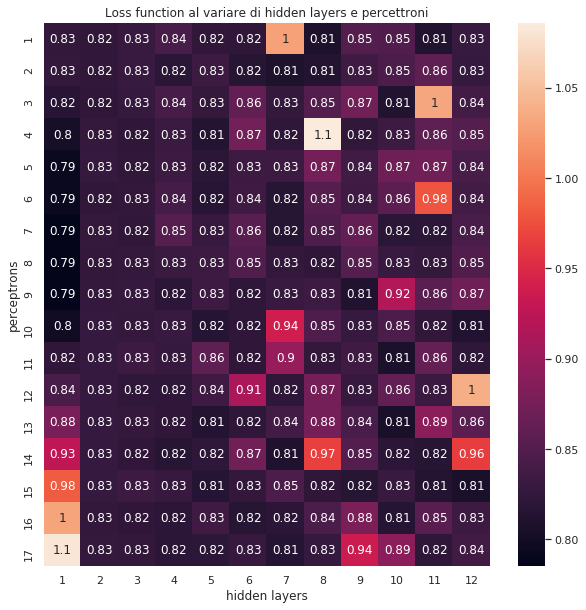

In [26]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(layers_neurons.T, annot=True,xticklabels=layers, yticklabels=neurons)
ax.set_title("Loss function al variare di hidden layers e percettroni")
ax.set_xlabel("hidden layers")
ax.set_ylabel("perceptrons")
plt.show()

Da questa prima analisi si nota come i valori leggermente più bassi di funzione di costo si ottengano nel caso di reti ad un singolo layer contenente più percettroni (6-8). Nelle analisi successive viene fissato a 7 il numero di percettroni per layer (singolo layer)

Successivamente, fissati $N_{HL}$ e $N_{p}$, vengono variate le funzioni di attivazione ed i metodi di discesa del gradiente. Il metro di paragone per stabilire il metodo più performante è il Mean Squared Error:

In [27]:
activation = np.zeros(5)

model = tf.keras.Sequential()

model.add(Dense(7, input_shape=(1,), activation='relu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[0] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[1] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='softplus'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[2] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[3] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='tanh'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[4] = score[0]

Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 11.0626 - mse: 11.0626 - val_loss: 10.9416 - val_mse: 10.9416
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 10.6630 - mse: 10.6630 - val_loss: 10.5171 - val_mse: 10.5171
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.2044 - mse: 10.2044 - val_loss: 10.0324 - val_mse: 10.0324
Epoch 4/90
17/17 [==============================] - 0s 1ms/step - loss: 9.7029 - mse: 9.7029 - val_loss: 9.4937 - val_mse: 9.4937
Epoch 5/90
17/17 [==============================] - 0s 1ms/step - loss: 9.1719 - mse: 9.1719 - val_loss: 8.9317 - val_mse: 8.9317
Epoch 6/90
17/17 [==============================] - 0s 1ms/step - loss: 8.6279 - mse: 8.6279 - val_loss: 8.3602 - val_mse: 8.3602
Epoch 7/90
17/17 [==============================] - 0s 1ms/step - loss: 8.0627 - mse: 8.0627 - val_loss: 7.7823 - val_mse: 7.7823
Epoch 8/90
17/17 [==============================] - 0s 1ms/step - loss: 7.4889

17/17 [==============================] - 0s 2ms/step - loss: 0.6641 - mse: 0.6641 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6592 - mse: 0.6592 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6547 - mse: 0.6547 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6504 - mse: 0.6504 - val_loss: 0.8172 - val_mse: 0.8172
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6465 - mse: 0.6465 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6427 - mse: 0.6427 - val_loss: 0.8129 - val_mse: 0.8129
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.8111 - val_mse: 0.8111
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6358 - mse: 0.6358 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0561 - mse: 1.0561 - val_loss: 0.9763 - val_mse: 0.9763
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0552 - mse: 1.0552 - val_loss: 0.9759 - val_mse: 0.9759
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0559 - mse: 1.0559 - val_loss: 0.9757 - val_mse: 0.9757
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0563 - mse: 1.0563 - val_loss: 0.9756 - val_mse: 0.9756
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0554 - mse: 1.0554 - val_loss: 0.9757 - val_mse: 0.9757
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0562 - mse: 1.0562 - val_loss: 0.9758 - val_mse: 0.9758
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0557 - mse: 1.0557 - val_loss: 0.9759 - val_mse: 0.9759
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0560 - mse: 1.0560 -

17/17 [==============================] - 0s 2ms/step - loss: 1.3748 - mse: 1.3748 - val_loss: 1.2000 - val_mse: 1.2000
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 1.2053 - mse: 1.2053 - val_loss: 1.0796 - val_mse: 1.0796
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 1.1225 - mse: 1.1225 - val_loss: 1.0244 - val_mse: 1.0244
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0858 - mse: 1.0858 - val_loss: 0.9995 - val_mse: 0.9995
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0701 - mse: 1.0701 - val_loss: 0.9884 - val_mse: 0.9884
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0629 - mse: 1.0629 - val_loss: 0.9832 - val_mse: 0.9832
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0601 - mse: 1.0601 - val_loss: 0.9809 - val_mse: 0.9809
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0584 - mse: 1.0584 - v

17/17 [==============================] - 0s 2ms/step - loss: 1.0565 - mse: 1.0565 - val_loss: 0.9766 - val_mse: 0.9766
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0568 - mse: 1.0568 - val_loss: 0.9768 - val_mse: 0.9768
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0568 - mse: 1.0568 - val_loss: 0.9768 - val_mse: 0.9768
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0567 - mse: 1.0567 - val_loss: 0.9765 - val_mse: 0.9765
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0567 - mse: 1.0567 - val_loss: 0.9766 - val_mse: 0.9766
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0566 - mse: 1.0566 - val_loss: 0.9766 - val_mse: 0.9766
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0566 - mse: 1.0566 - val_loss: 0.9767 - val_mse: 0.9767
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0563 - mse: 1.0563 -

17/17 [==============================] - 0s 3ms/step - loss: 6.6909 - mse: 6.6909 - val_loss: 6.6892 - val_mse: 6.6892
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6871 - mse: 6.6871 - val_loss: 6.6855 - val_mse: 6.6855
Epoch 43/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6835 - mse: 6.6835 - val_loss: 6.6820 - val_mse: 6.6820
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6800 - mse: 6.6800 - val_loss: 6.6786 - val_mse: 6.6786
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6768 - mse: 6.6768 - val_loss: 6.6755 - val_mse: 6.6755
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6737 - mse: 6.6737 - val_loss: 6.6724 - val_mse: 6.6724
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6707 - mse: 6.6707 - val_loss: 6.6695 - val_mse: 6.6695
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6679 - mse: 6.6679 -

17/17 [==============================] - 0s 2ms/step - loss: 6.6165 - mse: 6.6165 - val_loss: 6.6137 - val_mse: 6.6137
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6117 - mse: 6.6117 - val_loss: 6.6093 - val_mse: 6.6093
Epoch 15/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6076 - mse: 6.6076 - val_loss: 6.6055 - val_mse: 6.6055
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6041 - mse: 6.6041 - val_loss: 6.6022 - val_mse: 6.6022
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 6.6010 - mse: 6.6010 - val_loss: 6.5993 - val_mse: 6.5993
Epoch 18/90
17/17 [==============================] - 0s 3ms/step - loss: 6.5982 - mse: 6.5982 - val_loss: 6.5967 - val_mse: 6.5967
Epoch 19/90
17/17 [==============================] - 0s 3ms/step - loss: 6.5958 - mse: 6.5958 - val_loss: 6.5943 - val_mse: 6.5943
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5936 - mse: 6.5936 -

17/17 [==============================] - 0s 2ms/step - loss: 6.5641 - mse: 6.5641 - val_loss: 6.5636 - val_mse: 6.5636
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 6.5640 - mse: 6.5640 - val_loss: 6.5635 - val_mse: 6.5635
Epoch 77/90
17/17 [==============================] - 0s 3ms/step - loss: 6.5638 - mse: 6.5638 - val_loss: 6.5633 - val_mse: 6.5633
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 6.5637 - mse: 6.5637 - val_loss: 6.5632 - val_mse: 6.5632
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5636 - mse: 6.5636 - val_loss: 6.5631 - val_mse: 6.5631
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5635 - mse: 6.5635 - val_loss: 6.5630 - val_mse: 6.5630
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5633 - mse: 6.5633 - val_loss: 6.5628 - val_mse: 6.5628
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5632 - mse: 6.5632 -

In [28]:
print('MSE, activation RELU: ', activation[0])
print('MSE, activation ELU: ', activation[1])
print('MSE, activation SOFTPLUS: ', activation[2])
print('MSE, activation SIGMOID: ', activation[3])
print('MSE, activation TANH: ', activation[4])
print('')
print('Best activation function: ELU')

MSE, activation RELU:  0.7978881001472473
MSE, activation ELU:  0.9743527173995972
MSE, activation SOFTPLUS:  0.9768550395965576
MSE, activation SIGMOID:  6.608981132507324
MSE, activation TANH:  6.5619001388549805

Best activation function: ELU


In [29]:
opt = np.zeros(5)

model = tf.keras.Sequential()

model.add(Dense(7, input_shape=(1,), activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[0] = score[0]


model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[1] = score[0]


model.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[2] = score[0]


model.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[3] = score[0]


Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 12.0708 - mse: 12.0708 - val_loss: 11.6062 - val_mse: 11.6062
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 11.1772 - mse: 11.1772 - val_loss: 10.7033 - val_mse: 10.7033
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.2961 - mse: 10.2961 - val_loss: 9.8390 - val_mse: 9.8390
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 9.4623 - mse: 9.4623 - val_loss: 9.0317 - val_mse: 9.0317
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 8.6890 - mse: 8.6890 - val_loss: 8.2879 - val_mse: 8.2879
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 7.9805 - mse: 7.9805 - val_loss: 7.6083 - val_mse: 7.6083
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 7.3344 - mse: 7.3344 - val_loss: 6.9898 - val_mse: 6.9898
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 6.7459 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7014 - mse: 0.7014 - val_loss: 0.8068 - val_mse: 0.8068
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6955 - mse: 0.6955 - val_loss: 0.8036 - val_mse: 0.8036
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6899 - mse: 0.6899 - val_loss: 0.8007 - val_mse: 0.8007
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6847 - mse: 0.6847 - val_loss: 0.7982 - val_mse: 0.7982
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6798 - mse: 0.6798 - val_loss: 0.7959 - val_mse: 0.7959
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6751 - mse: 0.6751 - val_loss: 0.7937 - val_mse: 0.7937
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6707 - mse: 0.6707 - val_loss: 0.7918 - val_mse: 0.7918
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6665 - mse: 0.6665 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8096 - val_mse: 0.8096
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8110 - val_mse: 0.8110
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8113 - val_mse: 0.8113
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5711 - mse: 0.5711 - val_loss: 0.8118 - val_mse: 0.8118
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8127 - val_mse: 0.8127
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 -

In [30]:
print('MSE, optimizer SGD: ', opt[0])
print('MSE, optimizer ADAM: ', opt[1])
print('MSE, optimizer ADAGRAD: ', opt[2])
print('MSE, optimizer ADADELTA: ', opt[3])
print('')
print('Best optimizer: SGD')

MSE, optimizer SGD:  0.7782955169677734
MSE, optimizer ADAM:  0.8248967528343201
MSE, optimizer ADAGRAD:  0.8251203894615173
MSE, optimizer ADADELTA:  0.8251325488090515

Best optimizer: SGD


Da ultima è fatta variare la funzione di costo, anche in questo caso il metro di paragone per il metodo più performante è il MSE. ELU ed SGD sono stati impostati rispettivamente come funzione di attivazione e metodo di discesa del gradiente

In [31]:
lossf = np.zeros(5)

model = tf.keras.Sequential()

model.add(Dense(7, input_shape=(1,), activation='elu'))

model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
lossf[0] = score[1]


model.compile(optimizer='SGD', loss='mae', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
lossf[1] = score[1]


model.compile(optimizer='SGD', loss='msle', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
lossf[2] = score[1]


#model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['mse'])
#history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
#score = model.evaluate(x_valid, y_valid, batch_size=30)       
#lossf[3] = score[1]

Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.5776 - mse: 11.5776 - val_loss: 11.1233 - val_mse: 11.1233
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.6757 - mse: 10.6757 - val_loss: 10.2336 - val_mse: 10.2336
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 9.8128 - mse: 9.8128 - val_loss: 9.3921 - val_mse: 9.3921
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 9.0004 - mse: 9.0004 - val_loss: 8.6101 - val_mse: 8.6101
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 8.2477 - mse: 8.2477 - val_loss: 7.8901 - val_mse: 7.8901
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 7.5571 - mse: 7.5571 - val_loss: 7.2336 - val_mse: 7.2336
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 6.9279 - mse: 6.9279 - val_loss: 6.6363 - val_mse: 6.6363
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 6.3553 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.6421 - mse: 0.6421 - val_loss: 0.8048 - val_mse: 0.8048
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6382 - mse: 0.6382 - val_loss: 0.8027 - val_mse: 0.8027
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6346 - mse: 0.6346 - val_loss: 0.8009 - val_mse: 0.8009
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6311 - mse: 0.6311 - val_loss: 0.7992 - val_mse: 0.7992
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6279 - mse: 0.6279 - val_loss: 0.7978 - val_mse: 0.7978
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6248 - mse: 0.6248 - val_loss: 0.7964 - val_mse: 0.7964
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6220 - mse: 0.6220 - val_loss: 0.7953 - val_mse: 0.7953
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6194 - mse: 0.6194 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6132 - mse: 0.5741 - val_loss: 0.7047 - val_mse: 0.8197
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6123 - mse: 0.5738 - val_loss: 0.7043 - val_mse: 0.8207
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6115 - mse: 0.5738 - val_loss: 0.7038 - val_mse: 0.8217
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6107 - mse: 0.5738 - val_loss: 0.7034 - val_mse: 0.8228
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6099 - mse: 0.5735 - val_loss: 0.7030 - val_mse: 0.8239
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6090 - mse: 0.5734 - val_loss: 0.7026 - val_mse: 0.8249
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6082 - mse: 0.5733 - val_loss: 0.7021 - val_mse: 0.8260
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6075 - mse: 0.5732 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 10/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.5826 - val_loss: 0.0427 - val_mse: 0.8848
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.5826 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5826 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 - val_loss: 0.0426 - val_mse: 0.8846
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5827 -

In [32]:
print('Loss: mean squared error, accuracy: ', lossf[0])
print('Loss: mean absolute error, accuracy: ', lossf[1])
print('Loss: mean squared logarithmic error, accuracy: ', lossf[2])
#print('Loss: categorical cross-entropy, accuracy: ', lossf[3])
print('')
print('Best losso function: MSE')

Loss: mean squared error, accuracy:  0.790930986404419
Loss: mean absolute error, accuracy:  0.8848702907562256
Loss: mean squared logarithmic error, accuracy:  0.8845418691635132

Best losso function: MSE


Una volta ottimizzati la funzione di attivazione (ELU), la discesa del gradiente (SGD) e la funzione di costo (mean squared error), vengono fatti variare ancora una volta $N_{HL}$ e $N_{p}$ per vedere se i nuovi parametri hanno portato a miglioramenti sostanziali nell'accuratezza della rete neurale:

In [33]:
layers=np.linspace(1,12,12, dtype=int)
neurons=np.linspace(1,17,17, dtype=int)

layers_neurons = np.zeros((12, 17))

for i in layers:
    for j in neurons:

        model = tf.keras.Sequential()
        for k in range(i):
            model.add(Dense(j, activation='elu'))


        model.compile(optimizer='SGD', loss='mse', metrics=['mse'])


        history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))


        score = model.evaluate(x_valid, y_valid, batch_size=30)
        
        sns.set()
        layers_neurons[i-1][j-1] = score[0]

Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 9.8752 - mse: 9.8752 - val_loss: 7.0450 - val_mse: 7.0450
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 5.5213 - mse: 5.5213 - val_loss: 4.0283 - val_mse: 4.0283
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 3.2674 - mse: 3.2674 - val_loss: 2.4756 - val_mse: 2.4756
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0888 - mse: 2.0888 - val_loss: 1.6623 - val_mse: 1.6623
Epoch 5/90
17/17 [==============================] - 0s 3ms/step - loss: 1.4557 - mse: 1.4557 - val_loss: 1.2397 - val_mse: 1.2397
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 1.1122 - mse: 1.1122 - val_loss: 1.0185 - val_mse: 1.0185
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.9201 - mse: 0.9201 - val_loss: 0.9029 - val_mse: 0.9029
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8092 - mse: 0.80

17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 64/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5701 - mse: 0.5701 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6085 - mse: 0.6085 - val_loss: 0.7766 - val_mse: 0.7766
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6043 - mse: 0.6043 - val_loss: 0.7775 - val_mse: 0.7775
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6005 - mse: 0.6005 - val_loss: 0.7788 - val_mse: 0.7788
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 - val_loss: 0.7801 - val_mse: 0.7801
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5941 - mse: 0.5941 - val_loss: 0.7815 - val_mse: 0.7815
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5913 - mse: 0.5913 - val_loss: 0.7829 - val_mse: 0.7829
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 -

17/17 [==============================] - 0s 2ms/step - loss: 3.5674 - mse: 3.5674 - val_loss: 3.2633 - val_mse: 3.2633
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 3.0074 - mse: 3.0074 - val_loss: 2.7666 - val_mse: 2.7666
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5530 - mse: 2.5530 - val_loss: 2.3721 - val_mse: 2.3721
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1900 - mse: 2.1900 - val_loss: 2.0561 - val_mse: 2.0561
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8977 - mse: 1.8977 - val_loss: 1.8034 - val_mse: 1.8034
Epoch 12/90
17/17 [==============================] - 0s 1ms/step - loss: 1.6622 - mse: 1.6622 - val_loss: 1.5997 - val_mse: 1.5997
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4710 - mse: 1.4710 - val_loss: 1.4371 - val_mse: 1.4371
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3166 - mse: 1.3166 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8083 - val_mse: 0.8083
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8089 - val_mse: 0.8089
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8095 - val_mse: 0.8095
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8101 - val_mse: 0.8101
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5714 - mse: 0.5714 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6503 - mse: 0.6503 - val_loss: 0.7894 - val_mse: 0.7894
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6447 - mse: 0.6447 - val_loss: 0.7875 - val_mse: 0.7875
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6396 - mse: 0.6396 - val_loss: 0.7860 - val_mse: 0.7860
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6349 - mse: 0.6349 - val_loss: 0.7847 - val_mse: 0.7847
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7837 - val_mse: 0.7837
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6263 - mse: 0.6263 - val_loss: 0.7829 - val_mse: 0.7829
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6227 - mse: 0.6227 - val_loss: 0.7824 - val_mse: 0.7824
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6193 - mse: 0.6193 -

17/17 [==============================] - 0s 2ms/step - loss: 2.7729 - mse: 2.7729 - val_loss: 2.7006 - val_mse: 2.7006
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5017 - mse: 2.5017 - val_loss: 2.4528 - val_mse: 2.4528
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2642 - mse: 2.2642 - val_loss: 2.2361 - val_mse: 2.2361
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0558 - mse: 2.0558 - val_loss: 2.0481 - val_mse: 2.0481
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8747 - mse: 1.8747 - val_loss: 1.8852 - val_mse: 1.8852
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7171 - mse: 1.7171 - val_loss: 1.7426 - val_mse: 1.7426
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5788 - mse: 1.5788 - val_loss: 1.6178 - val_mse: 1.6178
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4572 - mse: 1.4572 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8015 - val_mse: 0.8015
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8019 - val_mse: 0.8019
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8023 - val_mse: 0.8023
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8028 - val_mse: 0.8028
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8032 - val_mse: 0.8032
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8036 - val_mse: 0.8036
Epoch 81/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8041 - val_mse: 0.8041
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7134 - mse: 0.7134 - val_loss: 0.8370 - val_mse: 0.8370
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7039 - mse: 0.7039 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6951 - mse: 0.6951 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6872 - mse: 0.6872 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6799 - mse: 0.6799 - val_loss: 0.8156 - val_mse: 0.8156
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6733 - mse: 0.6733 - val_loss: 0.8115 - val_mse: 0.8115
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6669 - mse: 0.6669 - val_loss: 0.8079 - val_mse: 0.8079
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6611 - mse: 0.6611 -

17/17 [==============================] - 0s 2ms/step - loss: 2.8437 - mse: 2.8437 - val_loss: 2.7405 - val_mse: 2.7405
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6559 - mse: 2.6559 - val_loss: 2.5634 - val_mse: 2.5634
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4842 - mse: 2.4842 - val_loss: 2.4041 - val_mse: 2.4041
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3292 - mse: 2.3292 - val_loss: 2.2578 - val_mse: 2.2578
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1864 - mse: 2.1864 - val_loss: 2.1240 - val_mse: 2.1240
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0558 - mse: 2.0558 - val_loss: 2.0030 - val_mse: 2.0030
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9372 - mse: 1.9372 - val_loss: 1.8933 - val_mse: 1.8933
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8292 - mse: 1.8292 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6233 - mse: 0.6233 - val_loss: 0.7838 - val_mse: 0.7838
Epoch 82/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6213 - mse: 0.6213 - val_loss: 0.7835 - val_mse: 0.7835
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7832 - val_mse: 0.7832
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6175 - mse: 0.6175 - val_loss: 0.7830 - val_mse: 0.7830
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6158 - mse: 0.6158 - val_loss: 0.7829 - val_mse: 0.7829
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6140 - mse: 0.6140 - val_loss: 0.7828 - val_mse: 0.7828
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6125 - mse: 0.6125 - val_loss: 0.7827 - val_mse: 0.7827
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6110 - mse: 0.6110 -

Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8547 - mse: 0.8547 - val_loss: 0.9211 - val_mse: 0.9211
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8395 - mse: 0.8395 - val_loss: 0.9094 - val_mse: 0.9094
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8256 - mse: 0.8256 - val_loss: 0.8985 - val_mse: 0.8985
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8125 - mse: 0.8125 - val_loss: 0.8884 - val_mse: 0.8884
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8003 - mse: 0.8003 - val_loss: 0.8793 - val_mse: 0.8793
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7889 - mse: 0.7889 - val_loss: 0.8707 - val_mse: 0.8707
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7781 - mse: 0.7781 - val_loss: 0.8628 - val_mse: 0.8628
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7680 - m

Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6584 - mse: 2.6584 - val_loss: 2.5939 - val_mse: 2.5939
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5213 - mse: 2.5213 - val_loss: 2.4632 - val_mse: 2.4632
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3932 - mse: 2.3932 - val_loss: 2.3426 - val_mse: 2.3426
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2748 - mse: 2.2748 - val_loss: 2.2306 - val_mse: 2.2306
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1646 - mse: 2.1646 - val_loss: 2.1260 - val_mse: 2.1260
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0615 - mse: 2.0615 - val_loss: 2.0301 - val_mse: 2.0301
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9666 - mse: 1.9666 - val_loss: 1.9398 - val_mse: 1.9398
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8772 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.6496 - mse: 0.6496 - val_loss: 0.7896 - val_mse: 0.7896
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6467 - mse: 0.6467 - val_loss: 0.7885 - val_mse: 0.7885
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6441 - mse: 0.6441 - val_loss: 0.7874 - val_mse: 0.7874
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.7864 - mse: 0.7864
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.9353 - mse: 11.9353 - val_loss: 11.6048 - val_mse: 11.6048
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 11.2676 - mse: 11.2676 - val_loss: 10.9338 - val_mse: 10.9338
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.6104 - mse: 10.6104 - val_loss: 10.2865 - val_mse: 10.2865
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 9.9816 - mse: 9.9816 - val_loss: 9.6751 - val_mse: 9.

Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9181 - mse: 0.9181 - val_loss: 0.9934 - val_mse: 0.9934
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9011 - mse: 0.9011 - val_loss: 0.9791 - val_mse: 0.9791
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8852 - mse: 0.8852 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8700 - mse: 0.8700 - val_loss: 0.9529 - val_mse: 0.9529
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8557 - mse: 0.8557 - val_loss: 0.9411 - val_mse: 0.9411
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8424 - mse: 0.8424 - val_loss: 0.9301 - val_mse: 0.9301
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8297 - mse: 0.8297 - val_loss: 0.9198 - val_mse: 0.9198
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8177 - m

Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5647 - mse: 2.5647 - val_loss: 2.5302 - val_mse: 2.5302
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4556 - mse: 2.4556 - val_loss: 2.4264 - val_mse: 2.4264
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3531 - mse: 2.3531 - val_loss: 2.3289 - val_mse: 2.3289
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 2.2566 - mse: 2.2566 - val_loss: 2.2370 - val_mse: 2.2370
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1655 - mse: 2.1655 - val_loss: 2.1504 - val_mse: 2.1504
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0796 - mse: 2.0796 - val_loss: 2.0690 - val_mse: 2.0690
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9986 - mse: 1.9986 - val_loss: 1.9922 - val_mse: 1.9922
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9222 - m

Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.8626 - mse: 10.8626 - val_loss: 10.5962 - val_mse: 10.5962
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 10.3297 - mse: 10.3297 - val_loss: 10.0700 - val_mse: 10.0700
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 9.8159 - mse: 9.8159 - val_loss: 9.5653 - val_mse: 9.5653
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 9.3251 - mse: 9.3251 - val_loss: 9.0875 - val_mse: 9.0875
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8608 - mse: 8.8608 - val_loss: 8.6361 - val_mse: 8.6361
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 8.4219 - mse: 8.4219 - val_loss: 8.2068 - val_mse: 8.2068
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 8.0047 - mse: 8.0047 - val_loss: 7.8009 - val_mse: 7.8009
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 7.6101 - 

17/17 [==============================] - 0s 2ms/step - loss: 1.0090 - mse: 1.0090 - val_loss: 1.0778 - val_mse: 1.0778
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.9902 - mse: 0.9902 - val_loss: 1.0612 - val_mse: 1.0612
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9722 - mse: 0.9722 - val_loss: 1.0454 - val_mse: 1.0454
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9552 - mse: 0.9552 - val_loss: 1.0305 - val_mse: 1.0305
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9389 - mse: 0.9389 - val_loss: 1.0163 - val_mse: 1.0163
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9234 - mse: 0.9234 - val_loss: 1.0030 - val_mse: 1.0030
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9088 - mse: 0.9088 - val_loss: 0.9903 - val_mse: 0.9903
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8947 - mse: 0.8947 -

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5361 - mse: 2.5361 - val_loss: 2.5013 - val_mse: 2.5013
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4451 - mse: 2.4451 - val_loss: 2.4145 - val_mse: 2.4145
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3591 - mse: 2.3591 - val_loss: 2.3323 - val_mse: 2.3323
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2774 - mse: 2.2774 - val_loss: 2.2541 - val_mse: 2.2541
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1997 - mse: 2.1997 - val_loss: 2.1795 - val_mse: 2.1795
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1255 - mse: 2.1255 - val_loss: 2.1092 - val_mse: 2.1092
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0554 - mse: 2.0554 - val_loss: 2.0420 - val_mse: 2.0420
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9884 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 8.4864 - mse: 8.4864 - val_loss: 8.3018 - val_mse: 8.3018
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 8.1252 - mse: 8.1252 - val_loss: 7.9482 - val_mse: 7.9482
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 7.7805 - mse: 7.7805 - val_loss: 7.6109 - val_mse: 7.6109
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 7.4517 - mse: 7.4517 - val_loss: 7.2892 - val_mse: 7.2892
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1379 - mse: 7.1379 - val_loss: 6.9846 - val_mse: 6.9846
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8407 - mse: 6.8407 - val_loss: 6.6931 - val_mse: 6.6931
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5561 - mse: 6.5561 - val_loss: 6.4150 - val_mse: 6.4150
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.2847 - ms

17/17 [==============================] - 0s 2ms/step - loss: 1.0994 - mse: 1.0994 - val_loss: 1.1535 - val_mse: 1.1535
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0793 - mse: 1.0793 - val_loss: 1.1355 - val_mse: 1.1355
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0602 - mse: 1.0602 - val_loss: 1.1182 - val_mse: 1.1182
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0417 - mse: 1.0417 - val_loss: 1.1018 - val_mse: 1.1018
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0242 - mse: 1.0242 - val_loss: 1.0861 - val_mse: 1.0861
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0073 - mse: 1.0073 - val_loss: 1.0712 - val_mse: 1.0712
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9913 - mse: 0.9913 - val_loss: 1.0569 - val_mse: 1.0569
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9758 - mse: 0.9758 -

Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4350 - mse: 2.4350 - val_loss: 2.4326 - val_mse: 2.4326
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3589 - mse: 2.3589 - val_loss: 2.3589 - val_mse: 2.3589
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2855 - mse: 2.2855 - val_loss: 2.2889 - val_mse: 2.2889
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2156 - mse: 2.2156 - val_loss: 2.2218 - val_mse: 2.2218
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1487 - mse: 2.1487 - val_loss: 2.1580 - val_mse: 2.1580
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0848 - mse: 2.0848 - val_loss: 2.0967 - val_mse: 2.0967
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0235 - mse: 2.0235 - val_loss: 2.0384 - val_mse: 2.0384
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9651 - m

Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1134 - mse: 7.1134 - val_loss: 6.9795 - val_mse: 6.9795
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8532 - mse: 6.8532 - val_loss: 6.7243 - val_mse: 6.7243
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6034 - mse: 6.6034 - val_loss: 6.4790 - val_mse: 6.4790
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 6.3633 - mse: 6.3633 - val_loss: 6.2445 - val_mse: 6.2445
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 6.1336 - mse: 6.1336 - val_loss: 6.0195 - val_mse: 6.0195
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 5.9133 - mse: 5.9133 - val_loss: 5.8051 - val_mse: 5.8051
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 5.7030 - mse: 5.7030 - val_loss: 5.5980 - val_mse: 5.5980
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 5.5000 - m

17/17 [==============================] - 0s 2ms/step - loss: 1.1849 - mse: 1.1849 - val_loss: 1.2334 - val_mse: 1.2334
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1642 - mse: 1.1642 - val_loss: 1.2144 - val_mse: 1.2144
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1442 - mse: 1.1442 - val_loss: 1.1961 - val_mse: 1.1961
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1250 - mse: 1.1250 - val_loss: 1.1786 - val_mse: 1.1786
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1064 - mse: 1.1064 - val_loss: 1.1618 - val_mse: 1.1618
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0886 - mse: 1.0886 - val_loss: 1.1457 - val_mse: 1.1457
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0715 - mse: 1.0715 - val_loss: 1.1304 - val_mse: 1.1304
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0552 - mse: 1.0552 -

Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4545 - mse: 2.4545 - val_loss: 2.4446 - val_mse: 2.4446
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3873 - mse: 2.3873 - val_loss: 2.3797 - val_mse: 2.3797
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3224 - mse: 2.3224 - val_loss: 2.3175 - val_mse: 2.3175
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2603 - mse: 2.2603 - val_loss: 2.2573 - val_mse: 2.2573
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2002 - mse: 2.2002 - val_loss: 2.1999 - val_mse: 2.1999
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1427 - mse: 2.1427 - val_loss: 2.1443 - val_mse: 2.1443
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0870 - mse: 2.0870 - val_loss: 2.0914 - val_mse: 2.0914
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0339 - m

Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - mse: 0.5718 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8327 - val_mse: 0.8327
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 87/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 89/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 90/90
2/2 [==============================] - 0s 804us/step - loss: 0.8261 - mse: 0.8261
E

17/17 [==============================] - 0s 3ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5705 - mse: 0.5705 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5511 - mse: 0.5511 - val_loss: 0.8022 - val_mse: 0.8022
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5509 - mse: 0.5509 - val_loss: 0.7985 - val_mse: 0.7985
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5513 - mse: 0.5513 - val_loss: 0.8009 - val_mse: 0.8009
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.8017 - val_mse: 0.8017
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5493 - mse: 0.5493 - val_loss: 0.8015 - val_mse: 0.8015
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5500 - mse: 0.5500 - val_loss: 0.7994 - val_mse: 0.7994
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5488 - mse: 0.5488 - val_loss: 0.7941 - val_mse: 0.7941
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5478 - mse: 0.5478 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4936 - mse: 0.4936 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 90/90
2/2 [==============================] - 0s 863us/step - loss: 0.7248 - mse: 0.7248
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.6127 - mse: 11.6127 - val_loss: 10.3054 - val_mse: 10.3054
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 9.2403 - mse: 9.2403 - val_loss: 7.9815 - val_mse: 7.9815
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 7.0182 - mse: 7.0182 - val_loss: 5.8425 - val_mse: 5.8425
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 4.9967 - mse: 4.9967 - val_loss: 3.9579 - val_mse: 3.9579
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 3.3054 - mse: 3.3054 - val_loss: 2.5078 - val_mse: 2.5078
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0932 - mse: 2.0932 - val_loss: 1.5938 - val_mse: 1.5938
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.3857 - mse: 0.3857 - val_loss: 0.5678 - val_mse: 0.5678
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3823 - mse: 0.3823 - val_loss: 0.5613 - val_mse: 0.5613
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3783 - mse: 0.3783 - val_loss: 0.5556 - val_mse: 0.5556
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3747 - mse: 0.3747 - val_loss: 0.5475 - val_mse: 0.5475
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3705 - mse: 0.3705 - val_loss: 0.5425 - val_mse: 0.5425
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3664 - mse: 0.3664 - val_loss: 0.5373 - val_mse: 0.5373
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3626 - mse: 0.3626 - val_loss: 0.5287 - val_mse: 0.5287
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3585 - mse: 0.3585 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5671 - mse: 0.5671 - val_loss: 0.8156 - val_mse: 0.8156
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.8148 - val_mse: 0.8148
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5665 - mse: 0.5665 - val_loss: 0.8159 - val_mse: 0.8159
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5652 - mse: 0.5652 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5653 - mse: 0.5653 - val_loss: 0.8158 - val_mse: 0.8158
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.8164 - val_mse: 0.8164
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5652 - mse: 0.5652 - val_loss: 0.8175 - val_mse: 0.8175
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5653 - mse: 0.5653 -

17/17 [==============================] - 0s 2ms/step - loss: 5.3024 - mse: 5.3024 - val_loss: 4.6776 - val_mse: 4.6776
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 4.1572 - mse: 4.1572 - val_loss: 3.6264 - val_mse: 3.6264
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 3.1766 - mse: 3.1766 - val_loss: 2.7516 - val_mse: 2.7516
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3723 - mse: 2.3723 - val_loss: 2.0608 - val_mse: 2.0608
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7498 - mse: 1.7498 - val_loss: 1.5576 - val_mse: 1.5576
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3030 - mse: 1.3030 - val_loss: 1.2198 - val_mse: 1.2198
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0056 - mse: 1.0056 - val_loss: 1.0073 - val_mse: 1.0073
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8179 - mse: 0.8179 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.4891 - mse: 0.4891 - val_loss: 0.7191 - val_mse: 0.7191
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4874 - mse: 0.4874 - val_loss: 0.7166 - val_mse: 0.7166
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4857 - mse: 0.4857 - val_loss: 0.7144 - val_mse: 0.7144
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4836 - mse: 0.4836 - val_loss: 0.7116 - val_mse: 0.7116
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4820 - mse: 0.4820 - val_loss: 0.7088 - val_mse: 0.7088
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4804 - mse: 0.4804 - val_loss: 0.7053 - val_mse: 0.7053
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.7023 - val_mse: 0.7023
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4762 - mse: 0.4762 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4712 - mse: 0.4712 - val_loss: 0.6973 - val_mse: 0.6973
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4698 - mse: 0.4698 - val_loss: 0.6943 - val_mse: 0.6943
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4677 - mse: 0.4677 - val_loss: 0.6924 - val_mse: 0.6924
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4665 - mse: 0.4665 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4646 - mse: 0.4646 - val_loss: 0.6887 - val_mse: 0.6887
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4629 - mse: 0.4629 - val_loss: 0.6878 - val_mse: 0.6878
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4615 - mse: 0.4615 - val_loss: 0.6865 - val_mse: 0.6865
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4599 - mse: 0.4599 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7691 - mse: 0.7691 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7246 - mse: 0.7246 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6936 - mse: 0.6936 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6705 - mse: 0.6705 - val_loss: 0.8096 - val_mse: 0.8096
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6531 - mse: 0.6531 - val_loss: 0.8085 - val_mse: 0.8085
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6393 - mse: 0.6393 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6296 - mse: 0.6296 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6202 - mse: 0.6202 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 74/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5687 - mse: 0.5687 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5684 - mse: 0.5684 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5690 - mse: 0.5690 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5690 - mse: 0.5690 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5679 - mse: 0.5679 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5353 - mse: 0.5353 - val_loss: 0.7766 - val_mse: 0.7766
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5350 - mse: 0.5350 - val_loss: 0.7761 - val_mse: 0.7761
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5328 - mse: 0.5328 - val_loss: 0.7746 - val_mse: 0.7746
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 0.7728 - val_mse: 0.7728
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5305 - mse: 0.5305 - val_loss: 0.7701 - val_mse: 0.7701
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5295 - mse: 0.5295 - val_loss: 0.7681 - val_mse: 0.7681
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5284 - mse: 0.5284 - val_loss: 0.7660 - val_mse: 0.7660
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5272 - mse: 0.5272 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6578 - mse: 0.6578 - val_loss: 0.7540 - val_mse: 0.7540
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6347 - mse: 0.6347 - val_loss: 0.7471 - val_mse: 0.7471
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.7390 - val_mse: 0.7390
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.7367 - val_mse: 0.7367
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5536 - mse: 0.5536 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4289 - mse: 0.4289 - val_loss: 0.6435 - val_mse: 0.6435
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4271 - mse: 0.4271 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4238 - mse: 0.4238 - val_loss: 0.6365 - val_mse: 0.6365
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.6339 - val_mse: 0.6339
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4201 - mse: 0.4201 - val_loss: 0.6311 - val_mse: 0.6311
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4186 - mse: 0.4186 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5363 - mse: 0.5363 - val_loss: 0.7800 - val_mse: 0.7800
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5355 - mse: 0.5355 - val_loss: 0.7792 - val_mse: 0.7792
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5349 - mse: 0.5349 - val_loss: 0.7778 - val_mse: 0.7778
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5347 - mse: 0.5347 - val_loss: 0.7777 - val_mse: 0.7777
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5336 - mse: 0.5336 - val_loss: 0.7774 - val_mse: 0.7774
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5327 - mse: 0.5327 - val_loss: 0.7769 - val_mse: 0.7769
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5319 - mse: 0.5319 - val_loss: 0.7752 - val_mse: 0.7752
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5314 - mse: 0.5314 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5598 - mse: 0.5598 - val_loss: 0.7708 - val_mse: 0.7708
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5584 - mse: 0.5584 - val_loss: 0.7726 - val_mse: 0.7726
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5565 - mse: 0.5565 - val_loss: 0.7745 - val_mse: 0.7745
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7761 - val_mse: 0.7761
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5535 - mse: 0.5535 - val_loss: 0.7771 - val_mse: 0.7771
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5522 - mse: 0.5522 - val_loss: 0.7786 - val_mse: 0.7786
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7796 - val_mse: 0.7796
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5504 - mse: 0.5504 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5124 - mse: 0.5124 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5112 - mse: 0.5112 - val_loss: 0.7444 - val_mse: 0.7444
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.7435 - val_mse: 0.7435
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5092 - mse: 0.5092 - val_loss: 0.7417 - val_mse: 0.7417
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5084 - mse: 0.5084 - val_loss: 0.7410 - val_mse: 0.7410
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.7390 - mse: 0.7390
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.6975 - mse: 11.6975 - val_loss: 11.1756 - val_mse: 11.1756
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.6462 - mse: 10.6462 - val_loss: 10.0660 - val_mse: 10.06

Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5601 - mse: 0.5601 - val_loss: 0.8118 - val_mse: 0.8118
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5596 - mse: 0.5596 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5599 - mse: 0.5599 - val_loss: 0.8120 - val_mse: 0.8120
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.8110 - val_mse: 0.8110
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.8103 - val_mse: 0.8103
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5588 - mse: 0.5588 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5584 - mse: 0.5584 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5583 - m

Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5418 - mse: 0.5418 - val_loss: 0.7591 - val_mse: 0.7591
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5401 - mse: 0.5401 - val_loss: 0.7594 - val_mse: 0.7594
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5384 - mse: 0.5384 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5371 - mse: 0.5371 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5358 - mse: 0.5358 - val_loss: 0.7619 - val_mse: 0.7619
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5344 - mse: 0.5344 - val_loss: 0.7625 - val_mse: 0.7625
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5334 - mse: 0.5334 - val_loss: 0.7631 - val_mse: 0.7631
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5323 - m

2/2 [==============================] - 0s 1ms/step - loss: 0.7182 - mse: 0.7182
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.8051 - mse: 11.8051 - val_loss: 11.3294 - val_mse: 11.3294
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.8547 - mse: 10.8547 - val_loss: 10.3416 - val_mse: 10.3416
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 9.8208 - mse: 9.8208 - val_loss: 9.2315 - val_mse: 9.2315
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 8.6381 - mse: 8.6381 - val_loss: 7.9540 - val_mse: 7.9540
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 7.2836 - mse: 7.2836 - val_loss: 6.5162 - val_mse: 6.5162
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 5.8010 - mse: 5.8010 - val_loss: 5.0133 - val_mse: 5.0133
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 4.3252 - mse: 4.3252 - val_loss: 3.6198 - val_mse: 3.6198
Ep

Epoch 63/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.8099 - val_mse: 0.8099
Epoch 64/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5577 - mse: 0.5577 - val_loss: 0.8095 - val_mse: 0.8095
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.8096 - val_mse: 0.8096
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5579 - mse: 0.5579 - val_loss: 0.8086 - val_mse: 0.8086
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5574 - mse: 0.5574 - val_loss: 0.8080 - val_mse: 0.8080
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5568 - mse: 0.5568 - val_loss: 0.8069 - val_mse: 0.8069
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.8077 - val_mse: 0.8077
Epoch 70/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5568 - m

Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8075 - val_mse: 0.8075
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8076 - val_mse: 0.8076
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8083 - val_mse: 0.8083
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8086 - val_mse: 0.8086
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8084 - val_mse: 0.8084
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.8083 - val_mse: 0.8083
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5691 - m

Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 6.2077 - mse: 6.2077 - val_loss: 5.5428 - val_mse: 5.5428
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 4.9913 - mse: 4.9913 - val_loss: 4.3492 - val_mse: 4.3492
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 3.8459 - mse: 3.8459 - val_loss: 3.2789 - val_mse: 3.2789
Epoch 10/90
17/17 [==============================] - 0s 3ms/step - loss: 2.8624 - mse: 2.8624 - val_loss: 2.4119 - val_mse: 2.4119
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0942 - mse: 2.0942 - val_loss: 1.7813 - val_mse: 1.7813
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5514 - mse: 1.5514 - val_loss: 1.3600 - val_mse: 1.3600
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1937 - mse: 1.1937 - val_loss: 1.1044 - val_mse: 1.1044
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9740 - mse:

17/17 [==============================] - 0s 2ms/step - loss: 0.5395 - mse: 0.5395 - val_loss: 0.7882 - val_mse: 0.7882
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5392 - mse: 0.5392 - val_loss: 0.7854 - val_mse: 0.7854
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5386 - mse: 0.5386 - val_loss: 0.7852 - val_mse: 0.7852
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5381 - mse: 0.5381 - val_loss: 0.7850 - val_mse: 0.7850
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5371 - mse: 0.5371 - val_loss: 0.7838 - val_mse: 0.7838
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5367 - mse: 0.5367 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5367 - mse: 0.5367 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4024 - mse: 0.4024 - val_loss: 0.6052 - val_mse: 0.6052
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4024 - mse: 0.4024 - val_loss: 0.6127 - val_mse: 0.6127
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4031 - mse: 0.4031 - val_loss: 0.6116 - val_mse: 0.6116
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4027 - mse: 0.4027 - val_loss: 0.5974 - val_mse: 0.5974
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4016 - mse: 0.4016 - val_loss: 0.5939 - val_mse: 0.5939
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4053 - mse: 0.4053 - val_loss: 0.5991 - val_mse: 0.5991
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6023 - val_mse: 0.6023
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4000 - mse: 0.4000 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3254 - mse: 0.3254 - val_loss: 0.4871 - val_mse: 0.4871
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3197 - mse: 0.3197 - val_loss: 0.4743 - val_mse: 0.4743
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3125 - mse: 0.3125 - val_loss: 0.4604 - val_mse: 0.4604
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3056 - mse: 0.3056 - val_loss: 0.4536 - val_mse: 0.4536
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.4371 - val_mse: 0.4371
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2906 - mse: 0.2906 - val_loss: 0.4218 - val_mse: 0.4218
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2821 - mse: 0.2821 - val_loss: 0.4072 - val_mse: 0.4072
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2753 - mse: 0.2753 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.1169 - val_mse: 0.1169
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989 - val_loss: 0.1144 - val_mse: 0.1144
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.1139 - val_mse: 0.1139
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0953 - mse: 0.0953 - val_loss: 0.1138 - val_mse: 0.1138
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0926 - mse: 0.0926 - val_loss: 0.1084 - val_mse: 0.1084
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0898 - mse: 0.0898 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4281 - mse: 0.4281 - val_loss: 0.6042 - val_mse: 0.6042
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4201 - mse: 0.4201 - val_loss: 0.5908 - val_mse: 0.5908
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4123 - mse: 0.4123 - val_loss: 0.5779 - val_mse: 0.5779
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4080 - mse: 0.4080 - val_loss: 0.5761 - val_mse: 0.5761
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.5644 - val_mse: 0.5644
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3928 - mse: 0.3928 - val_loss: 0.5569 - val_mse: 0.5569
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3840 - mse: 0.3840 - val_loss: 0.5467 - val_mse: 0.5467
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3768 - mse: 0.3768 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5492 - mse: 0.5492 - val_loss: 0.7939 - val_mse: 0.7939
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5476 - mse: 0.5476 - val_loss: 0.7950 - val_mse: 0.7950
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5435 - mse: 0.5435 - val_loss: 0.7874 - val_mse: 0.7874
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5422 - mse: 0.5422 - val_loss: 0.7858 - val_mse: 0.7858
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5405 - mse: 0.5405 - val_loss: 0.7806 - val_mse: 0.7806
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5365 - mse: 0.5365 - val_loss: 0.7774 - val_mse: 0.7774
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5343 - mse: 0.5343 - val_loss: 0.7748 - val_mse: 0.7748
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5346 - mse: 0.5346 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.2872 - val_loss: 0.4218 - val_mse: 0.4218
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2832 - mse: 0.2832 - val_loss: 0.4134 - val_mse: 0.4134
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2772 - mse: 0.2772 - val_loss: 0.4082 - val_mse: 0.4082
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2732 - mse: 0.2732 - val_loss: 0.3998 - val_mse: 0.3998
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2691 - mse: 0.2691 - val_loss: 0.3950 - val_mse: 0.3950
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2643 - mse: 0.2643 - val_loss: 0.3832 - val_mse: 0.3832
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2596 - mse: 0.2596 - val_loss: 0.3766 - val_mse: 0.3766
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2552 - mse: 0.2552 -

Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.5786 - val_mse: 0.5786
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3841 - mse: 0.3841 - val_loss: 0.5759 - val_mse: 0.5759
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3816 - mse: 0.3816 - val_loss: 0.5725 - val_mse: 0.5725
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3778 - mse: 0.3778 - val_loss: 0.5723 - val_mse: 0.5723
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3746 - mse: 0.3746 - val_loss: 0.5650 - val_mse: 0.5650
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3708 - mse: 0.3708 - val_loss: 0.5582 - val_mse: 0.5582
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3680 - mse: 0.3680 - val_loss: 0.5493 - val_mse: 0.5493
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3641 - m

Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.7106 - val_mse: 0.7106
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4765 - mse: 0.4765 - val_loss: 0.7059 - val_mse: 0.7059
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4739 - mse: 0.4739 - val_loss: 0.7014 - val_mse: 0.7014
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4701 - mse: 0.4701 - val_loss: 0.7006 - val_mse: 0.7006
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4685 - mse: 0.4685 - val_loss: 0.6917 - val_mse: 0.6917
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4650 - mse: 0.4650 - val_loss: 0.6890 - val_mse: 0.6890
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4622 - mse: 0.4622 - val_loss: 0.6831 - val_mse: 0.6831
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4596 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.2780 - mse: 0.2780 - val_loss: 0.3976 - val_mse: 0.3976
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2750 - mse: 0.2750 - val_loss: 0.3960 - val_mse: 0.3960
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2716 - mse: 0.2716 - val_loss: 0.3864 - val_mse: 0.3864
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.3795 - mse: 0.3795
Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.5196 - mse: 11.5196 - val_loss: 10.5408 - val_mse: 10.5408
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 9.4828 - mse: 9.4828 - val_loss: 8.0898 - val_mse: 8.0898
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5224 - mse: 6.5224 - val_loss: 4.5201 - val_mse: 4.5201
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.9564 - mse: 2.9564 - val_loss: 1.5644 - val_mse: 1.5644
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.4758 - mse: 0.4758 - val_loss: 0.6937 - val_mse: 0.6937
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4728 - mse: 0.4728 - val_loss: 0.6958 - val_mse: 0.6958
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4702 - mse: 0.4702 - val_loss: 0.6923 - val_mse: 0.6923
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4671 - mse: 0.4671 - val_loss: 0.6849 - val_mse: 0.6849
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4636 - mse: 0.4636 - val_loss: 0.6812 - val_mse: 0.6812
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4604 - mse: 0.4604 - val_loss: 0.6768 - val_mse: 0.6768
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4572 - mse: 0.4572 - val_loss: 0.6705 - val_mse: 0.6705
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4531 - mse: 0.4531 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5501 - mse: 0.5501 - val_loss: 0.7996 - val_mse: 0.7996
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5488 - mse: 0.5488 - val_loss: 0.8003 - val_mse: 0.8003
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5480 - mse: 0.5480 - val_loss: 0.8000 - val_mse: 0.8000
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5476 - mse: 0.5476 - val_loss: 0.7956 - val_mse: 0.7956
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5449 - mse: 0.5449 - val_loss: 0.7986 - val_mse: 0.7986
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5439 - mse: 0.5439 - val_loss: 0.7962 - val_mse: 0.7962
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5430 - mse: 0.5430 - val_loss: 0.7990 - val_mse: 0.7990
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5422 - mse: 0.5422 -

17/17 [==============================] - 0s 2ms/step - loss: 5.0902 - mse: 5.0902 - val_loss: 3.3446 - val_mse: 3.3446
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1188 - mse: 2.1188 - val_loss: 1.2880 - val_mse: 1.2880
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8523 - mse: 0.8523 - val_loss: 0.8533 - val_mse: 0.8533
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6091 - mse: 0.6091 - val_loss: 0.8000 - val_mse: 0.8000
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5693 - mse: 0.5693 - val_loss: 0.7980 - val_mse: 0.7980
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5590 - mse: 0.5590 - val_loss: 0.7921 - val_mse: 0.7921
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5537 - mse: 0.5537 - val_loss: 0.7928 - val_mse: 0.7928
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5541 - mse: 0.5541 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.5087 - mse: 0.5087 - val_loss: 0.7511 - val_mse: 0.7511
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5054 - mse: 0.5054 - val_loss: 0.7486 - val_mse: 0.7486
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5055 - mse: 0.5055 - val_loss: 0.7479 - val_mse: 0.7479
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5027 - mse: 0.5027 - val_loss: 0.7440 - val_mse: 0.7440
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5009 - mse: 0.5009 - val_loss: 0.7379 - val_mse: 0.7379
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5004 - mse: 0.5004 - val_loss: 0.7371 - val_mse: 0.7371
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4979 - mse: 0.4979 - val_loss: 0.7394 - val_mse: 0.7394
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4978 - mse: 0.4978 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4762 - mse: 0.4762 - val_loss: 0.7091 - val_mse: 0.7091
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4737 - mse: 0.4737 - val_loss: 0.7052 - val_mse: 0.7052
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4710 - mse: 0.4710 - val_loss: 0.7067 - val_mse: 0.7067
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4712 - mse: 0.4712 - val_loss: 0.7013 - val_mse: 0.7013
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4671 - mse: 0.4671 - val_loss: 0.6980 - val_mse: 0.6980
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4666 - mse: 0.4666 - val_loss: 0.6927 - val_mse: 0.6927
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4651 - mse: 0.4651 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4605 - mse: 0.4605 -

17/17 [==============================] - 0s 2ms/step - loss: 0.8255 - mse: 0.8255 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7469 - mse: 0.7469 - val_loss: 0.8003 - val_mse: 0.8003
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6951 - mse: 0.6951 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6569 - mse: 0.6569 - val_loss: 0.7779 - val_mse: 0.7779
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6281 - mse: 0.6281 - val_loss: 0.7714 - val_mse: 0.7714
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6081 - mse: 0.6081 - val_loss: 0.7725 - val_mse: 0.7725
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.7715 - val_mse: 0.7715
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.5830 - val_mse: 0.5830
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3875 - mse: 0.3875 - val_loss: 0.5793 - val_mse: 0.5793
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.5731 - val_mse: 0.5731
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.5688 - val_mse: 0.5688
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.5650 - val_mse: 0.5650
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3737 - mse: 0.3737 - val_loss: 0.5612 - val_mse: 0.5612
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3703 - mse: 0.3703 - val_loss: 0.5532 - val_mse: 0.5532
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3672 - mse: 0.3672 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4372 - mse: 0.4372 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4340 - mse: 0.4340 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4321 - mse: 0.4321 - val_loss: 0.6428 - val_mse: 0.6428
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4298 - mse: 0.4298 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4262 - mse: 0.4262 - val_loss: 0.6362 - val_mse: 0.6362
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4241 - mse: 0.4241 - val_loss: 0.6325 - val_mse: 0.6325
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4214 - mse: 0.4214 - val_loss: 0.6307 - val_mse: 0.6307
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4185 - mse: 0.4185 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5596 - mse: 0.5596 - val_loss: 0.7947 - val_mse: 0.7947
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7991 - val_mse: 0.7991
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7973 - val_mse: 0.7973
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5564 - mse: 0.5564 - val_loss: 0.7982 - val_mse: 0.7982
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5547 - mse: 0.5547 - val_loss: 0.7998 - val_mse: 0.7998
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5527 - mse: 0.5527 - val_loss: 0.8004 - val_mse: 0.8004
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7956 - val_mse: 0.7956
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5497 - mse: 0.5497 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4785 - mse: 0.4785 - val_loss: 0.7066 - val_mse: 0.7066
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4767 - mse: 0.4767 - val_loss: 0.7042 - val_mse: 0.7042
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4750 - mse: 0.4750 - val_loss: 0.7036 - val_mse: 0.7036
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4724 - mse: 0.4724 - val_loss: 0.6989 - val_mse: 0.6989
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4716 - mse: 0.4716 - val_loss: 0.6989 - val_mse: 0.6989
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4685 - mse: 0.4685 - val_loss: 0.6945 - val_mse: 0.6945
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.6937 - val_mse: 0.6937
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4660 - mse: 0.4660 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5062 - mse: 0.5062 - val_loss: 0.7439 - val_mse: 0.7439
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.7408 - val_mse: 0.7408
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5042 - mse: 0.5042 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 52/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.7393 - val_mse: 0.7393
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5012 - mse: 0.5012 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4972 - mse: 0.4972 - val_loss: 0.7346 - val_mse: 0.7346
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4968 - mse: 0.4968 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5437 - mse: 0.5437 - val_loss: 0.7857 - val_mse: 0.7857
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5431 - mse: 0.5431 - val_loss: 0.7912 - val_mse: 0.7912
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5432 - mse: 0.5432 - val_loss: 0.7918 - val_mse: 0.7918
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5419 - mse: 0.5419 - val_loss: 0.7924 - val_mse: 0.7924
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5399 - mse: 0.5399 - val_loss: 0.7915 - val_mse: 0.7915
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5400 - mse: 0.5400 - val_loss: 0.7856 - val_mse: 0.7856
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5383 - mse: 0.5383 - val_loss: 0.7875 - val_mse: 0.7875
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5371 - mse: 0.5371 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 0.6422 - val_mse: 0.6422
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4334 - mse: 0.4334 - val_loss: 0.6373 - val_mse: 0.6373
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.6319 - val_mse: 0.6319
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4270 - mse: 0.4270 - val_loss: 0.6261 - val_mse: 0.6261
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4240 - mse: 0.4240 - val_loss: 0.6204 - val_mse: 0.6204
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4211 - mse: 0.4211 - val_loss: 0.6166 - val_mse: 0.6166
Epoch 90/90
2/2 [==============================] - 0s 891us/step - loss: 0.6119 - mse: 0.6119
E

17/17 [==============================] - 0s 2ms/step - loss: 0.4352 - mse: 0.4352 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4332 - mse: 0.4332 - val_loss: 0.6367 - val_mse: 0.6367
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.6361 - val_mse: 0.6361
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4273 - mse: 0.4273 - val_loss: 0.6280 - val_mse: 0.6280
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4247 - mse: 0.4247 - val_loss: 0.6258 - val_mse: 0.6258
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4219 - mse: 0.4219 - val_loss: 0.6233 - val_mse: 0.6233
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4187 - mse: 0.4187 - val_loss: 0.6238 - val_mse: 0.6238
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4158 - mse: 0.4158 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5294 - mse: 0.5294 - val_loss: 0.7761 - val_mse: 0.7761
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5285 - mse: 0.5285 - val_loss: 0.7754 - val_mse: 0.7754
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5275 - mse: 0.5275 - val_loss: 0.7702 - val_mse: 0.7702
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5261 - mse: 0.5261 - val_loss: 0.7677 - val_mse: 0.7677
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5251 - mse: 0.5251 - val_loss: 0.7681 - val_mse: 0.7681
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5225 - mse: 0.5225 - val_loss: 0.7658 - val_mse: 0.7658
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5225 - mse: 0.5225 - val_loss: 0.7656 - val_mse: 0.7656
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5202 - mse: 0.5202 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4358 - mse: 0.4358 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.6428 - mse: 0.6428
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 9.3510 - mse: 9.3510 - val_loss: 6.6710 - val_mse: 6.6710
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 5.2115 - mse: 5.2115 - val_loss: 3.8315 - val_mse: 3.8315
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 3.1046 - mse: 3.1046 - val_loss: 2.3660 - val_mse: 2.3660
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0239 - mse: 2.0239 - val_loss: 1.6239 - val_mse: 1.6239
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4840 - mse: 1.4840 - val_loss: 1.2536 - val_mse: 1.2536
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2236 - mse: 1.2236 - val_loss: 1.0807 - val_mse: 1.0807
Epoch 7/9

17/17 [==============================] - 0s 2ms/step - loss: 0.3829 - mse: 0.3829 - val_loss: 0.5938 - val_mse: 0.5938
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3824 - mse: 0.3824 - val_loss: 0.5936 - val_mse: 0.5936
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3801 - mse: 0.3801 - val_loss: 0.5911 - val_mse: 0.5911
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3793 - mse: 0.3793 - val_loss: 0.5944 - val_mse: 0.5944
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3785 - mse: 0.3785 - val_loss: 0.5939 - val_mse: 0.5939
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3757 - mse: 0.3757 - val_loss: 0.5948 - val_mse: 0.5948
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3771 - mse: 0.3771 - val_loss: 0.5891 - val_mse: 0.5891
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3760 - mse: 0.3760 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2216 - mse: 0.2216 - val_loss: 0.3056 - val_mse: 0.3056
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2008 - mse: 0.2008 - val_loss: 0.2636 - val_mse: 0.2636
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1766 - mse: 0.1766 - val_loss: 0.2198 - val_mse: 0.2198
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1555 - mse: 0.1555 - val_loss: 0.2022 - val_mse: 0.2022
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1393 - mse: 0.1393 - val_loss: 0.1745 - val_mse: 0.1745
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247 - val_loss: 0.1446 - val_mse: 0.1446
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126 - val_loss: 0.1326 - val_mse: 0.1326
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1020 - mse: 0.1020 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6415 - mse: 0.6415 - val_loss: 0.7712 - val_mse: 0.7712
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6061 - mse: 0.6061 - val_loss: 0.7728 - val_mse: 0.7728
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.7774 - val_mse: 0.7774
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.7971 - val_mse: 0.7971
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5688 - mse: 0.5688 - val_loss: 0.7941 - val_mse: 0.7941
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7921 - val_mse: 0.7921
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5582 - mse: 0.5582 - val_loss: 0.8035 - val_mse: 0.8035
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5539 - mse: 0.5539 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.5444 - val_mse: 0.5444
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3720 - mse: 0.3720 - val_loss: 0.5419 - val_mse: 0.5419
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3697 - mse: 0.3697 - val_loss: 0.5373 - val_mse: 0.5373
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3645 - mse: 0.3645 - val_loss: 0.5284 - val_mse: 0.5284
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3581 - mse: 0.3581 - val_loss: 0.5159 - val_mse: 0.5159
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3526 - mse: 0.3526 - val_loss: 0.5193 - val_mse: 0.5193
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3499 - mse: 0.3499 - val_loss: 0.5106 - val_mse: 0.5106
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3439 - mse: 0.3439 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.5976 - val_mse: 0.5976
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3709 - mse: 0.3709 - val_loss: 0.5379 - val_mse: 0.5379
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3599 - mse: 0.3599 - val_loss: 0.5243 - val_mse: 0.5243
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3489 - mse: 0.3489 - val_loss: 0.5053 - val_mse: 0.5053
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3417 - mse: 0.3417 - val_loss: 0.4880 - val_mse: 0.4880
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3296 - mse: 0.3296 - val_loss: 0.4671 - val_mse: 0.4671
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3230 - mse: 0.3230 - val_loss: 0.4590 - val_mse: 0.4590
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3085 - mse: 0.3085 -

Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.6727 - val_mse: 0.6727
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4611 - mse: 0.4611 - val_loss: 0.6558 - val_mse: 0.6558
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4527 - mse: 0.4527 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4452 - mse: 0.4452 - val_loss: 0.6414 - val_mse: 0.6414
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6304 - val_mse: 0.6304
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4292 - mse: 0.4292 - val_loss: 0.6163 - val_mse: 0.6163
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4219 - mse: 0.4219 - val_loss: 0.6107 - val_mse: 0.6107
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4126 - m

17/17 [==============================] - 0s 3ms/step - loss: 0.0534 - mse: 0.0534 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0411 - mse: 0.0411 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2518 - mse: 0.2518 - val_loss: 0.3653 - val_mse: 0.3653
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.2410 - val_loss: 0.3544 - val_mse: 0.3544
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2294 - mse: 0.2294 - val_loss: 0.3430 - val_mse: 0.3430
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2186 - mse: 0.2186 - val_loss: 0.3234 - val_mse: 0.3234
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.2095 - val_loss: 0.3016 - val_mse: 0.3016
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1986 - mse: 0.1986 - val_loss: 0.2873 - val_mse: 0.2873
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1890 - mse: 0.1890 - val_loss: 0.2723 - val_mse: 0.2723
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1787 - mse: 0.1787 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4031 - mse: 0.4031 - val_loss: 0.5990 - val_mse: 0.5990
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3980 - mse: 0.3980 - val_loss: 0.6021 - val_mse: 0.6021
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3955 - mse: 0.3955 - val_loss: 0.5913 - val_mse: 0.5913
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3929 - mse: 0.3929 - val_loss: 0.5945 - val_mse: 0.5945
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3899 - mse: 0.3899 - val_loss: 0.5762 - val_mse: 0.5762
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.5732 - val_mse: 0.5732
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.5702 - val_mse: 0.5702
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3811 - mse: 0.3811 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1873 - mse: 0.1873 - val_loss: 0.2326 - val_mse: 0.2326
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1849 - mse: 0.1849 - val_loss: 0.2359 - val_mse: 0.2359
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1816 - mse: 0.1816 - val_loss: 0.2322 - val_mse: 0.2322
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1787 - mse: 0.1787 - val_loss: 0.2213 - val_mse: 0.2213
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1756 - mse: 0.1756 - val_loss: 0.2167 - val_mse: 0.2167
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1736 - mse: 0.1736 - val_loss: 0.2207 - val_mse: 0.2207
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1713 - mse: 0.1713 - val_loss: 0.2060 - val_mse: 0.2060
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1689 - mse: 0.1689 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2808 - mse: 0.2808 - val_loss: 0.4190 - val_mse: 0.4190
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2755 - mse: 0.2755 - val_loss: 0.3974 - val_mse: 0.3974
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2665 - mse: 0.2665 - val_loss: 0.3858 - val_mse: 0.3858
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2566 - mse: 0.2566 - val_loss: 0.3567 - val_mse: 0.3567
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2490 - mse: 0.2490 - val_loss: 0.3428 - val_mse: 0.3428
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.2410 - val_loss: 0.3226 - val_mse: 0.3226
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2319 - mse: 0.2319 - val_loss: 0.3178 - val_mse: 0.3178
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2239 - mse: 0.2239 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5020 - mse: 0.5020 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 24/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4979 - mse: 0.4979 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 25/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4943 - mse: 0.4943 - val_loss: 0.7264 - val_mse: 0.7264
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4916 - mse: 0.4916 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 27/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4883 - mse: 0.4883 - val_loss: 0.7202 - val_mse: 0.7202
Epoch 28/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4844 - mse: 0.4844 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4845 - mse: 0.4845 - val_loss: 0.7104 - val_mse: 0.7104
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4794 - mse: 0.4794 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2233 - mse: 0.2233 - val_loss: 0.3056 - val_mse: 0.3056
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2187 - mse: 0.2187 - val_loss: 0.2934 - val_mse: 0.2934
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2159 - mse: 0.2159 - val_loss: 0.2835 - val_mse: 0.2835
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2135 - mse: 0.2135 - val_loss: 0.2773 - val_mse: 0.2773
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2086 - mse: 0.2086 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.2747 - mse: 0.2747
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 10.3063 - mse: 10.3063 - val_loss: 8.0227 - val_mse: 8.0227
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 5.1760 - mse: 5.1760 - val_loss: 2.2801 - val_mse: 2.2801
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.4258 - mse: 0.4258 - val_loss: 0.6249 - val_mse: 0.6249
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.6221 - val_mse: 0.6221
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4200 - mse: 0.4200 - val_loss: 0.6129 - val_mse: 0.6129
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.6119 - val_mse: 0.6119
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6033 - val_mse: 0.6033
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4069 - mse: 0.4069 - val_loss: 0.5998 - val_mse: 0.5998
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4034 - mse: 0.4034 - val_loss: 0.5933 - val_mse: 0.5933
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4000 - mse: 0.4000 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4353 - mse: 0.4353 - val_loss: 0.6484 - val_mse: 0.6484
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4320 - mse: 0.4320 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4289 - mse: 0.4289 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4271 - mse: 0.4271 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4253 - mse: 0.4253 - val_loss: 0.6370 - val_mse: 0.6370
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4216 - mse: 0.4216 - val_loss: 0.6268 - val_mse: 0.6268
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4179 - mse: 0.4179 -

17/17 [==============================] - 0s 7ms/step - loss: 11.2249 - mse: 11.2249 - val_loss: 9.7708 - val_mse: 9.7708
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 7.9509 - mse: 7.9509 - val_loss: 5.2764 - val_mse: 5.2764
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 3.2057 - mse: 3.2057 - val_loss: 1.4624 - val_mse: 1.4624
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2149 - mse: 1.2149 - val_loss: 0.9090 - val_mse: 0.9090
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8071 - mse: 0.8071 - val_loss: 0.7795 - val_mse: 0.7795
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6516 - mse: 0.6516 - val_loss: 0.7597 - val_mse: 0.7597
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - mse: 0.5863 - val_loss: 0.7516 - val_mse: 0.7516
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5552 - mse: 0.5552 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.2361 - mse: 0.2361 - val_loss: 0.3535 - val_mse: 0.3535
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2294 - mse: 0.2294 - val_loss: 0.3444 - val_mse: 0.3444
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2240 - mse: 0.2240 - val_loss: 0.3327 - val_mse: 0.3327
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2163 - mse: 0.2163 - val_loss: 0.3198 - val_mse: 0.3198
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2102 - mse: 0.2102 - val_loss: 0.3035 - val_mse: 0.3035
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2028 - mse: 0.2028 - val_loss: 0.2990 - val_mse: 0.2990
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1967 - mse: 0.1967 - val_loss: 0.2916 - val_mse: 0.2916
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1910 - mse: 0.1910 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4700 - mse: 0.4700 - val_loss: 0.6994 - val_mse: 0.6994
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4686 - mse: 0.4686 - val_loss: 0.6936 - val_mse: 0.6936
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4646 - mse: 0.4646 - val_loss: 0.6966 - val_mse: 0.6966
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4622 - mse: 0.4622 - val_loss: 0.6819 - val_mse: 0.6819
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4601 - mse: 0.4601 - val_loss: 0.6783 - val_mse: 0.6783
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4570 - mse: 0.4570 - val_loss: 0.6756 - val_mse: 0.6756
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4539 - mse: 0.4539 - val_loss: 0.6724 - val_mse: 0.6724
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4516 - mse: 0.4516 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4864 - mse: 0.4864 - val_loss: 0.6887 - val_mse: 0.6887
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4785 - mse: 0.4785 - val_loss: 0.6892 - val_mse: 0.6892
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4700 - mse: 0.4700 - val_loss: 0.6850 - val_mse: 0.6850
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4680 - mse: 0.4680 - val_loss: 0.6813 - val_mse: 0.6813
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4604 - mse: 0.4604 - val_loss: 0.6776 - val_mse: 0.6776
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4561 - mse: 0.4561 - val_loss: 0.6819 - val_mse: 0.6819
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4533 - mse: 0.4533 - val_loss: 0.6717 - val_mse: 0.6717
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4520 - mse: 0.4520 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.2465 - mse: 0.2465 - val_loss: 0.3440 - val_mse: 0.3440
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2422 - mse: 0.2422 - val_loss: 0.3355 - val_mse: 0.3355
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2373 - mse: 0.2373 - val_loss: 0.3271 - val_mse: 0.3271
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2330 - mse: 0.2330 - val_loss: 0.3274 - val_mse: 0.3274
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2291 - mse: 0.2291 - val_loss: 0.3238 - val_mse: 0.3238
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2225 - mse: 0.2225 - val_loss: 0.3051 - val_mse: 0.3051
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2203 - mse: 0.2203 - val_loss: 0.3103 - val_mse: 0.3103
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2164 - mse: 0.2164 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3033 - mse: 0.3033 - val_loss: 0.4474 - val_mse: 0.4474
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2995 - mse: 0.2995 - val_loss: 0.4421 - val_mse: 0.4421
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2922 - mse: 0.2922 - val_loss: 0.4260 - val_mse: 0.4260
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2879 - mse: 0.2879 - val_loss: 0.4155 - val_mse: 0.4155
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.4025 - val_mse: 0.4025
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2757 - mse: 0.2757 - val_loss: 0.3953 - val_mse: 0.3953
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2697 - mse: 0.2697 - val_loss: 0.3878 - val_mse: 0.3878
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2639 - mse: 0.2639 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5130 - mse: 0.5130 - val_loss: 0.7469 - val_mse: 0.7469
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5109 - mse: 0.5109 - val_loss: 0.7471 - val_mse: 0.7471
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5088 - mse: 0.5088 - val_loss: 0.7356 - val_mse: 0.7356
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5061 - mse: 0.5061 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5003 - mse: 0.5003 - val_loss: 0.7426 - val_mse: 0.7426
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5006 - mse: 0.5006 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4978 - mse: 0.4978 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4956 - mse: 0.4956 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2099 - mse: 0.2099 - val_loss: 0.2811 - val_mse: 0.2811
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2028 - mse: 0.2028 - val_loss: 0.2855 - val_mse: 0.2855
Epoch 77/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2020 - mse: 0.2020 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 78/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2000 - mse: 0.2000 - val_loss: 0.2726 - val_mse: 0.2726
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1950 - mse: 0.1950 - val_loss: 0.2742 - val_mse: 0.2742
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1926 - mse: 0.1926 - val_loss: 0.2583 - val_mse: 0.2583
Epoch 81/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1892 - mse: 0.1892 - val_loss: 0.2426 - val_mse: 0.2426
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1864 - mse: 0.1864 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3833 - mse: 0.3833 - val_loss: 0.5700 - val_mse: 0.5700
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3789 - mse: 0.3789 - val_loss: 0.5738 - val_mse: 0.5738
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.5609 - val_mse: 0.5609
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3734 - mse: 0.3734 - val_loss: 0.5542 - val_mse: 0.5542
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3668 - mse: 0.3668 - val_loss: 0.5517 - val_mse: 0.5517
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3633 - mse: 0.3633 - val_loss: 0.5422 - val_mse: 0.5422
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3601 - mse: 0.3601 - val_loss: 0.5385 - val_mse: 0.5385
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3566 - mse: 0.3566 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3659 - mse: 0.3659 - val_loss: 0.6034 - val_mse: 0.6034
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3648 - mse: 0.3648 - val_loss: 0.5693 - val_mse: 0.5693
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3641 - mse: 0.3641 - val_loss: 0.5707 - val_mse: 0.5707
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3629 - mse: 0.3629 - val_loss: 0.5757 - val_mse: 0.5757
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3617 - mse: 0.3617 - val_loss: 0.5596 - val_mse: 0.5596
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3616 - mse: 0.3616 - val_loss: 0.5514 - val_mse: 0.5514
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3603 - mse: 0.3603 - val_loss: 0.5514 - val_mse: 0.5514
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3533 - mse: 0.3533 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3039 - mse: 0.3039 - val_loss: 0.4790 - val_mse: 0.4790
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2989 - mse: 0.2989 - val_loss: 0.4848 - val_mse: 0.4848
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3001 - mse: 0.3001 - val_loss: 0.4765 - val_mse: 0.4765
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3036 - mse: 0.3036 - val_loss: 0.4799 - val_mse: 0.4799
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3028 - mse: 0.3028 - val_loss: 0.4746 - val_mse: 0.4746
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2983 - mse: 0.2983 - val_loss: 0.4802 - val_mse: 0.4802
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2978 - mse: 0.2978 - val_loss: 0.4895 - val_mse: 0.4895
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2974 - mse: 0.2974 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3476 - mse: 0.3476 - val_loss: 0.5489 - val_mse: 0.5489
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3448 - mse: 0.3448 - val_loss: 0.5294 - val_mse: 0.5294
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3385 - mse: 0.3385 - val_loss: 0.5287 - val_mse: 0.5287
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3348 - mse: 0.3348 - val_loss: 0.5175 - val_mse: 0.5175
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3303 - mse: 0.3303 - val_loss: 0.5128 - val_mse: 0.5128
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3249 - mse: 0.3249 - val_loss: 0.5037 - val_mse: 0.5037
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3193 - mse: 0.3193 - val_loss: 0.5007 - val_mse: 0.5007
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3145 - mse: 0.3145 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3249 - mse: 0.3249 - val_loss: 0.4472 - val_mse: 0.4472
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.4286 - val_mse: 0.4286
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2748 - mse: 0.2748 - val_loss: 0.3813 - val_mse: 0.3813
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2493 - mse: 0.2493 - val_loss: 0.3540 - val_mse: 0.3540
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.3145 - val_mse: 0.3145
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.2014 - val_loss: 0.2835 - val_mse: 0.2835
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1801 - mse: 0.1801 - val_loss: 0.2706 - val_mse: 0.2706
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1660 - mse: 0.1660 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 90/90
2/2 [==============================] - 0s 955us/step - loss: 0.0302 - mse: 0.0302
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 10.4118 - mse: 10.4118 - val_loss: 8.1566 - val_mse: 8.1566
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 5.9234 - mse: 5.9234 - val_loss: 3.2239 - val_mse: 3.2239
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8233 - mse: 1.8233 - val_loss: 0.9194 - val_mse: 0.9194
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6775 - mse: 0.6775 - val_loss: 0.6196 - val_mse: 0.6196
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0535 - val_mse: 0.0535
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0419 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2122 - mse: 0.2122 - val_loss: 0.3262 - val_mse: 0.3262
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2056 - mse: 0.2056 - val_loss: 0.3116 - val_mse: 0.3116
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1999 - mse: 0.1999 - val_loss: 0.3041 - val_mse: 0.3041
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1924 - mse: 0.1924 - val_loss: 0.2906 - val_mse: 0.2906
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1864 - mse: 0.1864 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1799 - mse: 0.1799 - val_loss: 0.2731 - val_mse: 0.2731
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1744 - mse: 0.1744 - val_loss: 0.2647 - val_mse: 0.2647
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1681 - mse: 0.1681 -

17/17 [==============================] - 0s 2ms/step - loss: 6.4556 - mse: 6.4556 - val_loss: 5.3143 - val_mse: 5.3143
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 4.4812 - mse: 4.4812 - val_loss: 3.5999 - val_mse: 3.5999
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 3.0348 - mse: 3.0348 - val_loss: 2.4333 - val_mse: 2.4333
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0985 - mse: 2.0985 - val_loss: 1.7292 - val_mse: 1.7292
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5467 - mse: 1.5467 - val_loss: 1.3251 - val_mse: 1.3251
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2241 - mse: 1.2241 - val_loss: 1.0887 - val_mse: 1.0887
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0218 - mse: 1.0218 - val_loss: 0.9380 - val_mse: 0.9380
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8681 - mse: 0.8681 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.2817 - mse: 0.2817 - val_loss: 0.4592 - val_mse: 0.4592
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2808 - mse: 0.2808 - val_loss: 0.4582 - val_mse: 0.4582
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2802 - mse: 0.2802 - val_loss: 0.4577 - val_mse: 0.4577
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.4568 - val_mse: 0.4568
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2786 - mse: 0.2786 - val_loss: 0.4561 - val_mse: 0.4561
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2778 - mse: 0.2778 - val_loss: 0.4551 - val_mse: 0.4551
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2772 - mse: 0.2772 - val_loss: 0.4536 - val_mse: 0.4536
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2764 - mse: 0.2764 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1826 - mse: 0.1826 - val_loss: 0.2275 - val_mse: 0.2275
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1773 - mse: 0.1773 - val_loss: 0.2192 - val_mse: 0.2192
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.1717 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1649 - mse: 0.1649 - val_loss: 0.2155 - val_mse: 0.2155
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1618 - mse: 0.1618 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.1893 - val_mse: 0.1893
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1543 - mse: 0.1543 - val_loss: 0.1862 - val_mse: 0.1862
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1489 - mse: 0.1489 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4538 - mse: 0.4538 - val_loss: 0.6661 - val_mse: 0.6661
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4511 - mse: 0.4511 - val_loss: 0.6550 - val_mse: 0.6550
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4453 - mse: 0.4453 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4399 - mse: 0.4399 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4342 - mse: 0.4342 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4315 - mse: 0.4315 - val_loss: 0.6351 - val_mse: 0.6351
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4288 - mse: 0.4288 - val_loss: 0.6299 - val_mse: 0.6299
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4236 - mse: 0.4236 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0965 - mse: 0.0965 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0970 - val_mse: 0.0970
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0856 - val_mse: 0.0856
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0747 - val_mse: 0.0747
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0679 - mse: 0.0679 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3629 - mse: 0.3629 - val_loss: 0.5390 - val_mse: 0.5390
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3610 - mse: 0.3610 - val_loss: 0.5381 - val_mse: 0.5381
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3598 - mse: 0.3598 - val_loss: 0.5366 - val_mse: 0.5366
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3586 - mse: 0.3586 - val_loss: 0.5362 - val_mse: 0.5362
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3562 - mse: 0.3562 - val_loss: 0.5378 - val_mse: 0.5378
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3556 - mse: 0.3556 - val_loss: 0.5347 - val_mse: 0.5347
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3535 - mse: 0.3535 - val_loss: 0.5308 - val_mse: 0.5308
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3517 - mse: 0.3517 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3508 - mse: 0.3508 - val_loss: 0.5116 - val_mse: 0.5116
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3366 - mse: 0.3366 - val_loss: 0.4826 - val_mse: 0.4826
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3301 - mse: 0.3301 - val_loss: 0.4657 - val_mse: 0.4657
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3146 - mse: 0.3146 - val_loss: 0.4495 - val_mse: 0.4495
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3013 - mse: 0.3013 - val_loss: 0.4414 - val_mse: 0.4414
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2892 - mse: 0.2892 - val_loss: 0.4209 - val_mse: 0.4209
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2755 - mse: 0.2755 - val_loss: 0.3959 - val_mse: 0.3959
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2667 - mse: 0.2667 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 82/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0297 - mse: 0.0297 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1704 - mse: 0.1704 - val_loss: 0.2099 - val_mse: 0.2099
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1649 - mse: 0.1649 - val_loss: 0.2038 - val_mse: 0.2038
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1568 - mse: 0.1568 - val_loss: 0.1939 - val_mse: 0.1939
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1789 - val_mse: 0.1789
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387 - val_loss: 0.1596 - val_mse: 0.1596
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1327 - mse: 0.1327 - val_loss: 0.1556 - val_mse: 0.1556
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1265 - mse: 0.1265 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6253 - val_mse: 0.6253
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.6193 - val_mse: 0.6193
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4177 - mse: 0.4177 - val_loss: 0.6147 - val_mse: 0.6147
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6136 - val_mse: 0.6136
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4075 - mse: 0.4075 - val_loss: 0.6048 - val_mse: 0.6048
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4036 - mse: 0.4036 - val_loss: 0.5968 - val_mse: 0.5968
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4002 - mse: 0.4002 - val_loss: 0.5946 - val_mse: 0.5946
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3935 - mse: 0.3935 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.1129 - val_mse: 0.1129
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0952 - mse: 0.0952 - val_loss: 0.1072 - val_mse: 0.1072
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.1089 - val_mse: 0.1089
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.1159 - val_mse: 0.1159
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0861 - mse: 0.0861 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0821 - mse: 0.0821 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0814 - mse: 0.0814 - val_loss: 0.0862 - val_mse: 0.0862
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.0883 - mse: 0.0883
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.3146 - mse: 0.3146 - val_loss: 0.4620 - val_mse: 0.4620
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3128 - mse: 0.3128 - val_loss: 0.4647 - val_mse: 0.4647
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3032 - mse: 0.3032 - val_loss: 0.4351 - val_mse: 0.4351
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2944 - mse: 0.2944 - val_loss: 0.4464 - val_mse: 0.4464
Epoch 59/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2917 - mse: 0.2917 - val_loss: 0.4207 - val_mse: 0.4207
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2858 - mse: 0.2858 - val_loss: 0.4051 - val_mse: 0.4051
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2767 - mse: 0.2767 - val_loss: 0.3924 - val_mse: 0.3924
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2689 - mse: 0.2689 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4191 - mse: 0.4191 - val_loss: 0.6131 - val_mse: 0.6131
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4115 - mse: 0.4115 - val_loss: 0.6002 - val_mse: 0.6002
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4115 - mse: 0.4115 - val_loss: 0.5976 - val_mse: 0.5976
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4072 - mse: 0.4072 - val_loss: 0.5914 - val_mse: 0.5914
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4027 - mse: 0.4027 - val_loss: 0.5976 - val_mse: 0.5976
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3982 - mse: 0.3982 - val_loss: 0.5800 - val_mse: 0.5800
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.5753 - val_mse: 0.5753
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3947 - mse: 0.3947 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 90/90
2/2 [==============================] - 0s 844us/step - loss: 0.0621 - mse: 0.0621
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 11.4500 - mse: 11.4500 - val_loss: 10.5551 - val_mse: 10.5551
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 9.5253 - mse: 9.5253 - val_loss: 8.1324 - val_mse: 8.1324
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 6.4255 - mse: 6.4255 - val_loss: 4.2888 - val_mse: 4.2888
Epoch 4/90
17/17 [==============================] - 0s 4ms/step - loss: 2.7137 - mse: 2.7137 - val_loss: 1.4197 - val_mse: 1.4197
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8749 - mse: 0.8749 - val_loss: 0.7830 - val_mse: 0.7830
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5563 - mse: 0.5563 - val_loss: 0.7398 - val_mse: 0.7398
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.2024 - mse: 0.2024 - val_loss: 0.2783 - val_mse: 0.2783
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1962 - mse: 0.1962 - val_loss: 0.2546 - val_mse: 0.2546
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1892 - mse: 0.1892 - val_loss: 0.2505 - val_mse: 0.2505
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1837 - mse: 0.1837 - val_loss: 0.2426 - val_mse: 0.2426
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1768 - mse: 0.1768 - val_loss: 0.2170 - val_mse: 0.2170
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1703 - mse: 0.1703 - val_loss: 0.2169 - val_mse: 0.2169
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.1619 - val_loss: 0.2031 - val_mse: 0.2031
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1562 - mse: 0.1562 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4357 - mse: 0.4357 - val_loss: 0.6318 - val_mse: 0.6318
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6191 - val_mse: 0.6191
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6230 - val_mse: 0.6230
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4125 - mse: 0.4125 - val_loss: 0.6170 - val_mse: 0.6170
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4071 - mse: 0.4071 - val_loss: 0.5969 - val_mse: 0.5969
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4003 - mse: 0.4003 - val_loss: 0.5958 - val_mse: 0.5958
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3975 - mse: 0.3975 - val_loss: 0.5799 - val_mse: 0.5799
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3877 - mse: 0.3877 -

Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 3.4178 - mse: 3.4178 - val_loss: 1.9851 - val_mse: 1.9851
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3086 - mse: 1.3086 - val_loss: 0.9477 - val_mse: 0.9477
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7079 - mse: 0.7079 - val_loss: 0.7369 - val_mse: 0.7369
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5443 - mse: 0.5443 - val_loss: 0.6935 - val_mse: 0.6935
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4908 - mse: 0.4908 - val_loss: 0.6794 - val_mse: 0.6794
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4706 - mse: 0.4706 - val_loss: 0.6774 - val_mse: 0.6774
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4590 - mse: 0.4590 - val_loss: 0.6713 - val_mse: 0.6713
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4539 - mse: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.1629 - mse: 0.1629 - val_loss: 0.2061 - val_mse: 0.2061
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1989 - val_mse: 0.1989
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.1498 - val_loss: 0.1844 - val_mse: 0.1844
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1408 - mse: 0.1408 - val_loss: 0.1706 - val_mse: 0.1706
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.1335 - val_loss: 0.1682 - val_mse: 0.1682
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1522 - val_mse: 0.1522
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211 - val_loss: 0.1413 - val_mse: 0.1413
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2812 - mse: 0.2812 - val_loss: 0.4612 - val_mse: 0.4612
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2803 - mse: 0.2803 - val_loss: 0.4595 - val_mse: 0.4595
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.4591 - val_mse: 0.4591
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2788 - mse: 0.2788 - val_loss: 0.4581 - val_mse: 0.4581
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2780 - mse: 0.2780 - val_loss: 0.4571 - val_mse: 0.4571
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2774 - mse: 0.2774 - val_loss: 0.4560 - val_mse: 0.4560
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2768 - mse: 0.2768 - val_loss: 0.4554 - val_mse: 0.4554
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2762 - mse: 0.2762 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1883 - mse: 0.1883 - val_loss: 0.2673 - val_mse: 0.2673
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1659 - mse: 0.1659 - val_loss: 0.2395 - val_mse: 0.2395
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443 - val_loss: 0.1823 - val_mse: 0.1823
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1595 - val_mse: 0.1595
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0963 - mse: 0.0963 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0758 - mse: 0.0758 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0205 - mse: 0.0205 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7876 - val_mse: 0.7876
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7864 - val_mse: 0.7864
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7764 - val_mse: 0.7764
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5513 - mse: 0.5513 - val_loss: 0.7927 - val_mse: 0.7927
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5371 - mse: 0.5371 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5349 - mse: 0.5349 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.7597 - val_mse: 0.7597
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5142 - mse: 0.5142 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0678 - val_mse: 0.0678
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0525 - mse: 0.0525 - val_loss: 0.0664 - val_mse: 0.0664
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192
Epoch 1/90
17/17 [==============================] - 0s 7ms/step - loss: 9.6017 - mse: 9.6017 - val_loss: 5.5483 - val_mse: 5.5483
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1606 - mse: 2.1606 - val_loss: 0.9004 - val_mse: 0.9004
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.1143 - val_loss: 0.1499 - val_mse: 0.1499
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.1434 - val_mse: 0.1434
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0978 - mse: 0.0978 - val_loss: 0.1376 - val_mse: 0.1376
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0923 - mse: 0.0923 - val_loss: 0.1365 - val_mse: 0.1365
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0851 - mse: 0.0851 - val_loss: 0.1122 - val_mse: 0.1122
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0771 - mse: 0.0771 - val_loss: 0.1142 - val_mse: 0.1142
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0937 - val_mse: 0.0937
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0662 - mse: 0.0662 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2296 - mse: 0.2296 - val_loss: 0.3052 - val_mse: 0.3052
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2158 - mse: 0.2158 - val_loss: 0.2824 - val_mse: 0.2824
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2045 - mse: 0.2045 - val_loss: 0.2616 - val_mse: 0.2616
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1869 - mse: 0.1869 - val_loss: 0.2514 - val_mse: 0.2514
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1742 - mse: 0.1742 - val_loss: 0.2199 - val_mse: 0.2199
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1601 - mse: 0.1601 - val_loss: 0.1994 - val_mse: 0.1994
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.1454 - val_loss: 0.1831 - val_mse: 0.1831
Epoch 36/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1315 - mse: 0.1315 -

17/17 [==============================] - 0s 7ms/step - loss: 10.7437 - mse: 10.7437 - val_loss: 9.2449 - val_mse: 9.2449
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 7.8272 - mse: 7.8272 - val_loss: 6.0337 - val_mse: 6.0337
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 4.3259 - mse: 4.3259 - val_loss: 2.4416 - val_mse: 2.4416
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4879 - mse: 1.4879 - val_loss: 0.8968 - val_mse: 0.8968
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7077 - mse: 0.7077 - val_loss: 0.6890 - val_mse: 0.6890
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5191 - mse: 0.5191 - val_loss: 0.6221 - val_mse: 0.6221
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4364 - mse: 0.4364 - val_loss: 0.6251 - val_mse: 0.6251
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4163 - mse: 0.4163 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 70/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0420 - mse: 0.0420 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3560 - mse: 0.3560 - val_loss: 0.5474 - val_mse: 0.5474
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3507 - mse: 0.3507 - val_loss: 0.5382 - val_mse: 0.5382
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3469 - mse: 0.3469 - val_loss: 0.5133 - val_mse: 0.5133
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3437 - mse: 0.3437 - val_loss: 0.5084 - val_mse: 0.5084
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3379 - mse: 0.3379 - val_loss: 0.4993 - val_mse: 0.4993
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3297 - mse: 0.3297 - val_loss: 0.4879 - val_mse: 0.4879
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3252 - mse: 0.3252 - val_loss: 0.4787 - val_mse: 0.4787
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3186 - mse: 0.3186 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4725 - mse: 0.4725 - val_loss: 0.6802 - val_mse: 0.6802
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4555 - mse: 0.4555 - val_loss: 0.6724 - val_mse: 0.6724
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4418 - mse: 0.4418 - val_loss: 0.6509 - val_mse: 0.6509
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4379 - mse: 0.4379 - val_loss: 0.6477 - val_mse: 0.6477
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4261 - mse: 0.4261 - val_loss: 0.6353 - val_mse: 0.6353
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4130 - mse: 0.4130 - val_loss: 0.6335 - val_mse: 0.6335
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.5984 - val_mse: 0.5984
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3965 - mse: 0.3965 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 43/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0499 - mse: 0.0499 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0430 - val_mse: 0.0430
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0407 - mse: 0.0407 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3998 - mse: 0.3998 - val_loss: 0.6006 - val_mse: 0.6006
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.5751 - val_mse: 0.5751
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3779 - mse: 0.3779 - val_loss: 0.5532 - val_mse: 0.5532
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3692 - mse: 0.3692 - val_loss: 0.5415 - val_mse: 0.5415
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3599 - mse: 0.3599 - val_loss: 0.5244 - val_mse: 0.5244
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3541 - mse: 0.3541 - val_loss: 0.5218 - val_mse: 0.5218
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3438 - mse: 0.3438 - val_loss: 0.5114 - val_mse: 0.5114
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3301 - mse: 0.3301 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 77/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 81/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.0946 - val_mse: 0.0946
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0795 - mse: 0.0795 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0676 - mse: 0.0676 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0500 - mse: 0.0500 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3857 - mse: 0.3857 - val_loss: 0.5657 - val_mse: 0.5657
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3805 - mse: 0.3805 - val_loss: 0.5728 - val_mse: 0.5728
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3740 - mse: 0.3740 - val_loss: 0.5462 - val_mse: 0.5462
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3648 - mse: 0.3648 - val_loss: 0.5327 - val_mse: 0.5327
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3572 - mse: 0.3572 - val_loss: 0.5186 - val_mse: 0.5186
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3494 - mse: 0.3494 - val_loss: 0.5031 - val_mse: 0.5031
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3424 - mse: 0.3424 - val_loss: 0.4924 - val_mse: 0.4924
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3329 - mse: 0.3329 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 -

17/17 [==============================] - 0s 3ms/step - loss: 0.1832 - mse: 0.1832 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1719 - mse: 0.1719 - val_loss: 0.2206 - val_mse: 0.2206
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1600 - mse: 0.1600 - val_loss: 0.1994 - val_mse: 0.1994
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1405 - mse: 0.1405 - val_loss: 0.1752 - val_mse: 0.1752
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1307 - mse: 0.1307 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 59/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1232 - mse: 0.1232 - val_loss: 0.1504 - val_mse: 0.1504
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1155 - mse: 0.1155 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.6087 - val_mse: 0.6087
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3978 - mse: 0.3978 - val_loss: 0.5841 - val_mse: 0.5841
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3934 - mse: 0.3934 - val_loss: 0.5707 - val_mse: 0.5707
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.5700 - val_mse: 0.5700
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3710 - mse: 0.3710 - val_loss: 0.5456 - val_mse: 0.5456
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3686 - mse: 0.3686 - val_loss: 0.5373 - val_mse: 0.5373
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3556 - mse: 0.3556 - val_loss: 0.5234 - val_mse: 0.5234
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3431 - mse: 0.3431 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 5.3311 - mse: 5.3311 - val_loss: 2.7331 - val_mse: 2.7331
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0334 - mse: 2.0334 - val_loss: 1.4208 - val_mse: 1.4208
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2992 - mse: 1.2992 - val_loss: 1.0927 - val_mse: 1.0927
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1140 - mse: 1.1140 - val_loss: 1.0041 - val_mse: 1.0041
Epoch 5

17/17 [==============================] - 0s 2ms/step - loss: 0.3454 - mse: 0.3454 - val_loss: 0.4986 - val_mse: 0.4986
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3402 - mse: 0.3402 - val_loss: 0.5172 - val_mse: 0.5172
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3443 - mse: 0.3443 - val_loss: 0.4917 - val_mse: 0.4917
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3384 - mse: 0.3384 - val_loss: 0.4907 - val_mse: 0.4907
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3444 - mse: 0.3444 - val_loss: 0.4904 - val_mse: 0.4904
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3401 - mse: 0.3401 - val_loss: 0.4916 - val_mse: 0.4916
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3403 - mse: 0.3403 - val_loss: 0.5156 - val_mse: 0.5156
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3434 - mse: 0.3434 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2719 - mse: 0.2719 - val_loss: 0.4515 - val_mse: 0.4515
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2719 - mse: 0.2719 - val_loss: 0.4513 - val_mse: 0.4513
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2716 - mse: 0.2716 - val_loss: 0.4513 - val_mse: 0.4513
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2715 - mse: 0.2715 - val_loss: 0.4505 - val_mse: 0.4505
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2711 - mse: 0.2711 - val_loss: 0.4505 - val_mse: 0.4505
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2710 - mse: 0.2710 - val_loss: 0.4506 - val_mse: 0.4506
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2711 - mse: 0.2711 - val_loss: 0.4505 - val_mse: 0.4505
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2708 - mse: 0.2708 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6401 - mse: 0.6401 - val_loss: 0.7855 - val_mse: 0.7855
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8018 - val_mse: 0.8018
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8335 - val_mse: 0.8335
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.7960 - val_mse: 0.7960
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5607 - mse: 0.5607 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7900 - val_mse: 0.7900
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7877 - val_mse: 0.7877
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5547 - mse: 0.5547 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.2431 - mse: 0.2431 - val_loss: 0.3458 - val_mse: 0.3458
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2245 - mse: 0.2245 - val_loss: 0.3769 - val_mse: 0.3769
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2152 - mse: 0.2152 - val_loss: 0.3031 - val_mse: 0.3031
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2060 - mse: 0.2060 - val_loss: 0.2796 - val_mse: 0.2796
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1825 - mse: 0.1825 - val_loss: 0.2587 - val_mse: 0.2587
Epoch 70/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1672 - mse: 0.1672 - val_loss: 0.2954 - val_mse: 0.2954
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1564 - mse: 0.1564 - val_loss: 0.2389 - val_mse: 0.2389
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1435 - mse: 0.1435 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0300 - mse: 0.0300 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8148 - val_mse: 0.8148
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5574 - mse: 0.5574 - val_loss: 0.7954 - val_mse: 0.7954
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5445 - mse: 0.5445 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5418 - mse: 0.5418 - val_loss: 0.7818 - val_mse: 0.7818
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5248 - mse: 0.5248 - val_loss: 0.7787 - val_mse: 0.7787
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5166 - mse: 0.5166 - val_loss: 0.7470 - val_mse: 0.7470
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5077 - mse: 0.5077 - val_loss: 0.7379 - val_mse: 0.7379
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5002 - mse: 0.5002 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.1060 - val_mse: 0.1060
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0629 - mse: 0.0629 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0455 - mse: 0.0455 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2737 - mse: 0.2737 - val_loss: 0.3787 - val_mse: 0.3787
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2478 - mse: 0.2478 - val_loss: 0.3497 - val_mse: 0.3497
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.3532 - val_mse: 0.3532
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2166 - mse: 0.2166 - val_loss: 0.2950 - val_mse: 0.2950
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1951 - mse: 0.1951 - val_loss: 0.2584 - val_mse: 0.2584
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1758 - mse: 0.1758 - val_loss: 0.2302 - val_mse: 0.2302
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1569 - mse: 0.1569 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1372 - mse: 0.1372 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3267 - mse: 0.3267 - val_loss: 0.4832 - val_mse: 0.4832
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3108 - mse: 0.3108 - val_loss: 0.4641 - val_mse: 0.4641
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3001 - mse: 0.3001 - val_loss: 0.4268 - val_mse: 0.4268
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2909 - mse: 0.2909 - val_loss: 0.4025 - val_mse: 0.4025
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2740 - mse: 0.2740 - val_loss: 0.3768 - val_mse: 0.3768
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2601 - mse: 0.2601 - val_loss: 0.3648 - val_mse: 0.3648
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2494 - mse: 0.2494 - val_loss: 0.3454 - val_mse: 0.3454
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2407 - mse: 0.2407 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0317 - mse: 0.0317 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0369 - mse: 0.0369 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3455 - mse: 0.3455 - val_loss: 0.5151 - val_mse: 0.5151
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3371 - mse: 0.3371 - val_loss: 0.5057 - val_mse: 0.5057
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3243 - mse: 0.3243 - val_loss: 0.5144 - val_mse: 0.5144
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3148 - mse: 0.3148 - val_loss: 0.4730 - val_mse: 0.4730
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3035 - mse: 0.3035 - val_loss: 0.4504 - val_mse: 0.4504
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2885 - mse: 0.2885 - val_loss: 0.4223 - val_mse: 0.4223
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2784 - mse: 0.2784 - val_loss: 0.3965 - val_mse: 0.3965
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2624 - mse: 0.2624 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 90/90
2/2 [==============================] - 0s 994us/step - loss: 0.0223 - mse: 0.0223
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 62/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0849 - mse: 0.0849 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0757 - mse: 0.0757 - val_loss: 0.0743 - val_mse: 0.0743
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.0253 - mse: 0.0253
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 11.6615 - mse: 11.6615 - val_loss: 11.0416 - val_mse: 11.0416
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.4453 - mse: 10.4453 - val_loss: 9.7512 - val_mse: 9.7512
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 9.0142 - mse: 9.0142 - val_loss: 8.1063 - val_mse: 8.1063
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1255 - mse: 7.1255 - val_loss: 5.9013 - val_mse: 5.9013
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 4.7694 - mse: 4.7694 - val_loss: 3.5955 - val_mse: 3.5955
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 2.8800 - mse: 2.8800 - val_loss: 2.3203 - val_mse: 2.3203
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.1683 - val_loss: 0.1985 - val_mse: 0.1985
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1552 - mse: 0.1552 - val_loss: 0.1825 - val_mse: 0.1825
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1368 - mse: 0.1368 - val_loss: 0.1991 - val_mse: 0.1991
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.1289 - val_loss: 0.1448 - val_mse: 0.1448
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 39/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1220 - mse: 0.1220 - val_loss: 0.1116 - val_mse: 0.1116
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5077 - mse: 0.5077 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4993 - mse: 0.4993 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4919 - mse: 0.4919 - val_loss: 0.7390 - val_mse: 0.7390
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4866 - mse: 0.4866 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4816 - mse: 0.4816 - val_loss: 0.7169 - val_mse: 0.7169
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4776 - mse: 0.4776 - val_loss: 0.7185 - val_mse: 0.7185
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4732 - mse: 0.4732 - val_loss: 0.6994 - val_mse: 0.6994
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4722 - mse: 0.4722 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 43/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0331 - mse: 0.0331 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4162 - mse: 0.4162 - val_loss: 0.6119 - val_mse: 0.6119
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.6137 - val_mse: 0.6137
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4103 - mse: 0.4103 - val_loss: 0.6074 - val_mse: 0.6074
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4118 - mse: 0.4118 - val_loss: 0.5991 - val_mse: 0.5991
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4085 - mse: 0.4085 - val_loss: 0.6141 - val_mse: 0.6141
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4085 - mse: 0.4085 - val_loss: 0.6079 - val_mse: 0.6079
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4053 - mse: 0.4053 - val_loss: 0.6024 - val_mse: 0.6024
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4023 - mse: 0.4023 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3156 - mse: 0.3156 - val_loss: 0.4577 - val_mse: 0.4577
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3020 - mse: 0.3020 - val_loss: 0.4391 - val_mse: 0.4391
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2882 - mse: 0.2882 - val_loss: 0.4351 - val_mse: 0.4351
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2794 - mse: 0.2794 - val_loss: 0.4043 - val_mse: 0.4043
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.2653 - val_loss: 0.3887 - val_mse: 0.3887
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2536 - mse: 0.2536 - val_loss: 0.3722 - val_mse: 0.3722
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2383 - mse: 0.2383 - val_loss: 0.3515 - val_mse: 0.3515
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2243 - mse: 0.2243 -

17/17 [==============================] - 0s 3ms/step - loss: 1.0403 - mse: 1.0403 - val_loss: 0.9650 - val_mse: 0.9650
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0386 - mse: 1.0386 - val_loss: 0.9641 - val_mse: 0.9641
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0376 - mse: 1.0376 - val_loss: 0.9631 - val_mse: 0.9631
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0358 - mse: 1.0358 - val_loss: 0.9616 - val_mse: 0.9616
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0339 - mse: 1.0339 - val_loss: 0.9604 - val_mse: 0.9604
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0318 - mse: 1.0318 - val_loss: 0.9585 - val_mse: 0.9585
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0286 - mse: 1.0286 - val_loss: 0.9567 - val_mse: 0.9567
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0265 - mse: 1.0265 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2698 - mse: 0.2698 - val_loss: 0.4483 - val_mse: 0.4483
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2697 - mse: 0.2697 - val_loss: 0.4479 - val_mse: 0.4479
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2696 - mse: 0.2696 - val_loss: 0.4483 - val_mse: 0.4483
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2696 - mse: 0.2696 - val_loss: 0.4477 - val_mse: 0.4477
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2695 - mse: 0.2695 - val_loss: 0.4472 - val_mse: 0.4472
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2694 - mse: 0.2694 - val_loss: 0.4476 - val_mse: 0.4476
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2695 - mse: 0.2695 - val_loss: 0.4476 - val_mse: 0.4476
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2693 - mse: 0.2693 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2385 - mse: 0.2385 - val_loss: 0.3881 - val_mse: 0.3881
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2354 - mse: 0.2354 - val_loss: 0.3873 - val_mse: 0.3873
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2320 - mse: 0.2320 - val_loss: 0.3804 - val_mse: 0.3804
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2287 - mse: 0.2287 - val_loss: 0.3731 - val_mse: 0.3731
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2246 - mse: 0.2246 - val_loss: 0.3710 - val_mse: 0.3710
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2202 - mse: 0.2202 - val_loss: 0.3671 - val_mse: 0.3671
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2179 - mse: 0.2179 - val_loss: 0.3514 - val_mse: 0.3514
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2126 - mse: 0.2126 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3131 - mse: 0.3131 - val_loss: 0.4786 - val_mse: 0.4786
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3051 - mse: 0.3051 - val_loss: 0.4817 - val_mse: 0.4817
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2969 - mse: 0.2969 - val_loss: 0.4631 - val_mse: 0.4631
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2876 - mse: 0.2876 - val_loss: 0.4443 - val_mse: 0.4443
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2739 - mse: 0.2739 - val_loss: 0.4186 - val_mse: 0.4186
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2687 - mse: 0.2687 - val_loss: 0.4094 - val_mse: 0.4094
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2513 - mse: 0.2513 - val_loss: 0.3727 - val_mse: 0.3727
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2393 - mse: 0.2393 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 90/90
2/2 [==============================] - 0s 872us/step - loss: 0.0230 - mse: 0.0230
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 10.3029 - mse: 10.3029 - val_loss: 8.3213 - val_mse: 8.3213
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6820 - mse: 6.6820 - val_loss: 4.8150 - val_mse: 4.8150
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0792 - mse: 0.0792 - val_loss: 0.1011 - val_mse: 0.1011
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0635 - mse: 0.0635 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0667 - val_mse: 0.0667
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0502 - mse: 0.0502 -

17/17 [==============================] - 0s 8ms/step - loss: 9.6299 - mse: 9.6299 - val_loss: 7.1507 - val_mse: 7.1507
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 5.7962 - mse: 5.7962 - val_loss: 4.5404 - val_mse: 4.5404
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 3.6615 - mse: 3.6615 - val_loss: 2.4424 - val_mse: 2.4424
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5148 - mse: 1.5148 - val_loss: 0.9178 - val_mse: 0.9178
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5602 - mse: 0.5602 - val_loss: 0.6038 - val_mse: 0.6038
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4101 - mse: 0.4101 - val_loss: 0.5884 - val_mse: 0.5884
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3883 - mse: 0.3883 - val_loss: 0.5578 - val_mse: 0.5578
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3817 - mse: 0.3817 - val_lo

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0226 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3227 - mse: 0.3227 - val_loss: 0.4859 - val_mse: 0.4859
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3198 - mse: 0.3198 - val_loss: 0.4811 - val_mse: 0.4811
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3209 - mse: 0.3209 - val_loss: 0.4782 - val_mse: 0.4782
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3108 - mse: 0.3108 - val_loss: 0.4712 - val_mse: 0.4712
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3032 - mse: 0.3032 - val_loss: 0.4545 - val_mse: 0.4545
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2984 - mse: 0.2984 - val_loss: 0.4487 - val_mse: 0.4487
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2950 - mse: 0.2950 - val_loss: 0.4387 - val_mse: 0.4387
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2857 - m

Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5450 - mse: 0.5450 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4656 - mse: 0.4656 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4465 - mse: 0.4465 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4450 - mse: 0.4450 - val_loss: 0.6651 - val_mse: 0.6651
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4378 - mse: 0.4378 - val_loss: 0.6519 - val_mse: 0.6519
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4357 - mse: 0.4357 - val_loss: 0.6508 - val_mse: 0.6508
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4340 - mse: 0.4340 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4345 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0935 - mse: 0.0935 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.1136 - val_mse: 0.1136
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0874 - val_mse: 0.0874
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0652 - mse: 0.0652 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3579 - mse: 0.3579 - val_loss: 0.5342 - val_mse: 0.5342
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3454 - mse: 0.3454 - val_loss: 0.5185 - val_mse: 0.5185
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3468 - mse: 0.3468 - val_loss: 0.5026 - val_mse: 0.5026
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3410 - mse: 0.3410 - val_loss: 0.4927 - val_mse: 0.4927
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3259 - mse: 0.3259 - val_loss: 0.4844 - val_mse: 0.4844
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3182 - mse: 0.3182 - val_loss: 0.4665 - val_mse: 0.4665
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3048 - mse: 0.3048 - val_loss: 0.4610 - val_mse: 0.4610
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2924 - mse: 0.2924 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0295 - mse: 0.0295 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0343 - mse: 0.0343 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2309 - mse: 0.2309 - val_loss: 0.3303 - val_mse: 0.3303
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2053 - mse: 0.2053 - val_loss: 0.2877 - val_mse: 0.2877
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1840 - mse: 0.1840 - val_loss: 0.2731 - val_mse: 0.2731
Epoch 23/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1634 - mse: 0.1634 - val_loss: 0.2435 - val_mse: 0.2435
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1445 - mse: 0.1445 - val_loss: 0.2032 - val_mse: 0.2032
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1261 - mse: 0.1261 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128 - val_loss: 0.1672 - val_mse: 0.1672
Epoch 27/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0980 - mse: 0.0980 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 59/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0332 - mse: 0.0332 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.0145
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 11.1725 - mse: 11.1725 - val_loss: 9.6865 - val_mse: 9.6865
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 7.2687 - mse: 7.2687 - val_loss: 3.6623 - val_mse: 3.6623
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 1.6826 - mse: 1.6826 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5643 - mse: 0.5643 - val_loss: 0.6778 - val_mse: 0.6778
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4646 - mse: 0.4646 - val_loss: 0.6639 - val_mse: 0.6639
Epoch 

17/17 [==============================] - 0s 2ms/step - loss: 0.0718 - mse: 0.0718 - val_loss: 0.1076 - val_mse: 0.1076
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 62/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0488 - mse: 0.0488 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1470 - mse: 0.1470 - val_loss: 0.1862 - val_mse: 0.1862
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1309 - mse: 0.1309 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1063 - mse: 0.1063 - val_loss: 0.1146 - val_mse: 0.1146
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0937 - mse: 0.0937 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0803 - mse: 0.0803 - val_loss: 0.0950 - val_mse: 0.0950
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0736 - mse: 0.0736 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0669 - mse: 0.0669 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5483 - mse: 0.5483 - val_loss: 0.6818 - val_mse: 0.6818
Epoch 5/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4734 - mse: 0.4734 - val_loss: 0.6959 - val_mse: 0.6959
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6794 - val_mse: 0.6794
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6700 - val_mse: 0.6700
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4455 - mse: 0.4455 - val_loss: 0.6825 - val_mse: 0.6825
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4468 - mse: 0.4468 - val_loss: 0.6735 - val_mse: 0.6735
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4324 - mse: 0.4324 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 67/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3020 - mse: 0.3020 - val_loss: 0.5147 - val_mse: 0.5147
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3025 - mse: 0.3025 - val_loss: 0.4767 - val_mse: 0.4767
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2985 - mse: 0.2985 - val_loss: 0.4772 - val_mse: 0.4772
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2983 - mse: 0.2983 - val_loss: 0.4723 - val_mse: 0.4723
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2970 - mse: 0.2970 - val_loss: 0.4746 - val_mse: 0.4746
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2965 - mse: 0.2965 - val_loss: 0.4819 - val_mse: 0.4819
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2963 - mse: 0.2963 - val_loss: 0.4759 - val_mse: 0.4759
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2957 - mse: 0.2957 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.7733 - val_mse: 0.7733
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5469 - mse: 0.5469 - val_loss: 0.7647 - val_mse: 0.7647
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5090 - mse: 0.5090 - val_loss: 0.7099 - val_mse: 0.7099
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4836 - mse: 0.4836 - val_loss: 0.6679 - val_mse: 0.6679
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4450 - mse: 0.4450 - val_loss: 0.6202 - val_mse: 0.6202
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3924 - mse: 0.3924 - val_loss: 0.5624 - val_mse: 0.5624
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3373 - mse: 0.3373 - val_loss: 0.4618 - val_mse: 0.4618
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2870 - mse: 0.2870 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0257 - mse: 0.0257 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2713 - mse: 0.2713 - val_loss: 0.4493 - val_mse: 0.4493
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2707 - mse: 0.2707 - val_loss: 0.4487 - val_mse: 0.4487
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2705 - mse: 0.2705 - val_loss: 0.4483 - val_mse: 0.4483
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2701 - mse: 0.2701 - val_loss: 0.4495 - val_mse: 0.4495
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2699 - mse: 0.2699 - val_loss: 0.4492 - val_mse: 0.4492
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2696 - mse: 0.2696 - val_loss: 0.4472 - val_mse: 0.4472
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2692 - mse: 0.2692 - val_loss: 0.4470 - val_mse: 0.4470
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2690 - mse: 0.2690 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3307 - mse: 0.3307 - val_loss: 0.5193 - val_mse: 0.5193
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3271 - mse: 0.3271 - val_loss: 0.4969 - val_mse: 0.4969
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3202 - mse: 0.3202 - val_loss: 0.4974 - val_mse: 0.4974
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3207 - mse: 0.3207 - val_loss: 0.4935 - val_mse: 0.4935
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3142 - mse: 0.3142 - val_loss: 0.4861 - val_mse: 0.4861
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3026 - mse: 0.3026 - val_loss: 0.4691 - val_mse: 0.4691
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3012 - mse: 0.3012 - val_loss: 0.4667 - val_mse: 0.4667
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2937 - mse: 0.2937 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 81/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0257 - mse: 0.0257 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1952 - mse: 0.1952 - val_loss: 0.2941 - val_mse: 0.2941
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1799 - mse: 0.1799 - val_loss: 0.2843 - val_mse: 0.2843
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1654 - mse: 0.1654 - val_loss: 0.2686 - val_mse: 0.2686
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1543 - mse: 0.1543 - val_loss: 0.2186 - val_mse: 0.2186
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.1364 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221 - val_loss: 0.1673 - val_mse: 0.1673
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1069 - mse: 0.1069 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0956 - mse: 0.0956 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 89/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.0178 - mse: 0.0178
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 9.0913 - mse: 9.0913 - val_loss: 4.9753 - val_mse: 4.9753
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0644 - mse: 0.0644 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0791 - mse: 0.0791 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0833 - mse: 0.0833 - val_loss: 0.1391 - val_mse: 0.1391
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 31/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 32/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0324 - mse: 0.0324 -

2/2 [==============================] - 0s 1ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 10.4873 - mse: 10.4873 - val_loss: 8.1706 - val_mse: 8.1706
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 5.7113 - mse: 5.7113 - val_loss: 3.1213 - val_mse: 3.1213
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6650 - mse: 1.6650 - val_loss: 0.8437 - val_mse: 0.8437
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5169 - mse: 0.5169 - val_loss: 0.6216 - val_mse: 0.6216
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4094 - mse: 0.4094 - val_loss: 0.6230 - val_mse: 0.6230
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3832 - mse: 0.3832 - val_loss: 0.5724 - val_mse: 0.5724
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3673 - mse: 0.3673 - val_loss: 0.5588 - val_mse: 0.5588
Epoch 8/

17/17 [==============================] - 0s 2ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 64/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0224 - mse: 0.0224 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0285 - mse: 0.0285 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5107 - mse: 0.5107 - val_loss: 0.6867 - val_mse: 0.6867
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4720 - mse: 0.4720 - val_loss: 0.6854 - val_mse: 0.6854
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4550 - mse: 0.4550 - val_loss: 0.6846 - val_mse: 0.6846
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4386 - mse: 0.4386 - val_loss: 0.6511 - val_mse: 0.6511
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4204 - mse: 0.4204 - val_loss: 0.6232 - val_mse: 0.6232
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.6030 - val_mse: 0.6030
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4092 - mse: 0.4092 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 74/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 75/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0223 - mse: 0.0223 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3789 - mse: 0.3789 - val_loss: 0.5604 - val_mse: 0.5604
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3819 - mse: 0.3819 - val_loss: 0.5582 - val_mse: 0.5582
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3753 - mse: 0.3753 - val_loss: 0.5573 - val_mse: 0.5573
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3746 - mse: 0.3746 - val_loss: 0.5519 - val_mse: 0.5519
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3673 - mse: 0.3673 - val_loss: 0.5533 - val_mse: 0.5533
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3616 - mse: 0.3616 - val_loss: 0.5395 - val_mse: 0.5395
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3619 - mse: 0.3619 - val_loss: 0.5435 - val_mse: 0.5435
Epoch 19/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3580 - mse: 0.3580 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 -

17/17 [==============================] - 0s 3ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.5589 - val_mse: 0.5589
Epoch 19/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3752 - mse: 0.3752 - val_loss: 0.5720 - val_mse: 0.5720
Epoch 20/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3734 - mse: 0.3734 - val_loss: 0.5517 - val_mse: 0.5517
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.5323 - val_mse: 0.5323
Epoch 22/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3654 - mse: 0.3654 - val_loss: 0.5254 - val_mse: 0.5254
Epoch 23/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3468 - mse: 0.3468 - val_loss: 0.5139 - val_mse: 0.5139
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3471 - mse: 0.3471 - val_loss: 0.5421 - val_mse: 0.5421
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3356 - mse: 0.3356 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 81/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 82/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 59/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0308 - mse: 0.0308 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1657 - mse: 0.1657 - val_loss: 0.2121 - val_mse: 0.2121
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.1817 - val_mse: 0.1817
Epoch 26/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 28/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0929 - mse: 0.0929 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0806 - mse: 0.0806 - val_loss: 0.0886 - val_mse: 0.0886
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0865 - mse: 0.0865 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0775 - mse: 0.0775 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 90/90
2/2 [==============================] - 0s 884us/step - loss: 0.0208 - mse: 0.0208
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 8.2988 - mse: 8.2988 - val_loss: 4.6029 - val_mse: 4.6029
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 3.0856 - mse: 3.0856 - val_loss: 1.8915 - val_mse: 1.8915
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5582 - mse: 1.5582 - val_loss: 1.2140 - val_mse: 1.2140
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.2643 - mse: 0.2643 - val_loss: 0.4403 - val_mse: 0.4403
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2645 - mse: 0.2645 - val_loss: 0.4407 - val_mse: 0.4407
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2639 - mse: 0.2639 - val_loss: 0.4425 - val_mse: 0.4425
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2638 - mse: 0.2638 - val_loss: 0.4399 - val_mse: 0.4399
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2637 - mse: 0.2637 - val_loss: 0.4394 - val_mse: 0.4394
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2638 - mse: 0.2638 - val_loss: 0.4396 - val_mse: 0.4396
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2636 - mse: 0.2636 - val_loss: 0.4403 - val_mse: 0.4403
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2635 - mse: 0.2635 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2934 - mse: 0.2934 - val_loss: 0.4674 - val_mse: 0.4674
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2918 - mse: 0.2918 - val_loss: 0.4672 - val_mse: 0.4672
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2904 - mse: 0.2904 - val_loss: 0.4667 - val_mse: 0.4667
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2895 - mse: 0.2895 - val_loss: 0.4635 - val_mse: 0.4635
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2891 - mse: 0.2891 - val_loss: 0.4614 - val_mse: 0.4614
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2875 - mse: 0.2875 - val_loss: 0.4606 - val_mse: 0.4606
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2868 - mse: 0.2868 - val_loss: 0.4621 - val_mse: 0.4621
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2861 - mse: 0.2861 -

17/17 [==============================] - 0s 2ms/step - loss: 1.6467 - mse: 1.6467 - val_loss: 0.9709 - val_mse: 0.9709
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9426 - mse: 0.9426 - val_loss: 0.8562 - val_mse: 0.8562
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8033 - mse: 0.8033 - val_loss: 0.7513 - val_mse: 0.7513
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6002 - mse: 0.6002 - val_loss: 0.6099 - val_mse: 0.6099
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3997 - mse: 0.3997 - val_loss: 0.5567 - val_mse: 0.5567
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3453 - mse: 0.3453 - val_loss: 0.5559 - val_mse: 0.5559
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3355 - mse: 0.3355 - val_loss: 0.5254 - val_mse: 0.5254
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3302 - mse: 0.3302 - val_lo

Epoch 65/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 67/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0285 - m

Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.2117 - val_mse: 0.2117
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248 - val_loss: 0.1807 - val_mse: 0.1807
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0954 - mse: 0.0954 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.1056 - val_mse: 0.1056
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0504 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0458 - mse: 1.0458 - val_loss: 0.9593 - val_mse: 0.9593
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0278 - mse: 1.0278 - val_loss: 0.9557 - val_mse: 0.9557
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 0.9223 - val_mse: 0.9223
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9524 - mse: 0.9524 - val_loss: 0.8713 - val_mse: 0.8713
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8351 - mse: 0.8351 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5256 - mse: 0.5256 - val_loss: 0.5287 - val_mse: 0.5287
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3622 - mse: 0.3622 - val_loss: 0.5272 - val_mse: 0.5272
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3546 - ms

17/17 [==============================] - 0s 2ms/step - loss: 0.0786 - mse: 0.0786 - val_loss: 0.1061 - val_mse: 0.1061
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0679 - val_mse: 0.0679
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0841 - val_mse: 0.0841
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 75/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0870 - val_mse: 0.0870
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0454 - mse: 0.0454 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0273 - mse: 0.0273 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1503 - val_mse: 0.1503
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146 - val_loss: 0.1445 - val_mse: 0.1445
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0963 - mse: 0.0963 - val_loss: 0.1088 - val_mse: 0.1088
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0867 - val_mse: 0.0867
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0981 - val_mse: 0.0981
Epoch 20/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0661 - mse: 0.0661 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0763 - val_mse: 0.0763
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0576 - mse: 0.0576 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 -

17/17 [==============================] - 0s 4ms/step - loss: 0.2567 - mse: 0.2567 - val_loss: 0.4128 - val_mse: 0.4128
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2543 - mse: 0.2543 - val_loss: 0.4044 - val_mse: 0.4044
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2496 - mse: 0.2496 - val_loss: 0.4106 - val_mse: 0.4106
Epoch 52/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2441 - mse: 0.2441 - val_loss: 0.4024 - val_mse: 0.4024
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2397 - mse: 0.2397 - val_loss: 0.3931 - val_mse: 0.3931
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2349 - mse: 0.2349 - val_loss: 0.3798 - val_mse: 0.3798
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2293 - mse: 0.2293 - val_loss: 0.3658 - val_mse: 0.3658
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2216 - mse: 0.2216 -

17/17 [==============================] - 0s 3ms/step - loss: 0.1987 - mse: 0.1987 - val_loss: 0.2814 - val_mse: 0.2814
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1798 - mse: 0.1798 - val_loss: 0.2623 - val_mse: 0.2623
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1656 - mse: 0.1656 - val_loss: 0.2383 - val_mse: 0.2383
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1556 - mse: 0.1556 - val_loss: 0.2337 - val_mse: 0.2337
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.2070 - val_mse: 0.2070
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1346 - mse: 0.1346 - val_loss: 0.1872 - val_mse: 0.1872
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223 - val_loss: 0.1796 - val_mse: 0.1796
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471
Epo

17/17 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.0242 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3310 - mse: 0.3310 - val_loss: 0.4798 - val_mse: 0.4798
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3160 - mse: 0.3160 - val_loss: 0.4687 - val_mse: 0.4687
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3152 - mse: 0.3152 - val_loss: 0.4534 - val_mse: 0.4534
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2959 - mse: 0.2959 - val_loss: 0.4585 - val_mse: 0.4585
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2858 - mse: 0.2858 - val_loss: 0.4358 - val_mse: 0.4358
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2704 - mse: 0.2704 - val_loss: 0.3971 - val_mse: 0.3971
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2572 - mse: 0.2572 - val_loss: 0.3918 - val_mse: 0.3918
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2414 - mse: 0.2414 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229
Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 8.9477 - mse: 8.9477 - val_loss: 4.9665 - val_mse: 4.9665
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3368 - mse: 2.3368 - val_loss: 0.9986 - val_mse: 0.9986
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7050 - mse: 0.7050 - val_loss: 0.6136 - val_mse: 0.6136
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4061 - mse: 0.4061 - val_loss: 0.5730 - val_mse: 0.5730
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3824 - mse: 0.3824 - val_loss: 0.5729 - val_mse: 0.5729
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3756 - mse: 0.3756 - val_loss: 0.5565 - val_mse: 0.5565
Epoch 7/9

17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0718 - mse: 0.0718 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0705 - mse: 0.0705 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0664 - mse: 0.0664 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0503 - mse: 0.0503 -

17/17 [==============================] - 0s 3ms/step - loss: 0.4431 - mse: 0.4431 - val_loss: 0.6157 - val_mse: 0.6157
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4075 - mse: 0.4075 - val_loss: 0.5838 - val_mse: 0.5838
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3907 - mse: 0.3907 - val_loss: 0.5435 - val_mse: 0.5435
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3435 - mse: 0.3435 - val_loss: 0.5769 - val_mse: 0.5769
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3050 - mse: 0.3050 - val_loss: 0.4057 - val_mse: 0.4057
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2484 - mse: 0.2484 - val_loss: 0.3128 - val_mse: 0.3128
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1974 - mse: 0.1974 - val_loss: 0.2443 - val_mse: 0.2443
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1453 - mse: 0.1453 - val

17/17 [==============================] - 0s 3ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 73/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 74/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0182 - mse: 0.0182 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 43/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0289 - mse: 0.0289 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.5674 - val_mse: 0.5674
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3821 - mse: 0.3821 - val_loss: 0.5706 - val_mse: 0.5706
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3742 - mse: 0.3742 - val_loss: 0.5657 - val_mse: 0.5657
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3755 - mse: 0.3755 - val_loss: 0.5557 - val_mse: 0.5557
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3637 - mse: 0.3637 - val_loss: 0.5451 - val_mse: 0.5451
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3537 - mse: 0.3537 - val_loss: 0.5110 - val_mse: 0.5110
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3399 - mse: 0.3399 - val_loss: 0.4951 - val_mse: 0.4951
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3268 - mse: 0.3268 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0212 - mse: 0.0212 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0477 - val_mse: 0.0477
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0362 - mse: 0.0362 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0572 - mse: 1.0572 - val_loss: 0.9766 - val_mse: 0.9766
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0571 - mse: 1.0571 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0570 - mse: 1.0570 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0575 - mse: 1.0575 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0580 - mse: 1.0580 - val_loss: 0.9770 - val_mse: 0.9770
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0576 - mse: 1.0576 - val_loss: 0.9764 - val_mse: 0.9764
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0563 - mse: 1.0563 - val_loss: 0.9763 - val_mse: 0.9763
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0557 - mse: 1.0557 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0545 - mse: 1.0545 - val_loss: 0.9749 - val_mse: 0.9749
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0546 - mse: 1.0546 - val_loss: 0.9749 - val_mse: 0.9749
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0544 - mse: 1.0544 - val_loss: 0.9753 - val_mse: 0.9753
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0544 - mse: 1.0544 - val_loss: 0.9755 - val_mse: 0.9755
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0537 - mse: 1.0537 - val_loss: 0.9754 - val_mse: 0.9754
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0540 - mse: 1.0540 - val_loss: 0.9751 - val_mse: 0.9751
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0541 - mse: 1.0541 - val_loss: 0.9745 - val_mse: 0.9745
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0547 - mse: 1.0547 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2826 - mse: 0.2826 - val_loss: 0.4475 - val_mse: 0.4475
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2839 - mse: 0.2839 - val_loss: 0.4505 - val_mse: 0.4505
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2741 - mse: 0.2741 - val_loss: 0.4475 - val_mse: 0.4475
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2660 - mse: 0.2660 - val_loss: 0.4263 - val_mse: 0.4263
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2676 - mse: 0.2676 - val_loss: 0.4272 - val_mse: 0.4272
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2669 - mse: 0.2669 - val_loss: 0.4203 - val_mse: 0.4203
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2607 - mse: 0.2607 - val_loss: 0.4178 - val_mse: 0.4178
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2556 - mse: 0.2556 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.1141 - val_mse: 0.1141
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0690 - mse: 0.0690 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0879 - val_mse: 0.0879
Epoch 26/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0847 - val_mse: 0.0847
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0553 - mse: 0.0553 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0727 - val_mse: 0.0727
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0780 - mse: 0.0780 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.0194 - mse: 0.0194
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 8.7781 - mse: 8.7781 - val_loss: 3.1650 - val_mse: 3.1650
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3421 - mse: 1.3421 - val_loss: 0.6836 - val_mse: 0.6836
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0211 - mse: 0.0211 -

17/17 [==============================] - 0s 3ms/step - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1552 - val_mse: 0.1552
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1047 - mse: 0.1047 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0906 - mse: 0.0906 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0865 - mse: 0.0865 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0777 - mse: 0.0777 - val_loss: 0.1053 - val_mse: 0.1053
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0736 - mse: 0.0736 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 36/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0650 - mse: 0.0650 -

17/17 [==============================] - 0s 8ms/step - loss: 11.2266 - mse: 11.2266 - val_loss: 10.0435 - val_mse: 10.0435
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8426 - mse: 8.8426 - val_loss: 7.3371 - val_mse: 7.3371
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 5.7992 - mse: 5.7992 - val_loss: 3.9095 - val_mse: 3.9095
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5477 - mse: 2.5477 - val_loss: 1.3909 - val_mse: 1.3909
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0239 - mse: 1.0239 - val_loss: 0.7870 - val_mse: 0.7870
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5500 - mse: 0.5500 - val_loss: 0.6102 - val_mse: 0.6102
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.5926 - val_mse: 0.5926
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3726 - mse: 0.3726 - va

17/17 [==============================] - 0s 3ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 69/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1833 - mse: 0.1833 - val_loss: 0.2730 - val_mse: 0.2730
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1698 - mse: 0.1698 - val_loss: 0.2409 - val_mse: 0.2409
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1494 - mse: 0.1494 - val_loss: 0.1901 - val_mse: 0.1901
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1310 - mse: 0.1310 - val_loss: 0.1764 - val_mse: 0.1764
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132 - val_loss: 0.1321 - val_mse: 0.1321
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0954 - mse: 0.0954 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0866 - mse: 0.0866 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0699 - mse: 0.0699 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4258 - mse: 0.4258 - val_loss: 0.6089 - val_mse: 0.6089
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.5545 - val_mse: 0.5545
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3533 - mse: 0.3533 - val_loss: 0.5365 - val_mse: 0.5365
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3387 - mse: 0.3387 - val_loss: 0.5491 - val_mse: 0.5491
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3273 - mse: 0.3273 - val_loss: 0.4862 - val_mse: 0.4862
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3050 - mse: 0.3050 - val_loss: 0.4514 - val_mse: 0.4514
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2785 - mse: 0.2785 - val_loss: 0.4506 - val_mse: 0.4506
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2563 - mse: 0.2563 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 70/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 74/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0202 - mse: 0.0202 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3614 - mse: 0.3614 - val_loss: 0.5534 - val_mse: 0.5534
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3611 - mse: 0.3611 - val_loss: 0.5451 - val_mse: 0.5451
Epoch 15/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3639 - mse: 0.3639 - val_loss: 0.5388 - val_mse: 0.5388
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3571 - mse: 0.3571 - val_loss: 0.5490 - val_mse: 0.5490
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3525 - mse: 0.3525 - val_loss: 0.5340 - val_mse: 0.5340
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3537 - mse: 0.3537 - val_loss: 0.5372 - val_mse: 0.5372
Epoch 19/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3478 - mse: 0.3478 - val_loss: 0.5325 - val_mse: 0.5325
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3451 - mse: 0.3451 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0227 - mse: 0.0227 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0370 - mse: 0.0370 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0822 - val_mse: 0.0822
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0653 - mse: 0.0653 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0712 - val_mse: 0.0712
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0552 - val_mse: 0.0552
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0165 - mse: 0.0165 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2252 - mse: 0.2252 - val_loss: 0.3448 - val_mse: 0.3448
Epoch 26/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2095 - mse: 0.2095 - val_loss: 0.3165 - val_mse: 0.3165
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1912 - mse: 0.1912 - val_loss: 0.3046 - val_mse: 0.3046
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1756 - mse: 0.1756 - val_loss: 0.2551 - val_mse: 0.2551
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1595 - mse: 0.1595 - val_loss: 0.2433 - val_mse: 0.2433
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1397 - mse: 0.1397 - val_loss: 0.1882 - val_mse: 0.1882
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247 - val_loss: 0.1711 - val_mse: 0.1711
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 89/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.0165 - mse: 0.0165
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 10.2406 - mse: 10.2406 - val_loss: 7.2431 - val_mse: 7.2431
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 4.3049 - mse: 4.3049 - val_loss: 1.9260 - val_mse: 1.9260
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9109 - mse: 0.9109 - val_loss: 0.6126 - val_mse: 0.6126
Epoch 4/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4249 - mse: 0.4249 - val_loss: 0.6154 - val_mse: 0.6154
Epoch

17/17 [==============================] - 0s 3ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 62/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 63/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 65/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0273 - mse: 0.0273 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0716 - val_mse: 0.0716
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0352 - mse: 0.0352 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5464 - mse: 0.5464 - val_loss: 0.6533 - val_mse: 0.6533
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4051 - mse: 0.4051 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.5977 - val_mse: 0.5977
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3760 - mse: 0.3760 - val_loss: 0.5519 - val_mse: 0.5519
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3760 - mse: 0.3760 - val_loss: 0.5690 - val_mse: 0.5690
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3655 - mse: 0.3655 - val_loss: 0.5251 - val_mse: 0.5251
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3450 - mse: 0.3450 - val_loss: 0.4965 - val_mse: 0.4965
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3255 - mse: 0.3255 - val_l

17/17 [==============================] - 0s 3ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0205 - mse: 0.0205 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0375 - mse: 1.0375 - val_loss: 0.9631 - val_mse: 0.9631
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0350 - mse: 1.0350 - val_loss: 0.9602 - val_mse: 0.9602
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0340 - mse: 1.0340 - val_loss: 0.9576 - val_mse: 0.9576
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0311 - mse: 1.0311 - val_loss: 0.9550 - val_mse: 0.9550
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0263 - mse: 1.0263 - val_loss: 0.9518 - val_mse: 0.9518
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0217 - mse: 1.0217 - val_loss: 0.9488 - val_mse: 0.9488
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0144 - mse: 1.0144 - val_loss: 0.9435 - val_mse: 0.9435
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0080 - mse: 1.0080 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3016 - mse: 0.3016 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 10/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3024 - mse: 0.3024 - val_loss: 0.4689 - val_mse: 0.4689
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2960 - mse: 0.2960 - val_loss: 0.4686 - val_mse: 0.4686
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2878 - mse: 0.2878 - val_loss: 0.4860 - val_mse: 0.4860
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2911 - mse: 0.2911 - val_loss: 0.4617 - val_mse: 0.4617
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2883 - mse: 0.2883 - val_loss: 0.4551 - val_mse: 0.4551
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2842 - mse: 0.2842 - val_loss: 0.4482 - val_mse: 0.4482
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2816 - mse: 0.2816 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 74/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 76/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.2530 - val_mse: 0.2530
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469 - val_loss: 0.2101 - val_mse: 0.2101
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1340 - mse: 0.1340 - val_loss: 0.1832 - val_mse: 0.1832
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 0.1607 - val_mse: 0.1607
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1020 - mse: 0.1020 - val_loss: 0.1408 - val_mse: 0.1408
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0867 - mse: 0.0867 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0723 - mse: 0.0723 - val_loss: 0.1125 - val_mse: 0.1125
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0612 - mse: 0.0612 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0468 - mse: 1.0468 - val_loss: 0.9703 - val_mse: 0.9703
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0452 - mse: 1.0452 - val_loss: 0.9692 - val_mse: 0.9692
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0441 - mse: 1.0441 - val_loss: 0.9677 - val_mse: 0.9677
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0417 - mse: 1.0417 - val_loss: 0.9661 - val_mse: 0.9661
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0397 - mse: 1.0397 - val_loss: 0.9642 - val_mse: 0.9642
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0367 - mse: 1.0367 - val_loss: 0.9620 - val_mse: 0.9620
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0327 - mse: 1.0327 - val_loss: 0.9591 - val_mse: 0.9591
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0278 - mse: 1.0278 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2630 - mse: 0.2630 - val_loss: 0.4406 - val_mse: 0.4406
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2652 - mse: 0.2652 - val_loss: 0.4357 - val_mse: 0.4357
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2626 - mse: 0.2626 - val_loss: 0.4362 - val_mse: 0.4362
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2632 - mse: 0.2632 - val_loss: 0.4353 - val_mse: 0.4353
Epoch 81/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2622 - mse: 0.2622 - val_loss: 0.4398 - val_mse: 0.4398
Epoch 82/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2623 - mse: 0.2623 - val_loss: 0.4354 - val_mse: 0.4354
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2641 - mse: 0.2641 - val_loss: 0.4398 - val_mse: 0.4398
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2631 - mse: 0.2631 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0334 - mse: 0.0334 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2275 - mse: 0.2275 - val_loss: 0.3233 - val_mse: 0.3233
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1951 - mse: 0.1951 - val_loss: 0.2945 - val_mse: 0.2945
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.1567 - val_loss: 0.1954 - val_mse: 0.1954
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.1216 - val_mse: 0.1216
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0802 - val_mse: 0.0802
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0676 - val_mse: 0.0676
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 28/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0406 - mse: 0.0406 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 84/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 85/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 86/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 87/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 88/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 90/90
2/2 [==============================] - 0s 870us/step - loss: 0.0234 - mse: 0.0234
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0357 - mse: 0.0357 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 90/90
2/2 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292
Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 10.7416 - mse: 10.7416 - val_loss: 8.3924 - val_mse: 8.3924
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 4.9651 - mse: 4.9651 - val_loss: 1.7080 - val_mse: 1.7080
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9847 - mse: 0.9847 - val_loss: 0.7272 - val_mse: 0.7272
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5037 - mse: 0.5037 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4228 - mse: 0.4228 - val_loss: 0.6187 - val_mse: 0.6187
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.5718 - val_mse: 0.5718
Epoch 7

17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 39/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373 -

17/17 [==============================] - 0s 3ms/step - loss: 0.3748 - mse: 0.3748 - val_loss: 0.5626 - val_mse: 0.5626
Epoch 6/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3700 - mse: 0.3700 - val_loss: 0.5531 - val_mse: 0.5531
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3636 - mse: 0.3636 - val_loss: 0.5561 - val_mse: 0.5561
Epoch 8/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3639 - mse: 0.3639 - val_loss: 0.5481 - val_mse: 0.5481
Epoch 9/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3636 - mse: 0.3636 - val_loss: 0.5564 - val_mse: 0.5564
Epoch 10/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3627 - mse: 0.3627 - val_loss: 0.5322 - val_mse: 0.5322
Epoch 11/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3520 - mse: 0.3520 - val_loss: 0.5379 - val_mse: 0.5379
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3481 - mse: 0.3481 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 72/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 73/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 74/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0303 - mse: 0.0303 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.1137 - val_mse: 0.1137
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 45/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0423 - mse: 0.0423 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.5729 - val_mse: 0.5729
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3533 - mse: 0.3533 - val_loss: 0.5277 - val_mse: 0.5277
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3417 - mse: 0.3417 - val_loss: 0.5156 - val_mse: 0.5156
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3414 - mse: 0.3414 - val_loss: 0.5118 - val_mse: 0.5118
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3333 - mse: 0.3333 - val_loss: 0.5008 - val_mse: 0.5008
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3253 - mse: 0.3253 - val_loss: 0.5028 - val_mse: 0.5028
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3151 - mse: 0.3151 - val_loss: 0.5337 - val_mse: 0.5337
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3136 - mse: 0.3136 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 74/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 75/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 76/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 77/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 79/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0272 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0306 - mse: 0.0306 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3561 - mse: 0.3561 - val_loss: 0.5469 - val_mse: 0.5469
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3493 - mse: 0.3493 - val_loss: 0.5543 - val_mse: 0.5543
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3446 - mse: 0.3446 - val_loss: 0.5166 - val_mse: 0.5166
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3361 - mse: 0.3361 - val_loss: 0.5083 - val_mse: 0.5083
Epoch 21/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3299 - mse: 0.3299 - val_loss: 0.4952 - val_mse: 0.4952
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3115 - mse: 0.3115 - val_loss: 0.4523 - val_mse: 0.4523
Epoch 23/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3103 - mse: 0.3103 - val_loss: 0.4411 - val_mse: 0.4411
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2807 - mse: 0.2807 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 80/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 81/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 84/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 85/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 86/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0206 - mse: 0.0206 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0231 - mse: 0.0231 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0416 - mse: 0.0416 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 25/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 26/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 27/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 28/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 29/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 30/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0342 - mse: 0.0342 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 86/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 87/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 88/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 89/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 90/90
2/2 [==============================] - 0s 1ms/step - loss: 0.0138 - mse: 0.0138


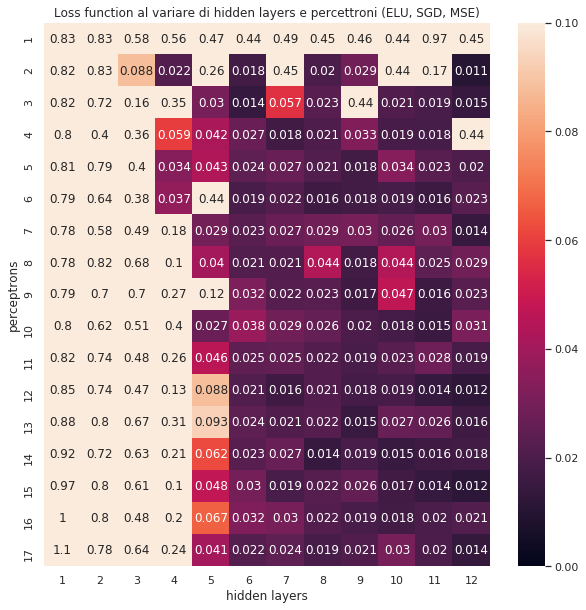

In [34]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(layers_neurons.T, annot=True,xticklabels=layers, yticklabels=neurons,vmin=0, vmax=0.1)
ax.set_title("Loss function al variare di hidden layers e percettroni (ELU, SGD, MSE)")
ax.set_xlabel("hidden layers")
ax.set_ylabel("perceptrons")
plt.show()

Dall'ultima analisi risulta come, aumentando il numero di layers e di percettroni, aumenti notevolmente l'accuratezza della rete, in quanto il valore del MSE diminuisce di un fattore 10 rispetto a quello precedentemente trovato. Sono scelti i valori $N_{HL}=11$ e $N_{p}=4$

Ricapitolando, i parametri scelti al fine di ottimizzare la rete neurale sono:
- activation function: ELU
- optimizer: SGD
- loss function: mean squared error
- $N_{HL}$: 11
- $N_{p}$: 4

Di seguito sono riportati i risultati ottenuti con la rete FFNN ottimizzata:

In [35]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = 4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid

sigma = 0.1 
y_train = np.random.normal(4 -3* x_train -2*x_train*x_train + 3*x_train*x_train*x_train, sigma) 
y_valid = np.random.normal(4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid, sigma)

model = tf.keras.Sequential()

for k in range(11):
    model.add(Dense(4, activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
    

Epoch 1/90
17/17 [==============================] - 0s 9ms/step - loss: 7.8899 - mse: 7.8899 - val_loss: 2.0971 - val_mse: 2.0971
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2117 - mse: 1.2117 - val_loss: 0.8752 - val_mse: 0.8752
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6188 - mse: 0.6188 - val_loss: 0.4827 - val_mse: 0.4827
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3121 - mse: 0.3121 - val_loss: 0.4725 - val_mse: 0.4725
Epoch 5/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3070 - mse: 0.3070 - val_loss: 0.5262 - val_mse: 0.5262
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2945 - mse: 0.2945 - val_loss: 0.4356 - val_mse: 0.4356
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2739 - mse: 0.2739 - val_loss: 0.4268 - val_mse: 0.4268
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2452 - mse: 0.24

17/17 [==============================] - 0s 2ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 68/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0161 - mse: 0.0161 -

In [36]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 955us/step - loss: 0.0176 - mse: 0.0176

Test loss: 0.017560290172696114
Test accuracy: 0.017560290172696114


Nel grafico successivo viene mostrata l'efficacia della FFNN ottimizzata sia dentro che fuori il range del dataset di training

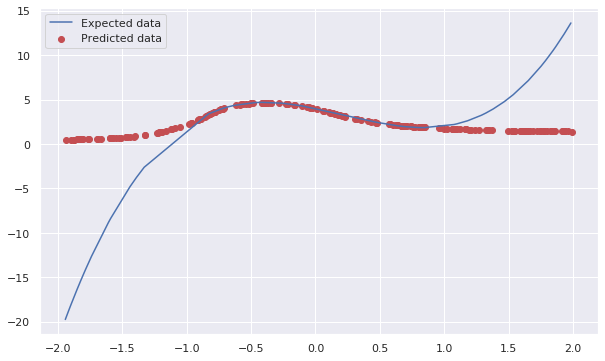

In [37]:
x_valid_out = np.random.uniform(-2, 2, 50)
x_valid_out.sort()
y_target_out = 4 -3* x_valid_out -2*x_valid_out*x_valid_out + 3*x_valid_out*x_valid_out*x_valid_out

x_out = np.random.uniform(-2, 2, 200)
y_out = model.predict(x_out)

plt.figure(figsize=(10,6))
plt.scatter(x_out, y_out[:,0],color='r',label='Predicted data')
plt.plot(x_valid_out, y_target_out, label='Expected data')
plt.grid(True)
plt.legend()
plt.show()

Dal grafico risulta chiaro come la rete neurale può fornire previsioni accurate per valori all'interno del range di training, mentre la sua precisione diminuisce considerevolmente al di fuori di tale range.

### Exercise 11.3

<span style="color:blue">
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.
</span>

I parametri utilizzati per la rete neurale (funzione di costo, funzione di attivazione e ottimizzatore) sono gli stessi trovati nel precedente esercizio, mentre $N_{HL}$ e $N_p$ vengono fatti variare al fine di minimizzare l'accuracy.

Il dataset di training e quello di validazione è organizzato in una matrice X contenente le coordinate x ed y di punti disposti random nel piano e di un vettore z di dati distribuiti gaussianamente attorno ai corrispettivi valori di $sin(x^2 +y^2)$ ($\sigma =0.1$)

In [38]:
x_train = np.random.rand(5000)*3-1.5
y_train = np.random.rand(5000)*3-1.5
X_tr = np.array([x_train, y_train])

x_valid = np.random.rand(500)*3-1.5
y_valid = np.random.rand(500)*3-1.5
X_va = np.array([x_valid, y_valid])

z_target = np.sin(x_valid**2 + y_valid**2)

sigma = 0.1 
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

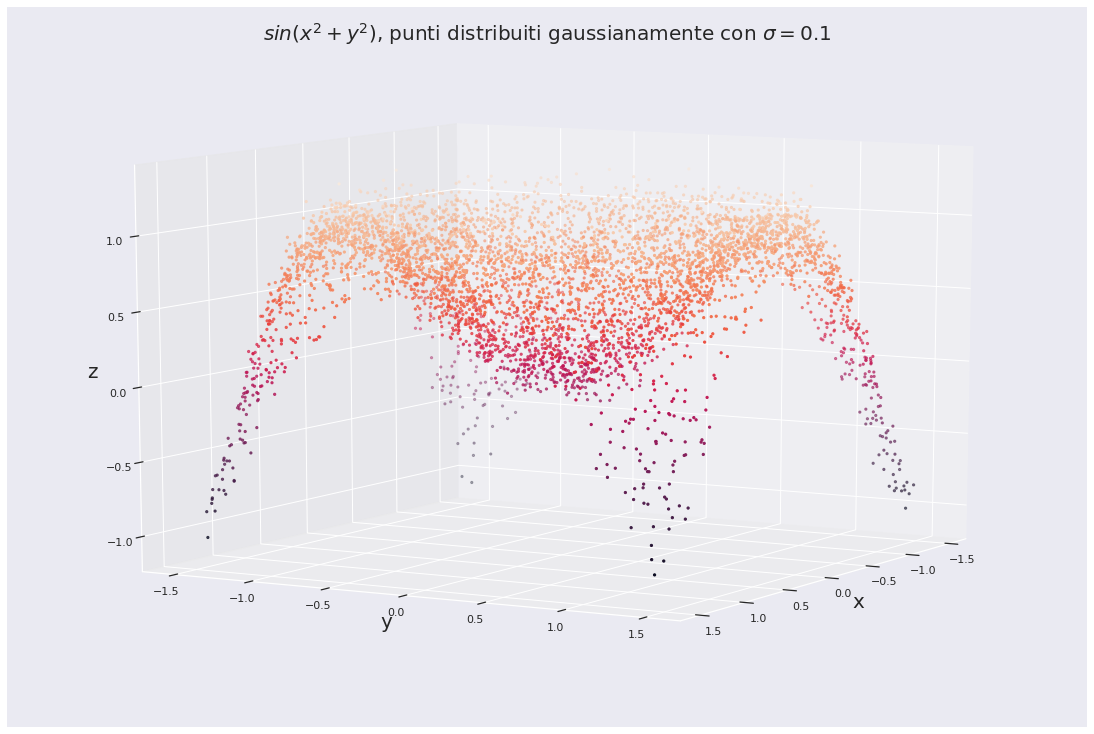

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
fig.suptitle('$sin(x^2+y^2)$, punti distribuiti gaussianamente con $\sigma=0.1$', fontsize=20)
ax = Axes3D(fig)
ax.scatter(x_train, y_train, z_train, c=z_train, marker='.')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.view_init(10, 30)
plt.show()

Il numero di hidden layers $N_{HL}$ ed il numero di percettroni per layer $N_p$ sono stati fatti variare rispettivamente tra 5 e 40 e tra 5 e 30, entrambi a step di 5. Di seguito è riportata la tabella delle loss functions ottenute variando tali parametri

In [40]:
layers=np.linspace(1,8,8, dtype=int)
neurons=np.linspace(1,6,6, dtype=int)

print(layers*5)
print(neurons*5)

[ 5 10 15 20 25 30 35 40]
[ 5 10 15 20 25 30]


In [41]:
layers_neurons = np.zeros((8, 6))

for i in layers:
    for j in neurons:

        model = tf.keras.Sequential()
        for k in range(i*5):
            model.add(Dense(j*5, activation='elu'))


        model.compile(optimizer='SGD', loss='mse', metrics=['mse'])


        history = model.fit(X_tr.T, z_train, batch_size=30, epochs=90, shuffle=True, validation_data=(X_va.T, z_valid))


        score = model.evaluate(X_va.T, z_valid, batch_size=30)
        
        sns.set()
        layers_neurons[i-1][j-1] = score[0]

Epoch 1/90
167/167 [==============================] - 0s 1ms/step - loss: 0.3722 - mse: 0.3722 - val_loss: 0.2647 - val_mse: 0.2647
Epoch 2/90
167/167 [==============================] - 0s 984us/step - loss: 0.2002 - mse: 0.2002 - val_loss: 0.1930 - val_mse: 0.1930
Epoch 3/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1664 - mse: 0.1664 - val_loss: 0.1796 - val_mse: 0.1796
Epoch 4/90
167/167 [==============================] - 0s 981us/step - loss: 0.1594 - mse: 0.1594 - val_loss: 0.1760 - val_mse: 0.1760
Epoch 5/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1571 - mse: 0.1571 - val_loss: 0.1745 - val_mse: 0.1745
Epoch 6/90
167/167 [==============================] - 0s 984us/step - loss: 0.1559 - mse: 0.1559 - val_loss: 0.1736 - val_mse: 0.1736
Epoch 7/90
167/167 [==============================] - 0s 992us/step - loss: 0.1551 - mse: 0.1551 - val_loss: 0.1730 - val_mse: 0.1730
Epoch 8/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 885us/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 63/90
167/167 [==============================] - 0s 887us/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 64/90
167/167 [==============================] - 0s 897us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 65/90
167/167 [==============================] - 0s 944us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 66/90
167/167 [==============================] - 0s 878us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 67/90
167/167 [==============================] - 0s 896us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 68/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 932us/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 33/90
167/167 [==============================] - 0s 986us/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 34/90
167/167 [==============================] - 0s 989us/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 35/90
167/167 [==============================] - 0s 921us/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 36/90
167/167 [==============================] - 0s 980us/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1676 - val_mse: 0.1676
Epoch 37/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1675 - val_mse: 0.1675
Epoch 38/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1675 - val_mse: 0.1675
Epoch 39/90
167/167 [==============================] - 0s 1ms/step - lo

167/167 [==============================] - 0s 1ms/step - loss: 0.2203 - mse: 0.2203 - val_loss: 0.1968 - val_mse: 0.1968
Epoch 3/90
167/167 [==============================] - 0s 960us/step - loss: 0.1667 - mse: 0.1667 - val_loss: 0.1758 - val_mse: 0.1758
Epoch 4/90
167/167 [==============================] - 0s 971us/step - loss: 0.1565 - mse: 0.1565 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 5/90
167/167 [==============================] - 0s 941us/step - loss: 0.1541 - mse: 0.1541 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 6/90
167/167 [==============================] - 0s 949us/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1705 - val_mse: 0.1705
Epoch 7/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1702 - val_mse: 0.1702
Epoch 8/90
167/167 [==============================] - 0s 958us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1701 - val_mse: 0.1701
Epoch 9/90
167/167 [==============================] - 0s 965us/step - loss: 0

167/167 [==============================] - 0s 965us/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 64/90
167/167 [==============================] - 0s 980us/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 65/90
167/167 [==============================] - 0s 923us/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 66/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 67/90
167/167 [==============================] - 0s 987us/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 68/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 69/90
167/167 [==============================] - 0s 995us/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 70/90
167/167 [==============================] - 0s 991us/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 34/90
167/167 [==============================] - 0s 945us/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 35/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 36/90
167/167 [==============================] - 0s 938us/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 37/90
167/167 [==============================] - 0s 974us/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1677 - val_mse: 0.1677
Epoch 38/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 39/90
167/167 [==============================] - 0s 955us/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 40/90
167/167 [==============================] - 0s 1ms/step - loss

167/167 [==============================] - 0s 1ms/step - loss: 0.1739 - mse: 0.1739 - val_loss: 0.1801 - val_mse: 0.1801
Epoch 4/90
167/167 [==============================] - 0s 959us/step - loss: 0.1574 - mse: 0.1574 - val_loss: 0.1734 - val_mse: 0.1734
Epoch 5/90
167/167 [==============================] - 0s 966us/step - loss: 0.1541 - mse: 0.1541 - val_loss: 0.1717 - val_mse: 0.1717
Epoch 6/90
167/167 [==============================] - 0s 930us/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1710 - val_mse: 0.1710
Epoch 7/90
167/167 [==============================] - 0s 956us/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1708 - val_mse: 0.1708
Epoch 8/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1705 - val_mse: 0.1705
Epoch 9/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1524 - mse: 0.1524 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 10/90
167/167 [==============================] - 0s 946us/step - loss: 0.

167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 65/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 66/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 67/90
167/167 [==============================] - 0s 987us/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 70/90
167/167 [==============================] - 0s 975us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 71/90
167/167 [==============================] - 0s 1ms/step - loss: 0.

Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 36/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 37/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 38/90
167/167 [==============================] - 0s 996us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 39/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 40/90
167/167 [==============================] - 0s 989us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 41/90
167/167 [==============================] - 0s 938us/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 42/90
167/167 [==============================] - 0s 1ms/s

Epoch 6/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1494 - mse: 0.1494 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 7/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1489 - mse: 0.1489 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 8/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 9/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1483 - mse: 0.1483 - val_loss: 0.1677 - val_mse: 0.1677
Epoch 10/90
167/167 [==============================] - 0s 992us/step - loss: 0.1478 - mse: 0.1478 - val_loss: 0.1674 - val_mse: 0.1674
Epoch 11/90
167/167 [==============================] - 0s 998us/step - loss: 0.1473 - mse: 0.1473 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 12/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1468 - mse: 0.1468 - val_loss: 0.1672 - val_mse: 0.1672
Epoch 13/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 68/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 70/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0830 - mse: 0.0830 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 74/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0827

167/167 [==============================] - 0s 1ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1695 - val_mse: 0.1695
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1695 - val_mse: 0.1695
Epoch 40/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 41/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 42/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 43/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 44/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 45/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504

167/167 [==============================] - 0s 1ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 10/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 11/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 12/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 14/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 15/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 16/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1503

Epoch 71/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 72/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0753 - mse: 0.0753 - val_loss: 0.0870 - val_mse: 0.0870
Epoch 73/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0748 - mse: 0.0748 - val_loss: 0.0811 - val_mse: 0.0811
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0738 - mse: 0.0738 - val_loss: 0.0786 - val_mse: 0.0786
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0721 - mse: 0.0721 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 76/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 77/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0703 - mse: 0.0703 - val_loss: 0.0742 - val_mse: 0.0742
Epoch 78/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.1470 - mse: 0.1470 - val_loss: 0.1653 - val_mse: 0.1653
Epoch 43/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1467 - mse: 0.1467 - val_loss: 0.1641 - val_mse: 0.1641
Epoch 44/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1459 - mse: 0.1459 - val_loss: 0.1636 - val_mse: 0.1636
Epoch 45/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1451 - mse: 0.1451 - val_loss: 0.1628 - val_mse: 0.1628
Epoch 46/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1443 - mse: 0.1443 - val_loss: 0.1621 - val_mse: 0.1621
Epoch 47/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1431 - mse: 0.1431 - val_loss: 0.1598 - val_mse: 0.1598
Epoch 48/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 49/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1398

167/167 [==============================] - 0s 1ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 14/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 15/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 16/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 17/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 18/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 19/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 20/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1511

Epoch 75/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.1665 - val_mse: 0.1665
Epoch 76/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1492 - mse: 0.1492 - val_loss: 0.1663 - val_mse: 0.1663
Epoch 77/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1490 - mse: 0.1490 - val_loss: 0.1663 - val_mse: 0.1663
Epoch 78/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1489 - mse: 0.1489 - val_loss: 0.1661 - val_mse: 0.1661
Epoch 79/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.1661 - val_mse: 0.1661
Epoch 80/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1487 - mse: 0.1487 - val_loss: 0.1658 - val_mse: 0.1658
Epoch 81/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.1485 - val_loss: 0.1654 - val_mse: 0.1654
Epoch 82/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.1467 - mse: 0.1467 - val_loss: 0.1657 - val_mse: 0.1657
Epoch 47/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1465 - mse: 0.1465 - val_loss: 0.1661 - val_mse: 0.1661
Epoch 48/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1459 - mse: 0.1459 - val_loss: 0.1655 - val_mse: 0.1655
Epoch 49/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1454 - mse: 0.1454 - val_loss: 0.1648 - val_mse: 0.1648
Epoch 50/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1447 - mse: 0.1447 - val_loss: 0.1644 - val_mse: 0.1644
Epoch 51/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1439 - mse: 0.1439 - val_loss: 0.1633 - val_mse: 0.1633
Epoch 52/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.1629 - val_mse: 0.1629
Epoch 53/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1421

167/167 [==============================] - 0s 1ms/step - loss: 0.1490 - mse: 0.1490 - val_loss: 0.1676 - val_mse: 0.1676
Epoch 18/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.1674 - val_mse: 0.1674
Epoch 19/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1482 - mse: 0.1482 - val_loss: 0.1666 - val_mse: 0.1666
Epoch 20/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1481 - mse: 0.1481 - val_loss: 0.1682 - val_mse: 0.1682
Epoch 21/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1475 - mse: 0.1475 - val_loss: 0.1662 - val_mse: 0.1662
Epoch 22/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1472 - mse: 0.1472 - val_loss: 0.1651 - val_mse: 0.1651
Epoch 23/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1465 - mse: 0.1465 - val_loss: 0.1651 - val_mse: 0.1651
Epoch 24/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1458

Epoch 79/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0885 - mse: 0.0885 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 80/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0896 - mse: 0.0896 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 81/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0892 - mse: 0.0892 - val_loss: 0.1001 - val_mse: 0.1001
Epoch 82/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0884 - mse: 0.0884 - val_loss: 0.0997 - val_mse: 0.0997
Epoch 83/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.1143 - val_mse: 0.1143
Epoch 84/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.0997 - val_mse: 0.0997
Epoch 85/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0876 - mse: 0.0876 - val_loss: 0.0999 - val_mse: 0.0999
Epoch 86/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 51/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1471 - val_mse: 0.1471
Epoch 52/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1239 - mse: 0.1239 - val_loss: 0.1465 - val_mse: 0.1465
Epoch 53/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 54/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 55/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224 - val_loss: 0.1448 - val_mse: 0.1448
Epoch 56/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219 - val_loss: 0.1442 - val_mse: 0.1442
Epoch 57/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1214

167/167 [==============================] - 0s 1ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 22/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 23/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 24/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 25/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 26/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 27/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 28/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504

Epoch 83/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 84/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 85/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 86/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 87/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 88/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 89/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 90/90
17/17 [==============================] - 0s 2ms/step - lo

167/167 [==============================] - 0s 2ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 55/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 56/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0816 - mse: 0.0816 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 57/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0810 - mse: 0.0810 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 58/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0873 - val_mse: 0.0873
Epoch 59/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 60/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 61/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0582

167/167 [==============================] - 0s 1ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 26/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 27/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 28/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 29/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 30/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 31/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 32/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507

Epoch 87/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 88/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 89/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 90/90
17/17 [==============================] - 0s 999us/step - loss: 0.0184 - mse: 0.0184
Epoch 1/90
167/167 [==============================] - 0s 2ms/step - loss: 0.3085 - mse: 0.3085 - val_loss: 0.2111 - val_mse: 0.2111
Epoch 2/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1678 - mse: 0.1678 - val_loss: 0.1731 - val_mse: 0.1731
Epoch 3/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 4/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.

167/167 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 59/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 60/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 61/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 62/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 63/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 64/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 65/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0132

167/167 [==============================] - 0s 1ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 30/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 31/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 32/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 33/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 34/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 35/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 36/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1501

17/17 [==============================] - 0s 784us/step - loss: 0.1483 - mse: 0.1483
Epoch 1/90
167/167 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.2872 - val_loss: 0.1965 - val_mse: 0.1965
Epoch 2/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1601 - mse: 0.1601 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 3/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1674 - val_mse: 0.1674
Epoch 4/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1497 - mse: 0.1497 - val_loss: 0.1666 - val_mse: 0.1666
Epoch 5/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1492 - mse: 0.1492 - val_loss: 0.1663 - val_mse: 0.1663
Epoch 6/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1487 - mse: 0.1487 - val_loss: 0.1658 - val_mse: 0.1658
Epoch 7/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1482 - mse: 0.1482 - val_loss: 0.1651 - val_mse:

167/167 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0785 - val_mse: 0.0785
Epoch 63/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 64/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 65/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 66/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 67/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0922 - val_mse: 0.0922
Epoch 68/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0379

167/167 [==============================] - 0s 2ms/step - loss: 0.1484 - mse: 0.1484 - val_loss: 0.1668 - val_mse: 0.1668
Epoch 34/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1476 - mse: 0.1476 - val_loss: 0.1667 - val_mse: 0.1667
Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1651 - val_mse: 0.1651
Epoch 36/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1438 - mse: 0.1438 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 37/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398 - val_loss: 0.1594 - val_mse: 0.1594
Epoch 38/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1352 - mse: 0.1352 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1313 - mse: 0.1313 - val_loss: 0.1535 - val_mse: 0.1535
Epoch 40/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1287

167/167 [==============================] - 0s 1ms/step - loss: 0.1516 - mse: 0.1516 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 6/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 8/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 9/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 11/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - ms

Epoch 66/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 67/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 69/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0493 - val_mse: 0.0493
Epoch 70/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 38/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1683 - val_mse: 0.1683
Epoch 40/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 41/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 42/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1497 - mse: 0.1497 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 43/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1495 - mse: 0.1495 - val_loss: 0.1676 - val_mse: 0.1676
Epoch 44/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1492

167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 9/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 11/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 12/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 14/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 15/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 

Epoch 70/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 76/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 77/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170 - val_loss: 0.1318 - val_mse: 0.1318
Epoch 42/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149 - val_loss: 0.1397 - val_mse: 0.1397
Epoch 43/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.1127 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 44/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133 - val_loss: 0.1326 - val_mse: 0.1326
Epoch 45/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 46/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115 - val_loss: 0.1262 - val_mse: 0.1262
Epoch 47/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1077 - mse: 0.1077 - val_loss: 0.1269 - val_mse: 0.1269
Epoch 48/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1067

167/167 [==============================] - 0s 2ms/step - loss: 0.1368 - mse: 0.1368 - val_loss: 0.1510 - val_mse: 0.1510
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229 - val_loss: 0.1344 - val_mse: 0.1344
Epoch 14/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1043 - mse: 0.1043 - val_loss: 0.0997 - val_mse: 0.0997
Epoch 15/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0904 - mse: 0.0904 - val_loss: 0.0866 - val_mse: 0.0866
Epoch 16/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0836 - mse: 0.0836 - val_loss: 0.0732 - val_mse: 0.0732
Epoch 17/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0705 - mse: 0.0705 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 18/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0804 - val_mse: 0.0804
Epoch 19/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0527

Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 76/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 77/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 78/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 79/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 80/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 81/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.1670 - val_mse: 0.1670
Epoch 46/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 0.1665 - val_mse: 0.1665
Epoch 47/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1652 - val_mse: 0.1652
Epoch 48/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.1641 - val_mse: 0.1641
Epoch 49/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1421 - mse: 0.1421 - val_loss: 0.1621 - val_mse: 0.1621
Epoch 50/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1403 - mse: 0.1403 - val_loss: 0.1612 - val_mse: 0.1612
Epoch 51/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1388 - mse: 0.1388 - val_loss: 0.1640 - val_mse: 0.1640
Epoch 52/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1377

167/167 [==============================] - 0s 2ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 0.1030 - val_mse: 0.1030
Epoch 17/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0876 - mse: 0.0876 - val_loss: 0.0944 - val_mse: 0.0944
Epoch 18/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0862 - mse: 0.0862 - val_loss: 0.0987 - val_mse: 0.0987
Epoch 19/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0856 - mse: 0.0856 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 20/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 21/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0849 - mse: 0.0849 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 22/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 23/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0841

Epoch 78/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 79/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 80/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 81/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 82/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 83/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 84/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 85/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.0775 - mse: 0.0775 - val_loss: 0.0867 - val_mse: 0.0867
Epoch 50/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0757 - mse: 0.0757 - val_loss: 0.0859 - val_mse: 0.0859
Epoch 51/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0741 - mse: 0.0741 - val_loss: 0.0797 - val_mse: 0.0797
Epoch 52/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 53/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.0750 - val_mse: 0.0750
Epoch 54/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 55/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 56/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0674

167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 21/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 22/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 23/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 24/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1496 - mse: 0.1496 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 25/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 26/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1465 - mse: 0.1465 - val_loss: 0.1657 - val_mse: 0.1657
Epoch 27/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1403

Epoch 82/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 83/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 84/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 85/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 86/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 87/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 88/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 89/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 54/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 55/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 56/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 57/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 58/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 59/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 60/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510

167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 25/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 26/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 27/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 28/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 29/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1685 - val_mse: 0.1685
Epoch 30/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 31/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1502

Epoch 86/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0651 - mse: 0.0651 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 87/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.1421 - val_mse: 0.1421
Epoch 88/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0667 - val_mse: 0.0667
Epoch 89/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0816 - val_mse: 0.0816
Epoch 90/90
17/17 [==============================] - 0s 1ms/step - loss: 0.0794 - mse: 0.0794
Epoch 1/90
167/167 [==============================] - 0s 3ms/step - loss: 0.3275 - mse: 0.3275 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 2/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1800 - mse: 0.1800 - val_loss: 0.1802 - val_mse: 0.1802
Epoch 3/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.1

167/167 [==============================] - 0s 2ms/step - loss: 0.0702 - mse: 0.0702 - val_loss: 0.0809 - val_mse: 0.0809
Epoch 58/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0648 - mse: 0.0648 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 59/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.1089 - val_mse: 0.1089
Epoch 60/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 61/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0723 - val_mse: 0.0723
Epoch 62/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0765 - val_mse: 0.0765
Epoch 63/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0921 - val_mse: 0.0921
Epoch 64/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0585

167/167 [==============================] - 0s 2ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1649 - val_mse: 0.1649
Epoch 29/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1429 - mse: 0.1429 - val_loss: 0.1636 - val_mse: 0.1636
Epoch 30/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387 - val_loss: 0.1737 - val_mse: 0.1737
Epoch 31/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1332 - mse: 0.1332 - val_loss: 0.1499 - val_mse: 0.1499
Epoch 32/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281 - val_loss: 0.1436 - val_mse: 0.1436
Epoch 33/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224 - val_loss: 0.1402 - val_mse: 0.1402
Epoch 34/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1065

Epoch 90/90
17/17 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146
Epoch 1/90
167/167 [==============================] - 1s 4ms/step - loss: 0.3603 - mse: 0.3603 - val_loss: 0.2701 - val_mse: 0.2701
Epoch 2/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1993 - mse: 0.1993 - val_loss: 0.1862 - val_mse: 0.1862
Epoch 3/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1583 - mse: 0.1583 - val_loss: 0.1712 - val_mse: 0.1712
Epoch 4/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1520 - mse: 0.1520 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 6/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 

167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 62/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 63/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 64/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 65/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 66/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 67/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1506

167/167 [==============================] - 0s 3ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 33/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 34/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 36/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 37/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 38/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1508

167/167 [==============================] - 0s 2ms/step - loss: 0.1516 - mse: 0.1516 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 4/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 6/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 8/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 9/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse

Epoch 65/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 66/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 67/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 69/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 70/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 71/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 37/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 38/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 40/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 41/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 42/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 43/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0187

167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 8/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 9/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 11/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 12/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 14/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 -

Epoch 69/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1384 - mse: 0.1384 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 70/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1374 - mse: 0.1374 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.1365 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1351 - mse: 0.1351 - val_loss: 0.1556 - val_mse: 0.1556
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1323 - mse: 0.1323 - val_loss: 0.1604 - val_mse: 0.1604
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1277 - mse: 0.1277 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1541 - val_mse: 0.1541
Epoch 76/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1457 - mse: 0.1457 - val_loss: 0.1597 - val_mse: 0.1597
Epoch 41/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1372 - mse: 0.1372 - val_loss: 0.1486 - val_mse: 0.1486
Epoch 42/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1283 - mse: 0.1283 - val_loss: 0.1411 - val_mse: 0.1411
Epoch 43/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 44/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1379 - val_mse: 0.1379
Epoch 45/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228 - val_loss: 0.1402 - val_mse: 0.1402
Epoch 46/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227 - val_loss: 0.1373 - val_mse: 0.1373
Epoch 47/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1224

167/167 [==============================] - 0s 2ms/step - loss: 0.1404 - mse: 0.1404 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 12/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1381 - mse: 0.1381 - val_loss: 0.1590 - val_mse: 0.1590
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.1365 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 14/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1356 - mse: 0.1356 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 15/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1345 - mse: 0.1345 - val_loss: 0.1592 - val_mse: 0.1592
Epoch 16/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1342 - mse: 0.1342 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 17/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1336 - mse: 0.1336 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 18/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1323

Epoch 73/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 76/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 77/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 78/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 79/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 80/90
167/167 [==============================] - 0s 3ms/step - 

167/167 [==============================] - 0s 3ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 45/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 46/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 47/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 48/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 49/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 50/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 51/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0472

167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 16/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 17/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 18/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 19/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 20/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 21/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 22/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510

Epoch 77/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 78/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 79/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 80/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 81/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 82/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 83/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 84/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 49/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 50/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 51/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 52/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 53/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 54/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 55/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1511

167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 20/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 21/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 22/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 23/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 24/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 25/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1688 - val_mse: 0.1688
Epoch 26/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509

Epoch 81/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 82/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 83/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 84/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 85/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 86/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 87/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 88/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 3ms/step - loss: 0.0643 - mse: 0.0643 - val_loss: 0.0712 - val_mse: 0.0712
Epoch 53/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0874 - val_mse: 0.0874
Epoch 54/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 55/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 56/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 57/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0797 - val_mse: 0.0797
Epoch 58/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 59/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0559

167/167 [==============================] - 0s 3ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 24/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 25/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 26/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 27/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 28/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 29/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 30/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0230

Epoch 85/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 86/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 87/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 88/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 89/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 90/90
17/17 [==============================] - 0s 1ms/step - loss: 0.0204 - mse: 0.0204
Epoch 1/90
167/167 [==============================] - 1s 4ms/step - loss: 0.3736 - mse: 0.3736 - val_loss: 0.2667 - val_mse: 0.2667
Epoch 2/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1904 - mse: 0.1904 - val_loss: 0.

167/167 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 57/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 58/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 59/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 60/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 61/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 62/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 63/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0160

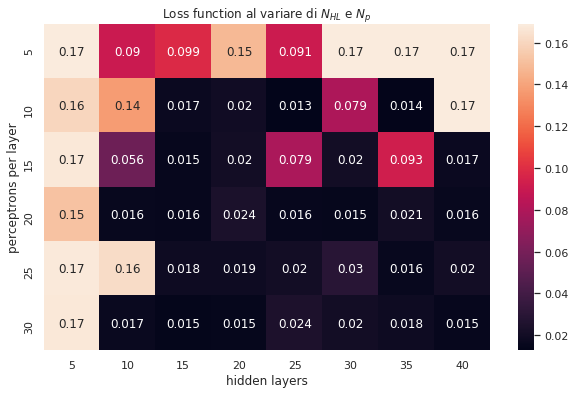

In [42]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(layers_neurons.T, annot=True,xticklabels=layers*5, yticklabels=neurons*5)
ax.set_title("Loss function al variare di $N_{HL}$ e $N_p$")
ax.set_xlabel("hidden layers")
ax.set_ylabel("perceptrons per layer")
plt.show()

Dalla tabella emerge come in reti di almeno 20 layers da almeno 15 percettroni il valore di loss function raggiunge un valore minimo pressocché costante intorno a 0.015. Sono quindi fissati $N_{HL}=20$ e $N_p=15$ e, con tali parametri, viene 'addestrata' la rete neurale

In [43]:
model = tf.keras.Sequential()

for k in range(20):
    model.add(Dense(15, activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [44]:
history = model.fit(X_tr.T, z_train, batch_size=30, epochs=90, shuffle=True, validation_data=(X_va.T, z_valid))

Epoch 1/90
167/167 [==============================] - 0s 2ms/step - loss: 0.4112 - mse: 0.4112 - val_loss: 0.3122 - val_mse: 0.3122
Epoch 2/90
167/167 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.2107 - val_loss: 0.1829 - val_mse: 0.1829
Epoch 3/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1558 - mse: 0.1558 - val_loss: 0.1700 - val_mse: 0.1700
Epoch 4/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 6/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1695 - val_mse: 0.1695
Epoch 8/90
167/167 [==============================] - 0s 1ms/step - loss: 0.

167/167 [==============================] - 0s 2ms/step - loss: 0.0884 - mse: 0.0884 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 63/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 64/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0805 - mse: 0.0805 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 65/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0803 - mse: 0.0803 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 66/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0825 - val_mse: 0.0825
Epoch 67/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 68/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0693 - mse: 0.0693 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0660

In [45]:
score = model.evaluate(X_va.T, z_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206

Test loss: 0.020618464797735214
Test accuracy: 0.020618464797735214


Di seguito è infine mostrato lo scatterplot dei valori teorici ($sin(x^2 +y^2)$) e dei valori predetti dalla rete neurale per 5000 coppie $x$ e $y$ distribuite random nel range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$:

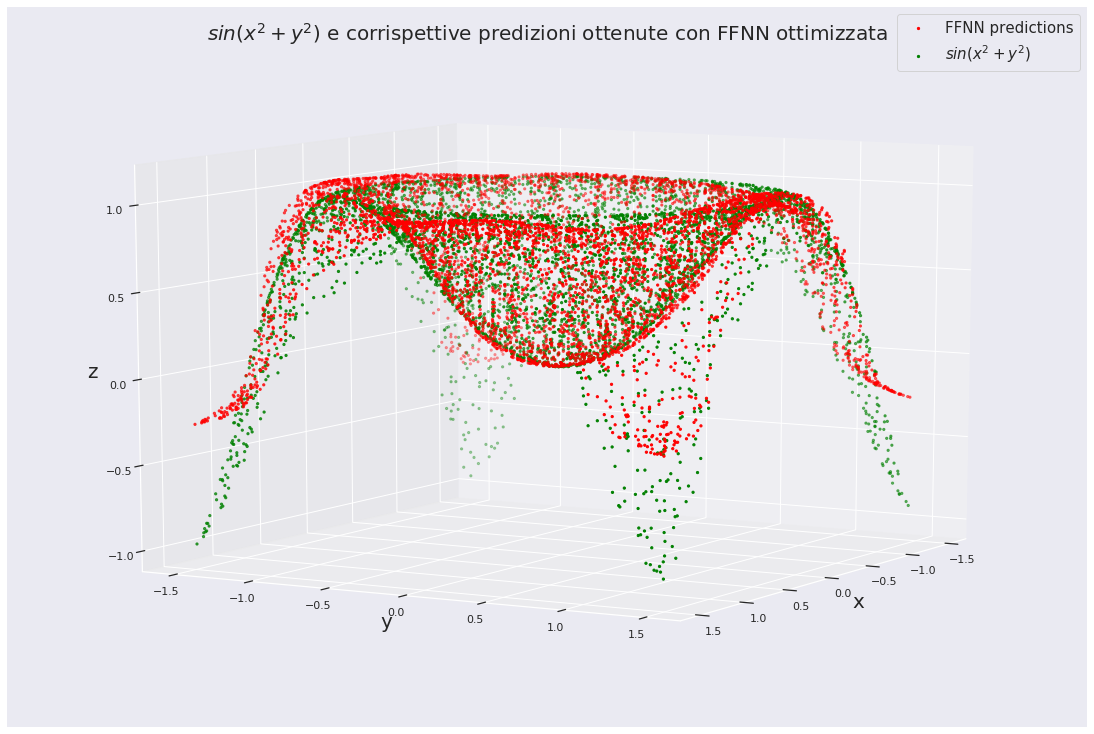

In [46]:
x_out = np.random.rand(5000)*3-1.5
y_out = np.random.rand(5000)*3-1.5
X_out = np.array([x_out, y_out])
z_out = model.predict(X_out.T)
z_target = np.sin(x_out**2 + y_out**2)


fig = plt.figure(figsize=(15,10))
fig.suptitle('$sin(x^2 +y^2)$ e corrispettive predizioni ottenute con FFNN ottimizzata', fontsize=20)
ax = Axes3D(fig)
ax.scatter(x_out, y_out, z_out[:,0], c='red', marker='.', label='FFNN predictions')
ax.scatter(x_out, y_out, z_target, c='green', marker='.', label='$sin(x^2 +y^2)$')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.view_init(10, 30)
ax.legend(fontsize=15)
plt.show()